In [242]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
# Importing the dataset
df = pd.read_csv("./Data/polovnjaciOcisceni2021.csv")

In [243]:
df_names = df.columns

In [244]:
df.count()

Marka                   28545
Model                   28545
Godiste                 28545
Kilometraza             28545
Karoserija              28545
Gorivo                  28545
Kubikaza                28545
Snaga motora            28545
Cena                    28545
EKM                     28545
Pogon                   28545
Menjac                  28545
Broj vrata              28545
Broj sedista            28545
Klima                   28545
Boja                    28545
Materijal enterijera    28545
Boja enterijera         28545
dtype: int64

In [245]:
df_names

Index(['Marka', 'Model', 'Godiste', 'Kilometraza', 'Karoserija', 'Gorivo',
       'Kubikaza', 'Snaga motora', 'Cena', 'EKM', 'Pogon', 'Menjac',
       'Broj vrata', 'Broj sedista', 'Klima', 'Boja', 'Materijal enterijera',
       'Boja enterijera'],
      dtype='object')

In [246]:
#printing percentage of null values for each feature.
column_null=df.isnull().sum()#finding the sum of total null values in the dataset
for i in range(len(df.columns)):
    print('{} feature has {} % of null values'.format(df.columns[i],(column_null[i]/df.shape[0])*100))
    print('*'*10)

Marka feature has 0.0 % of null values
**********
Model feature has 0.0 % of null values
**********
Godiste feature has 0.0 % of null values
**********
Kilometraza feature has 0.0 % of null values
**********
Karoserija feature has 0.0 % of null values
**********
Gorivo feature has 0.0 % of null values
**********
Kubikaza feature has 0.0 % of null values
**********
Snaga motora feature has 0.0 % of null values
**********
Cena feature has 0.0 % of null values
**********
EKM feature has 0.0 % of null values
**********
Pogon feature has 0.0 % of null values
**********
Menjac feature has 0.0 % of null values
**********
Broj vrata feature has 0.0 % of null values
**********
Broj sedista feature has 0.0 % of null values
**********
Klima feature has 0.0 % of null values
**********
Boja feature has 0.0 % of null values
**********
Materijal enterijera feature has 0.0 % of null values
**********
Boja enterijera feature has 0.0 % of null values
**********


### Countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Volkswagen'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'Opel'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Peugeot'),
  Text(5, 0, 'Renault'),
  Text(6, 0, 'Fiat'),
  Text(7, 0, 'Citroen'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Mercedes Benz'),
  Text(10, 0, 'Skoda'),
  Text(11, 0, 'Alfa Romeo'),
  Text(12, 0, 'Seat'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'Toyota'),
  Text(15, 0, 'Mazda'),
  Text(16, 0, 'Hyundai'),
  Text(17, 0, 'MINI'),
  Text(18, 0, 'Lancia'),
  Text(19, 0, 'Volvo'),
  Text(20, 0, 'Kia'),
  Text(21, 0, 'Chevrolet'),
  Text(22, 0, 'Honda'),
  Text(23, 0, 'Suzuki'),
  Text(24, 0, 'Land Rover'),
  Text(25, 0, 'Dacia'),
  Text(26, 0, 'Mitsubishi')])

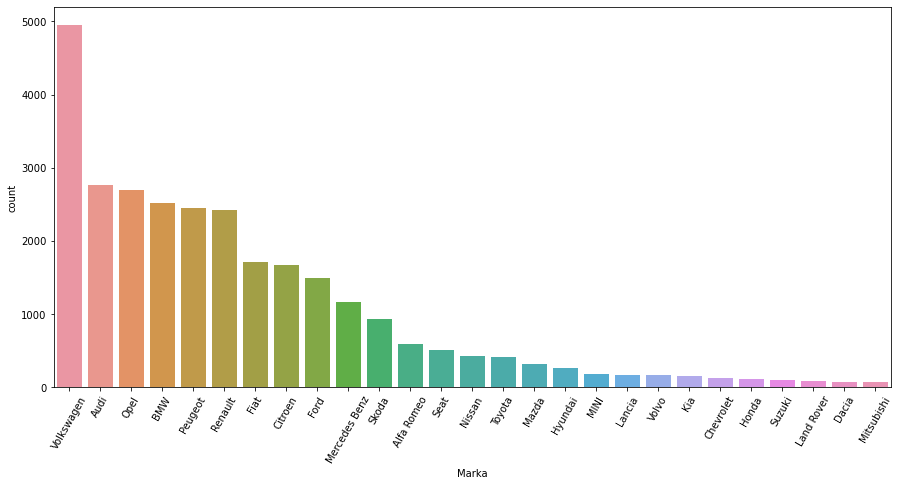

In [247]:
plt.figure(figsize=(15,7))
sns.countplot(df['Marka'], order=df['Marka'].value_counts().index)
plt.xticks(rotation=60)

<AxesSubplot:xlabel='Godiste', ylabel='Density'>

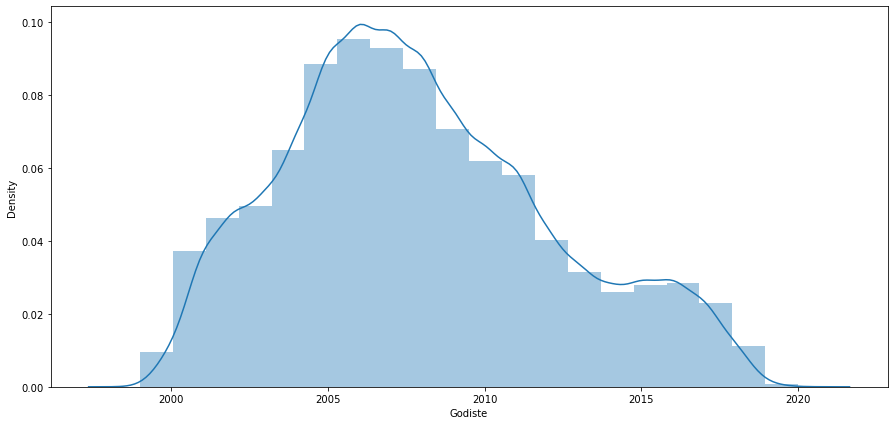

In [248]:
plt.figure(figsize=(15,7))
sns.distplot(df['Godiste'], bins=20)


<AxesSubplot:xlabel='Kilometraza', ylabel='Density'>

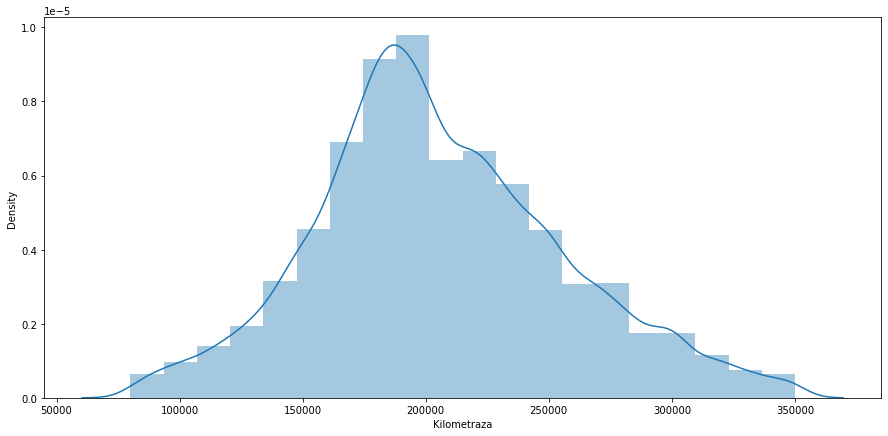

In [249]:
plt.figure(figsize=(15,7))
sns.distplot(df['Kilometraza'], bins=20)


In [250]:
df.drop(df[df['Karoserija']=='Kupe'].index, inplace=True)

<AxesSubplot:xlabel='Karoserija', ylabel='count'>

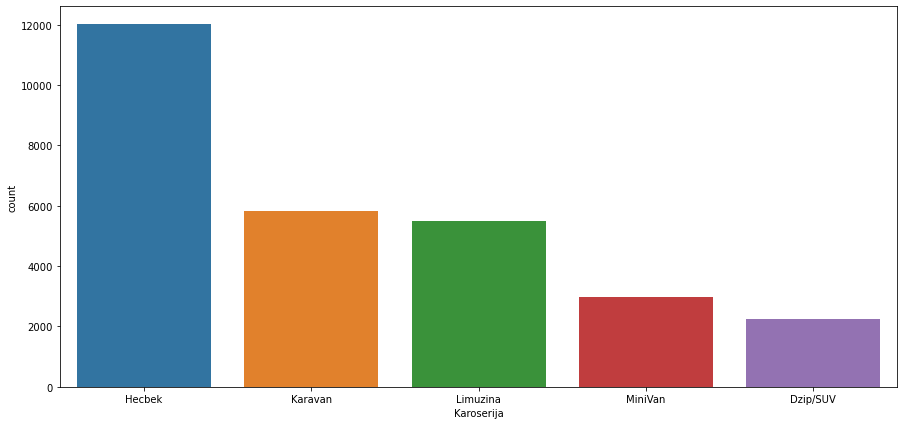

In [251]:
plt.figure(figsize=(15,7))
sns.countplot(df['Karoserija'], order=df['Karoserija'].value_counts().index)

<AxesSubplot:xlabel='Gorivo', ylabel='count'>

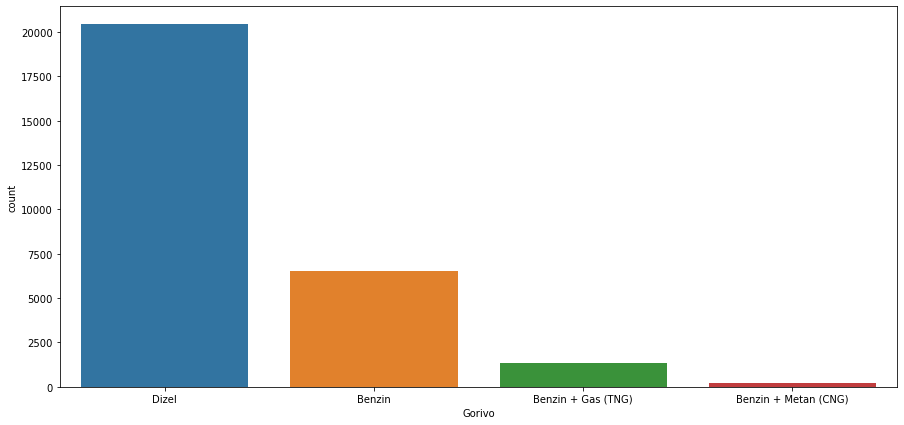

In [252]:
plt.figure(figsize=(15,7))
sns.countplot(df['Gorivo'], order=df['Gorivo'].value_counts().index)

In [253]:
df['Gorivo'].unique()

array(['Dizel', 'Benzin + Metan (CNG)', 'Benzin', 'Benzin + Gas (TNG)'],
      dtype=object)

In [254]:
df.drop(df[df['Gorivo']=='Benzin + Metan (CNG)'].index, inplace=True)

In [255]:
df['Kubikaza'].value_counts()

2.0    8759
1.6    5257
1.9    3459
1.4    2929
1.2    2213
1.5    1573
1.7     790
1.8     729
1.1     443
1.3     396
1.0     390
3.0     348
2.2     332
2.1     309
2.5     227
0.9      65
2.7      63
2.4      61
Name: Kubikaza, dtype: int64

<AxesSubplot:xlabel='Snaga motora', ylabel='Density'>

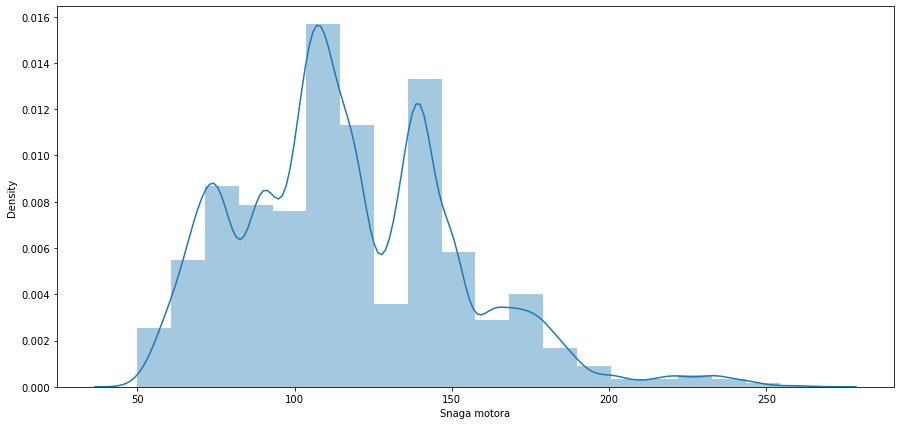

In [256]:
plt.figure(figsize=(15,7))
sns.distplot(df['Snaga motora'], bins=20)


In [257]:
df = df.groupby('Snaga motora').filter(lambda x: len(x)>30)

<AxesSubplot:xlabel='Snaga motora', ylabel='Density'>

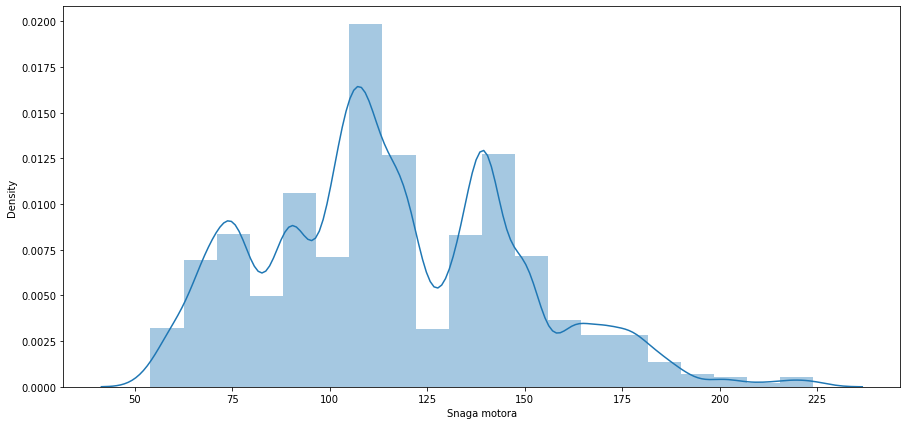

In [258]:
df.drop(df[df['Snaga motora']>=225].index, inplace=True)
plt.figure(figsize=(15,7))
sns.distplot(df['Snaga motora'], bins=20)


<AxesSubplot:xlabel='EKM', ylabel='count'>

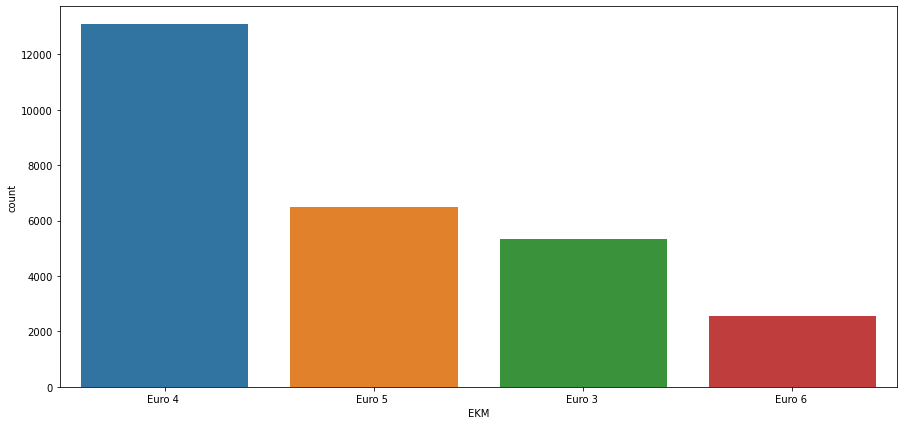

In [259]:
plt.figure(figsize=(15,7))
sns.countplot(df['EKM'], order=df['EKM'].value_counts().index)

<AxesSubplot:xlabel='Pogon', ylabel='count'>

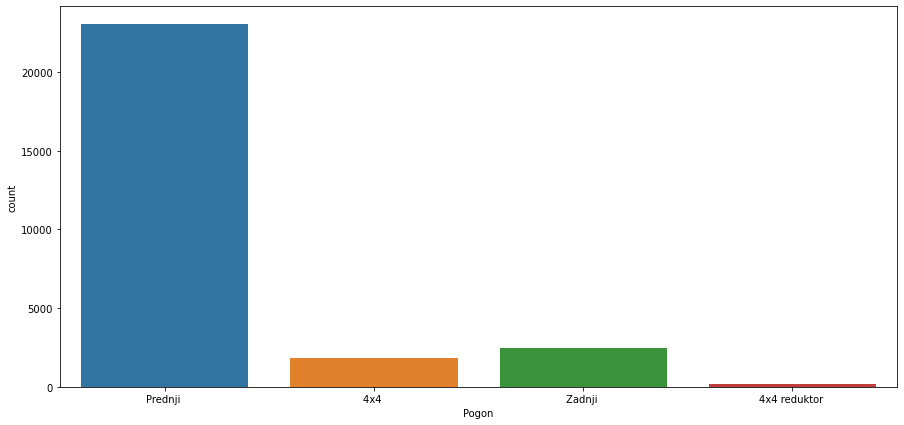

In [260]:
plt.figure(figsize=(15,7))
sns.countplot(df['Pogon'])

In [261]:
df['Pogon'].unique()

array(['Prednji ', '4x4 ', 'Zadnji ', '4x4 reduktor '], dtype=object)

In [262]:
df[(df['Pogon']=='Zadnji ')]['Marka'].value_counts()

BMW              1913
Mercedes Benz     510
Opel               10
Peugeot             8
Volkswagen          8
Audi                7
Renault             6
Fiat                3
Ford                3
Lancia              2
Citroen             2
Toyota              2
Skoda               2
Mazda               2
Honda               1
Hyundai             1
MINI                1
Name: Marka, dtype: int64

In [263]:
df.loc[df[(df['Pogon']=='Zadnji ') & (~df['Marka'].isin(['BMW', 'Mercedes Benz']))].index, 'Pogon'] = 'Prednji '
#df.drop(df[(df['Pogon']=='Zadnji ') & (~df['Marka'].isin(['BMW', 'Mercedes Benz']))].index, inplace=True)

In [264]:
df[(df['Pogon']=='Zadnji ')]['Marka'].value_counts()

BMW              1913
Mercedes Benz     510
Name: Marka, dtype: int64

In [265]:
df[df['Pogon']=='4x4 reduktor ']

Marka         Model  Godiste  Kilometraza Karoserija  Gorivo  \
146    Mitsubishi     Outlander     2007       191935   Dzip/SUV   Dizel   
147    Mitsubishi     Outlander     2008       253177   Dzip/SUV   Dizel   
174    Land Rover    Freelander     2003       191216   Dzip/SUV   Dizel   
483        Suzuki  Grand Vitara     2008       225129   Dzip/SUV  Benzin   
529           BMW            X3     2007       228000   Dzip/SUV   Dizel   
...           ...           ...      ...          ...        ...     ...   
27758        Fiat         Panda     2013       146500     Hecbek   Dizel   
27853  Volkswagen       Touareg     2006       325594   Dzip/SUV   Dizel   
27856  Mitsubishi     Outlander     2008       266588   Dzip/SUV   Dizel   
28230      Suzuki  Grand Vitara     2006       203000   Dzip/SUV   Dizel   
28233      Suzuki  Grand Vitara     2007       171690   Dzip/SUV   Dizel   

       Kubikaza  Snaga motora  Cena      EKM          Pogon  \
146         2.0           140  6499  Euro 4   4x4 reduktor    
147         2.0           140  6700  Euro 4   4x4 reduktor    
174         1.9           111  3999  Euro 3   4x4 reduktor    
483         2.0           140  6700  Euro 4   4x4 reduktor    
529         2.0           163  6990  Euro 4   4x4 reduktor    
...         ...           ...   ...      ...            ...   
27758       1.3            90  7490  Euro 5   4x4 reduktor    
27853       3.0           224  6990  Euro 5   4x4 reduktor    
27856       2.0           140  6650  Euro 4   4x4 reduktor    
28230       1.9           129  5700  Euro 4   4x4 reduktor    
28233       1.9           129  6300  Euro 4   4x4 reduktor    

                             Menjac  Broj vrata  Broj sedista  \
146              Manuelni 6 brzina   4/5 vrata              5   
147              Manuelni 6 brzina   4/5 vrata              7   
174              Manuelni 5 brzina   4/5 vrata              5   
483              Manuelni 5 brzina   4/5 vrata              5   
529              Manuelni 6 brzina   4/5 vrata              5   
...                             ...         ...           ...   
27758            Manuelni 6 brzina   4/5 vrata              5   
27853  Automatski / poluautomatski   4/5 vrata              5   
27856            Manuelni 6 brzina   4/5 vrata              7   
28230            Manuelni 5 brzina   4/5 vrata              5   
28233            Manuelni 5 brzina   4/5 vrata              5   

                   Klima  Boja Materijal enterijera Boja enterijera  
146    Automatska klima   Crna                 Stof            Crna  
147    Automatska klima   Siva        Prirodna koza            Crna  
174      Manuelna klima   Crna     Kombinovana koza             Bež  
483      Manuelna klima   Crna                 Stof            Crna  
529    Automatska klima   Siva                 Stof            Crna  
...                  ...   ...                  ...             ...  
27758    Manuelna klima   Bela                 Stof           Smeđa  
27853  Automatska klima   Crna        Prirodna koza             Bež  
27856    Manuelna klima   Siva                Velur            Crna  
28230  Automatska klima   Siva        Prirodna koza            Crna  
28233  Automatska klima   Siva                 Stof            Crna  

[167 rows x 18 columns]

In [266]:
df.drop(df[(df['Godiste']>=2019) | (df['Godiste']<2000)].index, inplace=True)

In [267]:
for brand in df['Marka'].unique():
    print('*'*30)
    print(brand)
    for model in df[df['Marka']==brand]['Model'].unique():
        print('Model {} \n'.format(model))
        no_types = (df[(df['Model']==model)]['Karoserija'].value_counts().tolist())
        types = (df[(df['Model']==model)]['Karoserija'].value_counts().index.tolist())
        dict_t = dict(zip(types, no_types))
        print(dict_t)
        

******************************
Volkswagen
Model Passat B5.5 

{'Karavan': 196, 'Limuzina': 105}
Model Passat B6 

{'Karavan': 457, 'Limuzina': 171}
Model Golf 6 

{'Hecbek': 363, 'Karavan': 63, 'Limuzina': 21}
Model Golf 7 

{'Hecbek': 258, 'Karavan': 39, 'Limuzina': 17}
Model Polo 

{'Hecbek': 598, 'Limuzina': 49, 'Karavan': 1}
Model Tiguan 

{'Dzip/SUV': 176, 'Hecbek': 1}
Model Golf 4 

{'Hecbek': 235, 'Karavan': 72, 'Limuzina': 37}
Model Sharan 

{'MiniVan': 106, 'Karavan': 2, 'Limuzina': 1}
Model Golf 5 

{'Hecbek': 645, 'Limuzina': 60, 'Karavan': 41}
Model Passat B8 

{'Limuzina': 88, 'Karavan': 84}
Model Passat B7 

{'Karavan': 118, 'Limuzina': 66}
Model Touran 

{'MiniVan': 286, 'Limuzina': 14, 'Hecbek': 10, 'Karavan': 4, 'Dzip/SUV': 1}
Model Caddy 

{'MiniVan': 63, 'Limuzina': 2, 'Karavan': 1}
Model Passat CC 

{'Limuzina': 33, 'Hecbek': 3}
Model Bora 

{'Limuzina': 39, 'Karavan': 22}
Model Touareg 

{'Dzip/SUV': 62, 'Limuzina': 1, 'Karavan': 1}
Model Golf Plus 

{'MiniVan': 66

{'MiniVan': 34, 'Hecbek': 8, 'Limuzina': 1}
Model Delta 

{'Hecbek': 58, 'Limuzina': 3}
******************************
Land Rover
Model Freelander 

{'Dzip/SUV': 80, 'Hecbek': 2, 'Limuzina': 1}
******************************
Mazda
Model 2 

{'Hecbek': 48, 'Limuzina': 7}
Model 3 

{'Hecbek': 75, 'Limuzina': 12}
Model 6 

{'Karavan': 55, 'Limuzina': 54, 'Hecbek': 14}
Model 5 

{'MiniVan': 37, 'Limuzina': 1, 'Karavan': 1}
******************************
Mitsubishi
Model Outlander 

{'Dzip/SUV': 34}
Model Colt 

{'Hecbek': 26, 'Limuzina': 4, 'MiniVan': 2}
******************************
Kia
Model Sportage 

{'Dzip/SUV': 86}
Model cee`d 

{'Hecbek': 24, 'Karavan': 3, 'Limuzina': 2}
Model Sorento 

{'Dzip/SUV': 33, 'Hecbek': 1}
******************************
Chevrolet
Model Captiva 

{'Dzip/SUV': 52}
Model Cruze 

{'Limuzina': 32, 'Hecbek': 12, 'Karavan': 1}
Model Aveo 

{'Hecbek': 13, 'Limuzina': 13}
******************************
Suzuki
Model Grand Vitara 

{'Dzip/SUV': 48, 'Hecbek': 1}
Mode

In [268]:
df.drop(df[df['Model']=='Vectra B'].index, inplace=True)
df.drop(df[df['Model']=='Freelander'].index, inplace=True)
df.drop(df[df['Model']=='Countryman'].index, inplace=True)

In [269]:
# Volkswagen
df.loc[df[(df['Model']=='Golf 6') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Golf 7') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Polo') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Golf 4') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Golf 5') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Sharan')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Touran')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Caddy')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Passat CC')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Touareg')].index, 'Karoserija'] = 'Dzip/SUV'
# Audi
df.loc[df[(df['Model']=='A3') & (df['Karoserija']=='Karavan')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A4') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='A6') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Q3')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='A1')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A2')].index, 'Karoserija'] = 'MiniVan'
# Fiat
df.loc[df[(df['Model']=='Evo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Bravo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Punto')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='500')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='500L')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Stilo') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Panda')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Doblo')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Idea')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Idea')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Multipla')].index, 'Karoserija'] = 'MiniVan'
# Ford
df.loc[df[(df['Model']=='C-Max')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Focus') & (df['Karoserija']=='MiniVan')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Fusion')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Galaxy')].index, 'Karoserija'] = 'MiniVan'
# Skoda
df.loc[df[(df['Model']=='Fabia') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Superb') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Rapid')].index, 'Karoserija'] = 'Hecbek'
# Renault
df.loc[df[(df['Model']=='Espace')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Scenic')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Grand Scenic')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Clio') & (df['Karoserija']=='MiniVan')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Clio') & (df['Karoserija']=='MiniVan')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Twingo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Captur')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Kangoo')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Ibiza') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Leon') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Altea')].index, 'Karoserija'] = 'MiniVan'
# Citroen
df.loc[df[(df['Model']=='C3')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C5') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='C3 Picasso')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='C4')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C4 Grand Picasso')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='C1')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C2')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C4 Picasso')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Berlingo')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Xsara Picasso')].index, 'Karoserija'] = 'MiniVan'
# Opel
df.loc[df[(df['Model']=='Agila')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Meriva')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Zafira')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Astra J') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Corsa D')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Corsa E')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Corsa C')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Vectra C') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Antara')].index, 'Karoserija'] = 'Dzip/SUV'
# Peugeot
df.loc[df[(df['Model']=='308') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='308') & (df['Karoserija']=='Dzip/SUV')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='207') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='208')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='107')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='407') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='307')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='3008')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='2008')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='206') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='5008') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'MiniVan'
# BMW 
df.loc[df[(df['Model']=='320') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='118')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='116')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='120')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='X3')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='X1')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='X5')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='318') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='316') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
# Mini
df.loc[df[(df['Model']=='Cooper')].index, 'Karoserija'] = 'Hecbek'
#df.loc[df[(df['Model']=='Countryman')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='One')].index, 'Karoserija'] = 'Hecbek'
# Mercedes Benz
df.loc[df[(df['Model']=='B 180')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='B 200')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='C 200') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='C 220') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='C 180') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='A 160')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A 180')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A 170')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A 150')].index, 'Karoserija'] = 'Hecbek'
# Hyundai
df.loc[df[(df['Model']=='i20')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Getz')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='i30') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
# Nissan
df.loc[df[(df['Model']=='Qashqai')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Juke')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Micra')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Note')].index, 'Karoserija'] = 'Hecbek'
# Alfa Romeo
df.loc[df[(df['Model']=='Giulietta')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='147')].index, 'Karoserija'] = 'Hecbek'
# Toyota
df.loc[df[(df['Model']=='Aygo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Auris')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Yaris')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Avensis') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
# Lancia
df.loc[df[(df['Model']=='Ypsilon')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Delta')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Musa')].index, 'Karoserija'] = 'MiniVan'
# Land Rover
df.loc[df[(df['Model']=='Freelander')].index, 'Karoserija'] = 'Dzip/SUV'
# Mazda
df.loc[df[(df['Model']=='2')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='6') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='5')].index, 'Karoserija'] = 'MiniVan'
# Mitsubishi
df.loc[df[(df['Model']=='Colt')].index, 'Karoserija'] = 'Hecbek'
# Kia
df.loc[df[(df['Model']=='cee`d') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Sorento')].index, 'Karoserija'] = 'Dzip/SUV'
# Suzuki
df.loc[df[(df['Model']=='Grand Vitara')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Swift')].index, 'Karoserija'] = 'Hecbek'
# Dacia
df.loc[df[(df['Model']=='Logan') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Sandero')].index, 'Karoserija'] = 'Hecbek'

# Pogon 
df.loc[df[(df['Pogon']=='4x4 reduktor ')].index, 'Pogon'] = '4x4 '
df.loc[df[(df['Menjac']=='Automatski ')].index, 'Menjac'] = 'Automatski / poluautomatski '

In [270]:
df['Menjac'].unique()

array(['Manuelni 6 brzina ', 'Manuelni 5 brzina ',
       'Automatski / poluautomatski '], dtype=object)

In [271]:
for brand in df['Marka'].unique():
    print('*'*30)
    print(brand)
    for model in df[df['Marka']==brand]['Model'].unique():
        print('Model {} \n'.format(model))
        no_types = (df[(df['Model']==model)]['Karoserija'].value_counts().tolist())
        types = (df[(df['Model']==model)]['Karoserija'].value_counts().index.tolist())
        dict_t = dict(zip(types, no_types))
        print(dict_t)

******************************
Volkswagen
Model Passat B5.5 

{'Karavan': 196, 'Limuzina': 105}
Model Passat B6 

{'Karavan': 457, 'Limuzina': 171}
Model Golf 6 

{'Hecbek': 363, 'Karavan': 84}
Model Golf 7 

{'Hecbek': 258, 'Karavan': 56}
Model Polo 

{'Hecbek': 598, 'Karavan': 50}
Model Tiguan 

{'Dzip/SUV': 176, 'Hecbek': 1}
Model Golf 4 

{'Hecbek': 272, 'Karavan': 72}
Model Sharan 

{'MiniVan': 109}
Model Golf 5 

{'Hecbek': 705, 'Karavan': 41}
Model Passat B8 

{'Limuzina': 88, 'Karavan': 84}
Model Passat B7 

{'Karavan': 118, 'Limuzina': 66}
Model Touran 

{'MiniVan': 315}
Model Caddy 

{'MiniVan': 66}
Model Passat CC 

{'Limuzina': 36}
Model Bora 

{'Limuzina': 39, 'Karavan': 22}
Model Touareg 

{'Dzip/SUV': 64}
Model Golf Plus 

{'MiniVan': 66, 'Hecbek': 32, 'Limuzina': 7}
Model Jetta 

{'Limuzina': 35}
Model Passat B5 

{'Karavan': 22, 'Limuzina': 6}
Model Fox 

{'Hecbek': 29, 'Limuzina': 3}
******************************
Audi
Model A3 

{'Hecbek': 598, 'Limuzina': 60}
Model 

<AxesSubplot:xlabel='Menjac', ylabel='count'>

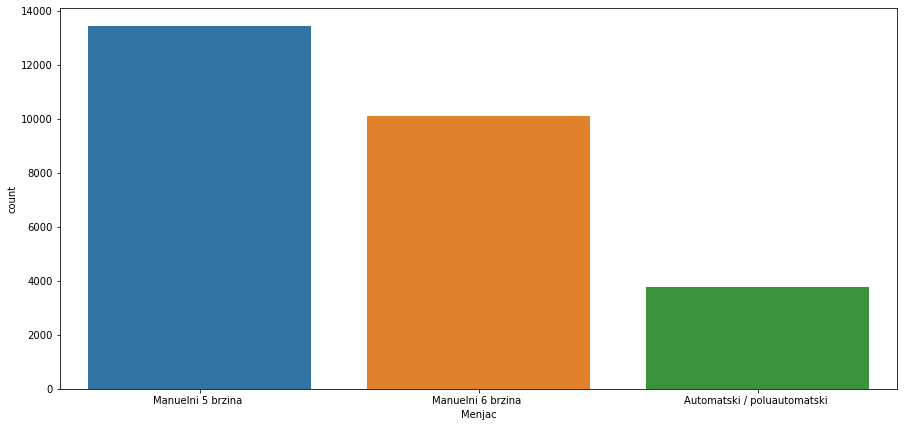

In [272]:
plt.figure(figsize=(15,7))
sns.countplot(df['Menjac'], order = df['Menjac'].value_counts().index)

([<matplotlib.axis.XTick at 0x1b423760370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

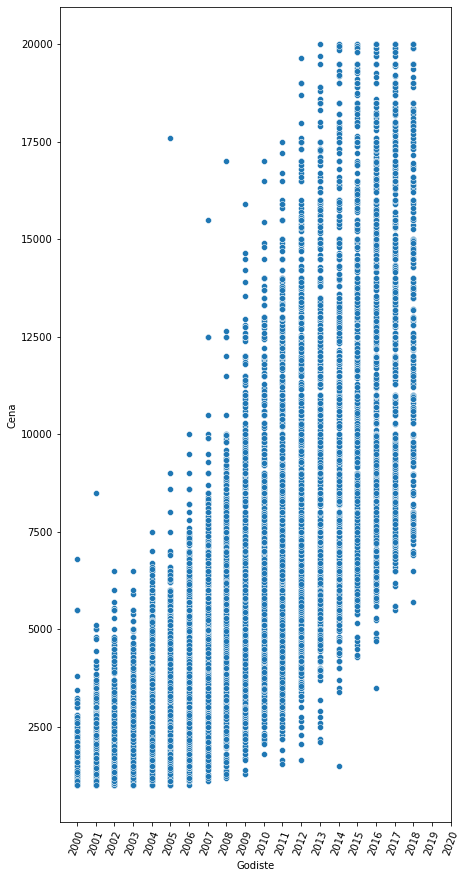

In [273]:
plt.figure(figsize=(7,15))
sns.scatterplot(df['Godiste'], df['Cena'])
plt.xticks(np.arange(2000,2021), rotation=70)

In [274]:
for i in range(6):
    for year in range(2000,2021):
        max = df[df['Godiste']==year]['Cena'].max()
        min = df[df['Godiste']==year]['Cena'].min()
        df.drop(df[(df['Godiste']==year) & (df['Cena']==max)].index, inplace=True)
        df.drop(df[(df['Godiste']==year) & (df['Cena']==min)].index, inplace=True)

In [275]:
for i in range(4):
    for year in range(2007,2015):
        max = df[df['Godiste']==year]['Cena'].max()
        #min = df[df['Godiste']==year]['Cena'].min()
        df.drop(df[(df['Godiste']==year) & (df['Cena']==max)].index, inplace=True)
        #df.drop(df[(df['Godiste']==year) & (df['Cena']==min)].index, inplace=True)

([<matplotlib.axis.XTick at 0x1b4196ae370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

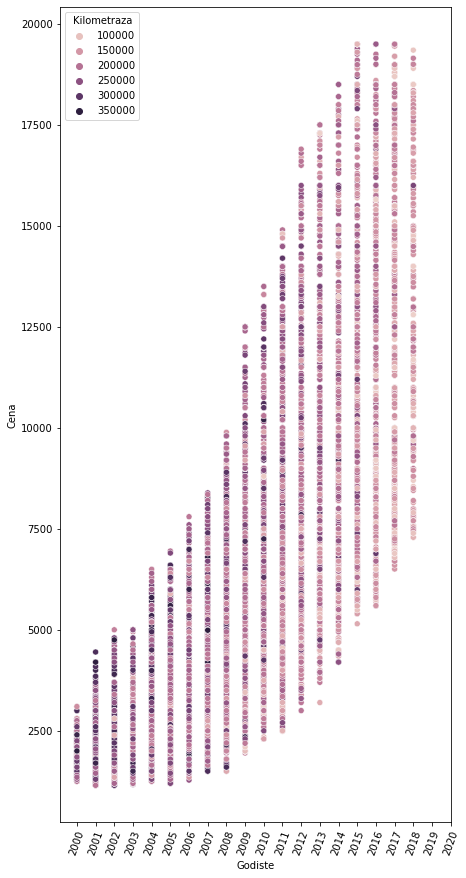

In [276]:
plt.figure(figsize=(7,15))
sns.scatterplot(df['Godiste'], df['Cena'], data=df, hue='Kilometraza')
plt.xticks(np.arange(2000,2021), rotation=70)

In [277]:
df = df.groupby('Model').filter(lambda x: len(x)>=30)

<AxesSubplot:xlabel='Kilometraza'>

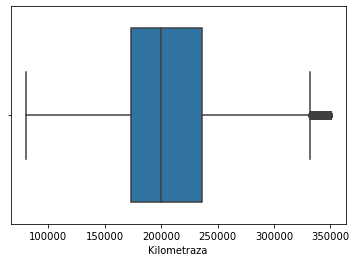

In [278]:
sns.boxplot(df['Kilometraza'])

In [279]:
df.drop(df[(df['Kilometraza']>=320000)].index, inplace=True)

<AxesSubplot:xlabel='Kilometraza'>

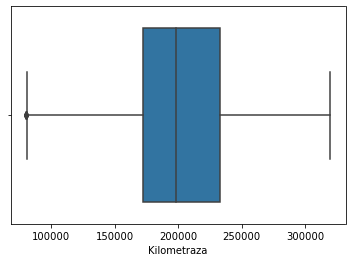

In [280]:
sns.boxplot(df['Kilometraza'])

<AxesSubplot:xlabel='Cena'>

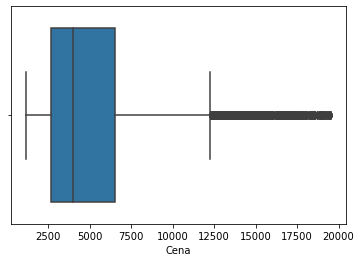

In [281]:
sns.boxplot(df['Cena'])

In [282]:
#df.drop(df[(df['Cena']>=12000)].index, inplace=True)

In [283]:
df

Marka         Model  Godiste  Kilometraza Karoserija  Gorivo  \
0         Volkswagen   Passat B5.5     2003       217000    Karavan   Dizel   
2         Volkswagen     Passat B6     2008       244000   Limuzina   Dizel   
3               Audi            A3     2013       164000     Hecbek   Dizel   
4               Fiat  Grande Punto     2012        95987     Hecbek  Benzin   
5         Volkswagen        Golf 6     2009       219000     Hecbek   Dizel   
...              ...           ...      ...          ...        ...     ...   
28539           Seat          Leon     2010       223891     Hecbek  Benzin   
28540           Ford         Focus     2006       270500     Hecbek  Benzin   
28541           Audi            A4     2008       215400   Limuzina   Dizel   
28542  Mercedes Benz         A 170     2002       230000     Hecbek   Dizel   
28543        Peugeot           308     2010       196400     Hecbek   Dizel   

       Kubikaza  Snaga motora   Cena      EKM     Pogon  \
0           1.9           131   1850  Euro 3   Prednji    
2           1.9           105   5499  Euro 4   Prednji    
3           2.0           150  11200  Euro 5   Prednji    
4           1.4            77   4699  Euro 5   Prednji    
5           2.0           110   6950  Euro 5   Prednji    
...         ...           ...    ...      ...       ...   
28539       1.4           124   4700  Euro 5   Prednji    
28540       1.8           125   2999  Euro 4   Prednji    
28541       2.0           140   7900  Euro 5   Prednji    
28542       1.7            95   1500  Euro 3   Prednji    
28543       1.6            92   3900  Euro 5   Prednji    

                             Menjac  Broj vrata  Broj sedista  \
0                Manuelni 6 brzina   4/5 vrata              5   
2                Manuelni 5 brzina   4/5 vrata              5   
3                Manuelni 6 brzina   2/3 vrata              5   
4                Manuelni 5 brzina   4/5 vrata              5   
5                Manuelni 5 brzina   4/5 vrata              5   
...                             ...         ...           ...   
28539            Manuelni 6 brzina   4/5 vrata              5   
28540            Manuelni 5 brzina   4/5 vrata              5   
28541  Automatski / poluautomatski   4/5 vrata              5   
28542            Manuelni 5 brzina   4/5 vrata              5   
28543            Manuelni 5 brzina   4/5 vrata              5   

                   Klima     Boja Materijal enterijera Boja enterijera  
0      Automatska klima   Srebrna                 Stof            Crna  
2        Manuelna klima     Plava                 Stof            Crna  
3      Automatska klima      Bela                 Stof            Siva  
4        Manuelna klima      Bela                 Stof            Crna  
5      Automatska klima      Crna                 Stof            Crna  
...                  ...      ...                  ...             ...  
28539    Manuelna klima      Siva                Druga            Crna  
28540  Automatska klima      Siva                Velur            Siva  
28541  Automatska klima      Crna     Kombinovana koza            Crna  
28542    Manuelna klima     Bordo                 Stof            Siva  
28543  Automatska klima     Plava                 Stof            Crna  

[25719 rows x 18 columns]

<AxesSubplot:>

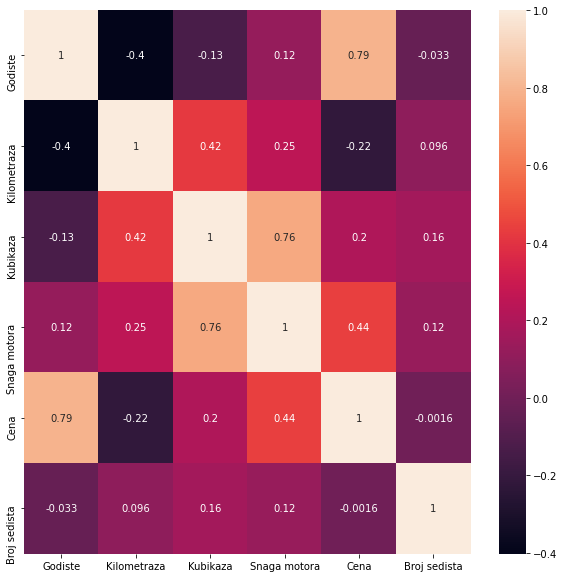

In [284]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

### Engine power

In [285]:
for model in df['Model'].unique():
    print('-'*30)
    print('Model: {}'.format(model))
    power = sorted(list(df[df['Model']==model]['Snaga motora'].unique()))
    print(power)
    base=5
    new_power = sorted(set([base * round(a_number/base) for a_number in power]))
    print('Converted')
    print(new_power)
        

------------------------------
Model: Passat B5.5
[101, 102, 105, 116, 129, 131, 136, 150, 163, 179]
Converted
[100, 105, 115, 130, 135, 150, 165, 180]
------------------------------
Model: Passat B6
[101, 105, 109, 110, 116, 121, 122, 136, 139, 140, 141, 143, 150, 160, 170, 200]
Converted
[100, 105, 110, 115, 120, 135, 140, 145, 150, 160, 170, 200]
------------------------------
Model: A3
[75, 90, 101, 102, 105, 109, 110, 116, 122, 124, 125, 131, 136, 139, 140, 141, 150, 160, 170, 179, 184, 200]
Converted
[75, 90, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 160, 170, 180, 185, 200]
------------------------------
Model: Grande Punto
[64, 65, 68, 69, 75, 77, 80, 84, 86, 90, 94, 95, 105, 120, 129, 131, 135, 155]
Converted
[65, 70, 75, 80, 85, 90, 95, 105, 120, 130, 135, 155]
------------------------------
Model: Golf 6
[79, 80, 86, 90, 102, 105, 109, 110, 120, 121, 122, 129, 136, 139, 140, 160, 163, 170, 204, 211]
Converted
[80, 85, 90, 100, 105, 110, 120, 130, 135, 140, 160, 165, 

[69, 75, 80, 84, 102, 105, 110, 122, 140, 150]
Converted
[70, 75, 80, 85, 100, 105, 110, 120, 140, 150]
------------------------------
Model: 500
[60, 68, 69, 75, 80, 84, 86, 94, 95, 99, 101, 135, 139]
Converted
[60, 70, 75, 80, 85, 95, 100, 135, 140]
------------------------------
Model: 3
[84, 90, 101, 105, 106, 109, 110, 116, 117, 120, 143, 150]
Converted
[85, 90, 100, 105, 110, 115, 120, 145, 150]
------------------------------
Model: B 180
[107, 109, 110, 116, 120, 122, 139, 140, 156]
Converted
[105, 110, 115, 120, 140, 155]
------------------------------
Model: 316
[84, 105, 106, 114, 116, 117, 118, 122, 136]
Converted
[85, 105, 115, 120, 135]
------------------------------
Model: Q5
[140, 143, 150, 170, 177, 179, 190, 211]
Converted
[140, 145, 150, 170, 175, 180, 190, 210]
------------------------------
Model: C 200
[90, 116, 117, 122, 129, 135, 136, 143, 162, 163, 184]
Converted
[90, 115, 120, 130, 135, 145, 160, 165, 185]
------------------------------
Model: Fusion
[68, 75, 7

In [286]:
base = 5
df['Snaga motora'] = df['Snaga motora'].apply(lambda x: int(base * round(x/base)))

In [287]:
#vc = df['Model'].value_counts()
#print(vc[vc > 30])

In [288]:
for kubikaza in sorted(df['Kubikaza'].unique()):
    print(kubikaza)
    print('-'*30)
    print(sorted(df[df['Kubikaza']==kubikaza]['Snaga motora'].unique()))

0.9
------------------------------
[70, 80, 85, 90, 95, 100, 105]
1.0
------------------------------
[60, 65, 70, 75, 95, 100, 105, 110, 115, 125, 170]
1.1
------------------------------
[55, 60, 65, 75, 80, 100, 105]
1.2
------------------------------
[55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 130, 140, 150]
1.3
------------------------------
[60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
1.4
------------------------------
[55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 155, 160, 165, 170, 180, 205]
1.5
------------------------------
[60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 130, 135, 140, 150]
1.6
------------------------------
[60, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 155, 160, 165, 170, 175, 180, 190, 200, 210]
1.7
------------------------------
[55, 65, 70, 75, 80, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 200]
1.8
------------------------------
[75, 80, 85, 9

In [289]:
df[(df['Kubikaza']==2.0) & (df['Snaga motora']<75)]

Marka  Model  Godiste  Kilometraza Karoserija  Gorivo  Kubikaza  \
215    Volkswagen  Caddy     2005       205000    MiniVan   Dizel       2.0   
4204   Volkswagen  Caddy     2005       195000    MiniVan   Dizel       2.0   
4797   Volkswagen  Caddy     2006       235000    MiniVan   Dizel       2.0   
8650   Volkswagen  Caddy     2005       313000    MiniVan   Dizel       2.0   
14183  Volkswagen  Caddy     2005       231866    MiniVan   Dizel       2.0   
17084     Peugeot    206     2003       218674     Hecbek   Dizel       2.0   
21996  Volkswagen  Caddy     2006       224000    MiniVan   Dizel       2.0   
22203        Seat  Ibiza     2002       260000     Hecbek  Benzin       2.0   
25529  Volkswagen  Caddy     2004       245000    MiniVan   Dizel       2.0   
27884  Volkswagen  Caddy     2005       195000    MiniVan   Dizel       2.0   
28477  Volkswagen  Caddy     2006       235000    MiniVan   Dizel       2.0   

       Snaga motora  Cena      EKM     Pogon              Menjac  Broj vrata  \
215              70  3699  Euro 4   Prednji   Manuelni 5 brzina   4/5 vrata    
4204             70  2900  Euro 3   Prednji   Manuelni 5 brzina   4/5 vrata    
4797             70  3250  Euro 4   Prednji   Manuelni 5 brzina   2/3 vrata    
8650             70  3500  Euro 3   Prednji   Manuelni 5 brzina   4/5 vrata    
14183            70  3600  Euro 4   Prednji   Manuelni 5 brzina   2/3 vrata    
17084            70  1899  Euro 4   Prednji   Manuelni 5 brzina   4/5 vrata    
21996            70  4100  Euro 3   Prednji   Manuelni 5 brzina   4/5 vrata    
22203            65  1399  Euro 3   Prednji   Manuelni 5 brzina   4/5 vrata    
25529            70  3750  Euro 3   Prednji   Manuelni 5 brzina   4/5 vrata    
27884            70  2900  Euro 3   Prednji   Manuelni 5 brzina   4/5 vrata    
28477            70  3250  Euro 4   Prednji   Manuelni 5 brzina   2/3 vrata    

       Broj sedista            Klima    Boja Materijal enterijera  \
215               5  Manuelna klima    Plava                 Stof   
4204              5      Nema klimu    Žuta                  Stof   
4797              2      Nema klimu    Žuta                  Stof   
8650              7      Nema klimu    Žuta                  Stof   
14183             2      Nema klimu   Crvena                 Stof   
17084             5  Manuelna klima     Siva                 Stof   
21996             5  Manuelna klima     Bela                 Stof   
22203             5      Nema klimu    Plava                 Stof   
25529             5  Manuelna klima     Siva                 Stof   
27884             5      Nema klimu    Žuta                  Stof   
28477             2      Nema klimu    Žuta                  Stof   

      Boja enterijera  
215             Druga  
4204             Crna  
4797             Crna  
8650             Crna  
14183            Siva  
17084             Bež  
21996            Crna  
22203            Siva  
25529            Siva  
27884            Crna  
28477            Crna

In [290]:
df.count()[0]

25719

In [291]:
df_new = pd.DataFrame()
for kubikaza in sorted(df['Kubikaza'].unique()):
    print(kubikaza)
    print('-'*30)
    print(df[df['Kubikaza']==kubikaza]['Snaga motora'].value_counts())
    df_new = df_new.append(df[df['Kubikaza']==kubikaza].groupby("Snaga motora").filter(lambda x: len(x) >= 4))

0.9
------------------------------
90     30
85     21
80      2
105     2
70      1
95      1
100     1
Name: Snaga motora, dtype: int64
1.0
------------------------------
70     222
60      73
65      25
125     16
100     12
115      7
110      3
75       2
95       2
105      2
170      1
Name: Snaga motora, dtype: int64
1.1
------------------------------
60     139
75     138
100     40
55      38
65       7
105      3
80       2
Name: Snaga motora, dtype: int64
1.2
------------------------------
75     495
70     335
60     297
80     230
85     163
65     159
95     109
90      84
55      84
105     65
100     19
115     12
130      7
110      6
120      2
150      1
140      1
Name: Snaga motora, dtype: int64
1.3
------------------------------
75     88
85     59
90     59
70     56
95     44
100    25
60      7
80      6
105     2
65      1
Name: Snaga motora, dtype: int64
1.4
------------------------------
75     700
70     526
90     391
95     234
80     212
120    173
100 

In [292]:
df = df_new

In [293]:
for kubikaza in sorted(df['Kubikaza'].unique()):
    print(kubikaza)
    print('-'*30)
    print(df[df['Kubikaza']==kubikaza]['Snaga motora'].value_counts())

0.9
------------------------------
90    30
85    21
Name: Snaga motora, dtype: int64
1.0
------------------------------
70     222
60      73
65      25
125     16
100     12
115      7
Name: Snaga motora, dtype: int64
1.1
------------------------------
60     139
75     138
100     40
55      38
65       7
Name: Snaga motora, dtype: int64
1.2
------------------------------
75     495
70     335
60     297
80     230
85     163
65     159
95     109
90      84
55      84
105     65
100     19
115     12
130      7
110      6
Name: Snaga motora, dtype: int64
1.3
------------------------------
75     88
85     59
90     59
70     56
95     44
100    25
60      7
80      6
Name: Snaga motora, dtype: int64
1.4
------------------------------
75     700
70     526
90     391
95     234
80     212
120    173
100    136
140     81
150     51
85      49
125     44
60      30
170     22
160     20
130     17
105     15
155     15
135     14
110     11
55       6
180      4
Name: Snaga motora, d

In [294]:
df_new = pd.DataFrame()
for model in sorted(df['Model'].unique()):
    print(model)
    print('-'*30)
    print(df[df['Model']==model]['Snaga motora'].value_counts())
    df_new = df_new.append(df[df['Model']==model].groupby("Snaga motora").filter(lambda x: len(x) >= 3))
df = df_new

107
------------------------------
70    35
55     1
Name: Snaga motora, dtype: int64
116
------------------------------
115    86
120    22
135    17
90      1
Name: Snaga motora, dtype: int64
118
------------------------------
145    69
120    65
150     9
135     6
130     2
115     1
140     1
190     1
Name: Snaga motora, dtype: int64
120
------------------------------
165    50
175    15
160     8
150     4
185     4
190     4
145     1
170     1
200     1
Name: Snaga motora, dtype: int64
147
------------------------------
120    51
115    48
105    30
150    28
140     6
110     3
170     2
100     1
190     1
Name: Snaga motora, dtype: int64
156
------------------------------
115    25
140    19
150     9
110     8
120     3
155     1
Name: Snaga motora, dtype: int64
159
------------------------------
150    112
120     29
170      5
140      4
115      2
135      2
165      1
Name: Snaga motora, dtype: int64
2
------------------------------
75     19
70     16
85      8
80    

Name: Snaga motora, dtype: int64
C 220
------------------------------
170    66
145    21
150    10
135     4
115     2
140     1
205     1
125     1
Name: Snaga motora, dtype: int64
C-Max
------------------------------
110    39
115    37
135    22
90     20
125    15
100    14
95      6
120     5
105     2
140     2
75      1
130     1
150     1
Name: Snaga motora, dtype: int64
C1
------------------------------
70    68
55     4
75     1
Name: Snaga motora, dtype: int64
C2
------------------------------
60     18
70     16
75      8
120     4
110     1
Name: Snaga motora, dtype: int64
C3
------------------------------
70     153
75     110
60      50
90      41
95      15
110     15
100     13
80       9
120      4
Name: Snaga motora, dtype: int64
C3 Picasso
------------------------------
90     23
110    21
95     14
100     1
115     1
Name: Snaga motora, dtype: int64
C4
------------------------------
90     120
110     74
100     41
120     17
135     16
115      9
150      4
140 

MiTo
------------------------------
120    17
155    11
95      8
85      6
105     5
135     4
80      4
90      4
170     3
115     2
70      1
75      1
Name: Snaga motora, dtype: int64
Micra
------------------------------
80    31
65    22
90    10
85     6
60     2
Name: Snaga motora, dtype: int64
Modus
------------------------------
75     32
100    16
85     15
65     10
70     10
80      6
90      6
110     6
105     2
Name: Snaga motora, dtype: int64
Mondeo
------------------------------
115    45
130    32
140    31
150    18
125    17
90      7
120     7
165     4
110     2
135     2
100     1
155     1
180     1
Name: Snaga motora, dtype: int64
Musa
------------------------------
95     16
70      9
100     9
90      4
75      3
80      1
120     1
Name: Snaga motora, dtype: int64
Note
------------------------------
90     13
85     12
110     6
70      1
75      1
105     1
120     1
Name: Snaga motora, dtype: int64
Octavia
------------------------------
105    156
140    

In [295]:
df.count()[0]

25111

In [296]:
df_new = pd.DataFrame()
for model in sorted(df['Model'].unique()):
    print(model)
    print('-'*30)
    df_new = df_new.append(df[df['Model']==model].groupby("Kubikaza").filter(lambda x: len(x) >= 3))
    print(df[df['Model']==model]['Kubikaza'].value_counts())
df = df_new

107
------------------------------
1.0    35
Name: Kubikaza, dtype: int64
116
------------------------------
1.6    68
2.0    43
1.5    14
Name: Kubikaza, dtype: int64
118
------------------------------
2.0    146
1.9      3
Name: Kubikaza, dtype: int64
120
------------------------------
2.0    85
Name: Kubikaza, dtype: int64
147
------------------------------
1.9    113
1.6     51
2.0      2
Name: Kubikaza, dtype: int64
156
------------------------------
1.9    51
1.7     4
2.0     3
1.6     2
1.8     2
2.4     2
Name: Kubikaza, dtype: int64
159
------------------------------
1.9    134
2.0     12
1.8      4
Name: Kubikaza, dtype: int64
2
------------------------------
1.4    24
1.3    17
1.2     8
1.7     1
Name: Kubikaza, dtype: int64
2008
------------------------------
1.6    22
1.5     1
Name: Kubikaza, dtype: int64
206
------------------------------
1.4    138
1.6     34
1.1     20
2.0     19
1.9      5
1.8      2
Name: Kubikaza, dtype: int64
207
------------------------------
1.

2.0    26
1.9    18
1.6     7
2.2     3
Name: Kubikaza, dtype: int64
Fabia
------------------------------
1.4    96
1.2    83
1.9    37
1.6    11
1.0     3
1.1     1
Name: Kubikaza, dtype: int64
Fiesta
------------------------------
1.4    144
1.2     79
1.6     39
1.3     31
1.5     17
1.0      4
1.8      1
Name: Kubikaza, dtype: int64
Focus
------------------------------
1.6    227
1.8    135
2.0     25
1.5     23
1.0     17
1.4     11
1.9      4
1.7      1
Name: Kubikaza, dtype: int64
Fox
------------------------------
1.2    21
1.4    11
Name: Kubikaza, dtype: int64
Fusion
------------------------------
1.4    29
1.6    12
Name: Kubikaza, dtype: int64
Galaxy
------------------------------
1.9    24
2.0    17
1.6     3
Name: Kubikaza, dtype: int64
Giulietta
------------------------------
1.6    23
2.0    22
1.4    20
1.9     1
Name: Kubikaza, dtype: int64
Golf 4
------------------------------
1.9    162
1.6     91
1.4     41
1.8      9
2.0      8
Name: Kubikaza, dtype: int64
Golf 5


In [297]:
df.count()[0]

24973

In [298]:
df['Model'].value_counts()

A4             1081
Golf 5          728
320             705
A3              641
Polo            627
               ... 
S-Max            28
Qashqai + 2      28
406              27
Accord           24
2008             22
Name: Model, Length: 164, dtype: int64

<AxesSubplot:xlabel='Cena', ylabel='Density'>

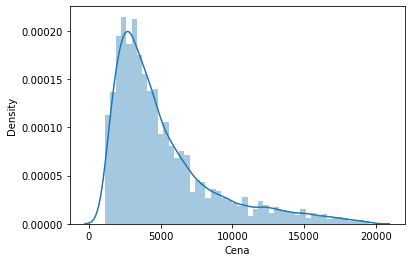

In [299]:
sns.distplot(df['Cena'])

([<matplotlib.axis.YTick at 0x1b418a511f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

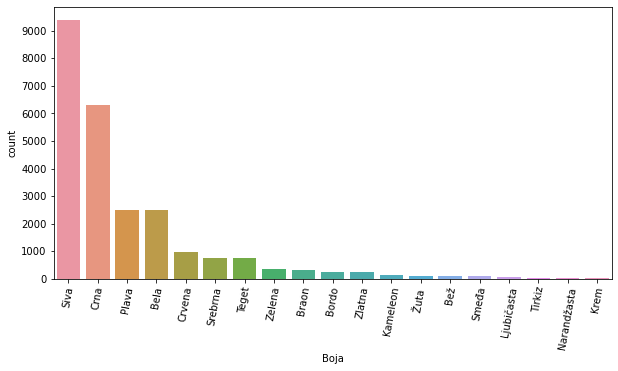

In [300]:
plt.figure(figsize=(10,5))
sns.countplot(df['Boja'], order=df['Boja'].value_counts().index)
plt.xticks(rotation=80)
plt.yticks(np.arange(0,10000, 1000))

In [301]:
df['Boja'].unique()

array(['Crna', 'Siva', 'Srebrna', 'Crvena', 'Žuta ', 'Plava', 'Bela',
       'Teget', 'Braon', 'Bordo', 'Kameleon', 'Zelena', 'Smeđa', 'Bež',
       'Zlatna', 'Narandžasta', 'Krem', 'Tirkiz', 'Ljubičasta'],
      dtype=object)

In [302]:
def change_color(row):
    if row not in ['Siva', 'Crna', 'Bela','Plava', 'Crvena']:
        return 'Druga'
    else:
        return row
df['Boja'] = df['Boja'].apply(change_color)

In [303]:
df['Boja'].unique()

array(['Crna', 'Siva', 'Druga', 'Crvena', 'Plava', 'Bela'], dtype=object)

([<matplotlib.axis.YTick at 0x1b428df7f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

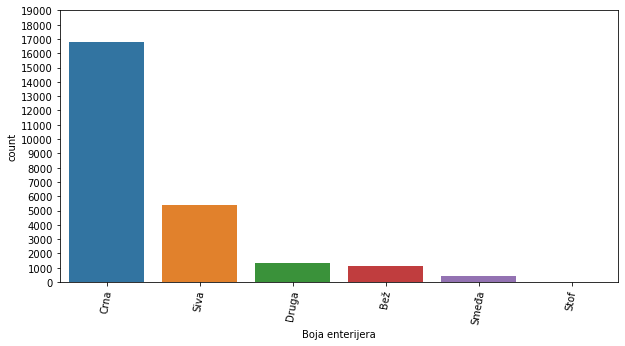

In [304]:
plt.figure(figsize=(10,5))
sns.countplot(df['Boja enterijera'], order=df['Boja enterijera'].value_counts().index)
plt.xticks(rotation=80)
plt.yticks(np.arange(0,20000, 1000))

In [305]:
def change_color_inside(row):
    if row not in ['Siva', 'Crna', 'Bež']:
        return 'Druga'
    else:
        return row
df['Boja enterijera'] = df['Boja enterijera'].apply(change_color_inside)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Stof'),
  Text(1, 0, 'Prirodna koza'),
  Text(2, 0, 'Kombinovana koza'),
  Text(3, 0, 'Velur'),
  Text(4, 0, 'Druga')])

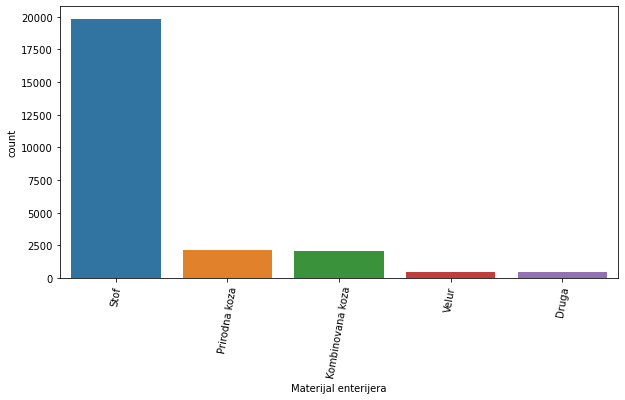

In [306]:
plt.figure(figsize=(10,5))
sns.countplot(df['Materijal enterijera'], order=df['Materijal enterijera'].value_counts().index)
plt.xticks(rotation=80)


In [307]:
df['Materijal enterijera'].unique()

array(['Stof', 'Kombinovana koza', 'Prirodna koza', 'Velur', 'Druga'],
      dtype=object)

In [308]:
def change_material(row):
    if row not in ['Stof', 'Kombinovana koza', 'Prirodna koza']:
        return 'Drugi'
    else:
        return row
df['Materijal enterijera'] = df['Materijal enterijera'].apply(change_material)

In [309]:
#df = df.groupby('Model').filter(lambda x: len(x)>=30)

In [310]:
df.drop(columns=['Broj sedista', 'Broj vrata', 'Boja enterijera'], inplace=True)

In [311]:
df.count()[0]

24973

-----------------------------------
Model 107


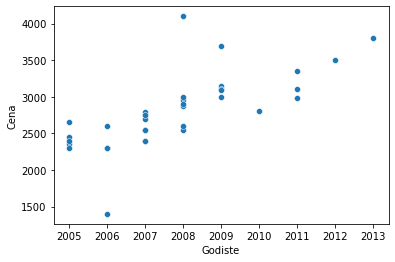

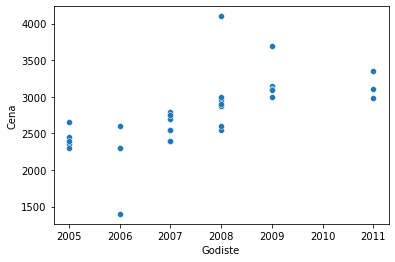

-----------------------------------
Model 116


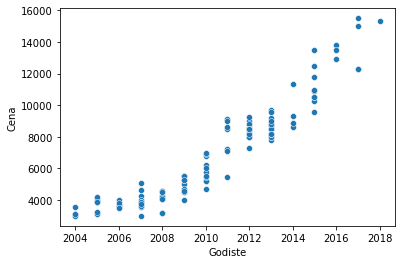

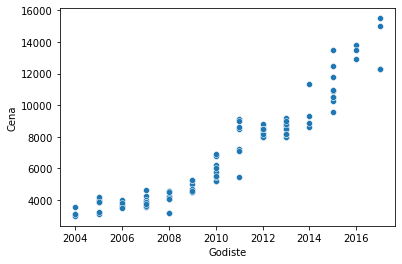

-----------------------------------
Model 118


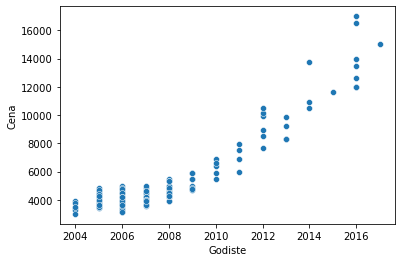

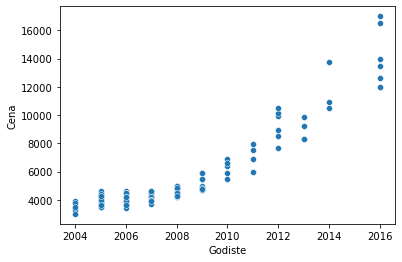

-----------------------------------
Model 120


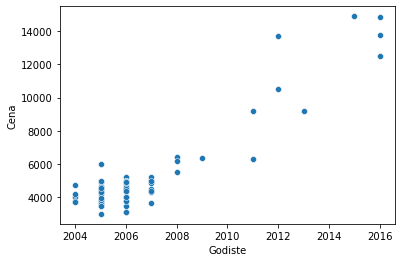

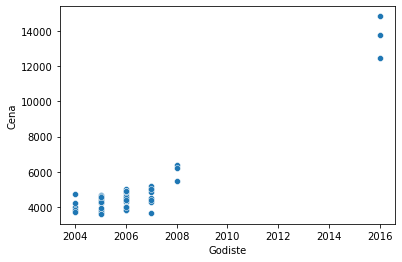

-----------------------------------
Model 147


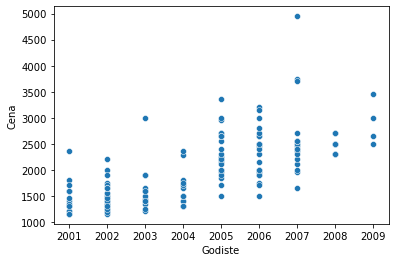

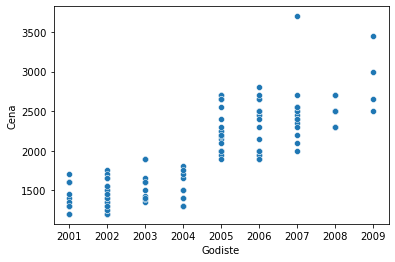

-----------------------------------
Model 156


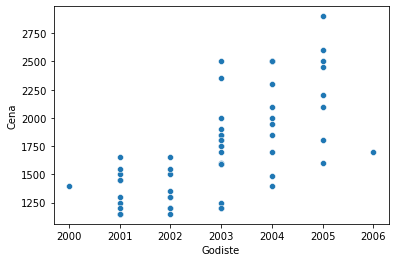

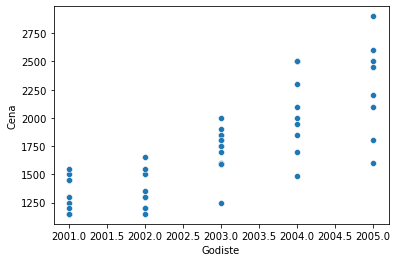

-----------------------------------
Model 159


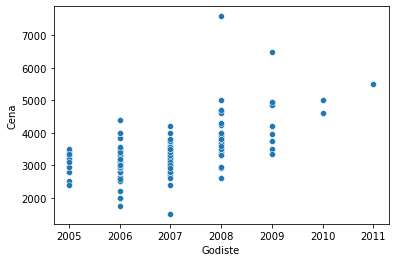

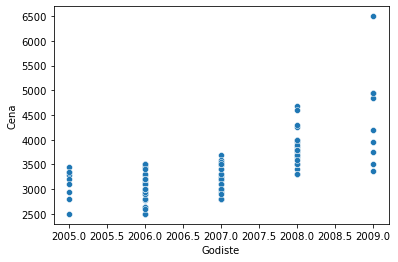

-----------------------------------
Model 2


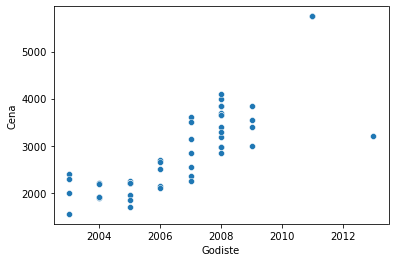

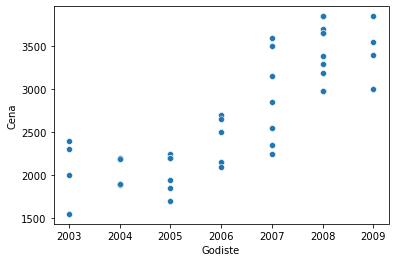

-----------------------------------
Model 206


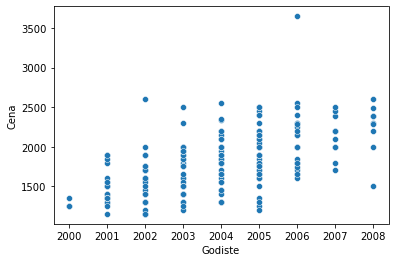

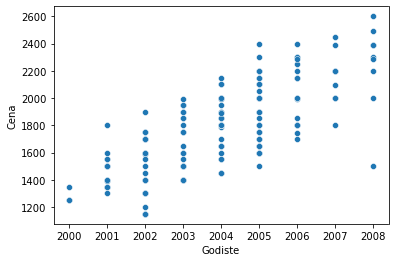

-----------------------------------
Model 207


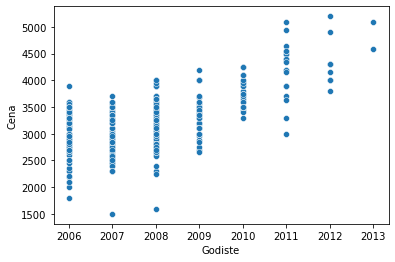

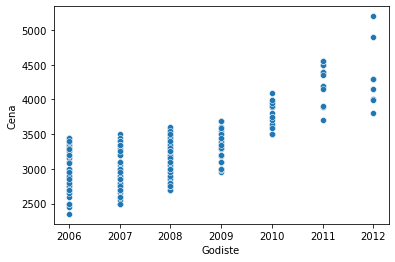

-----------------------------------
Model 208


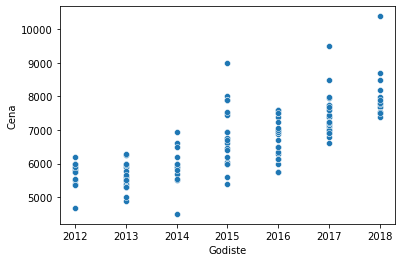

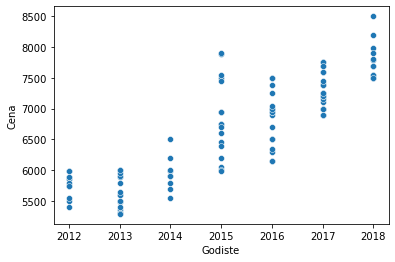

-----------------------------------
Model 3


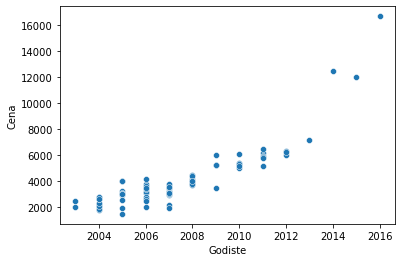

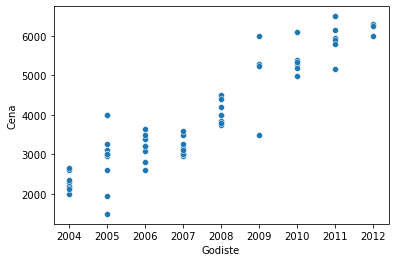

-----------------------------------
Model 3008


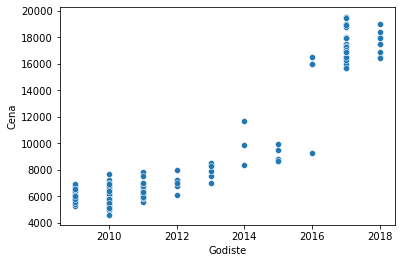

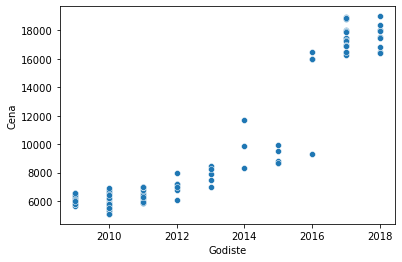

-----------------------------------
Model 307


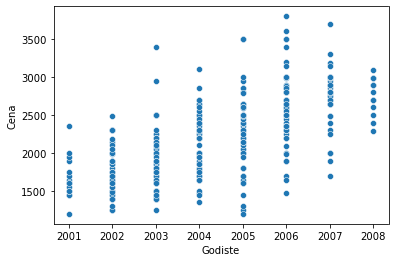

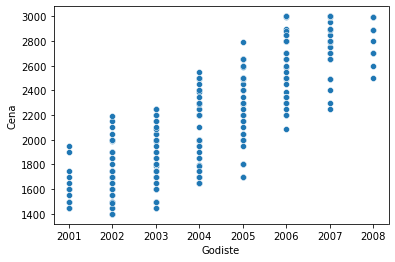

-----------------------------------
Model 308


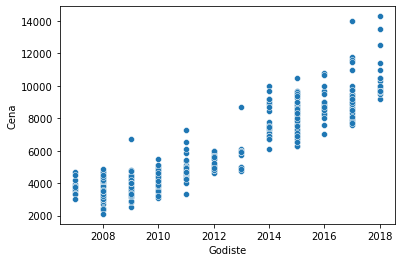

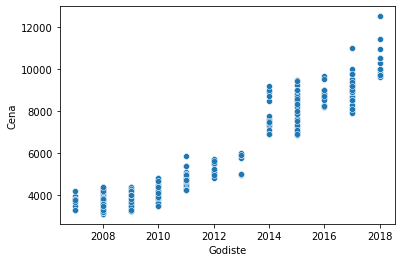

-----------------------------------
Model 316


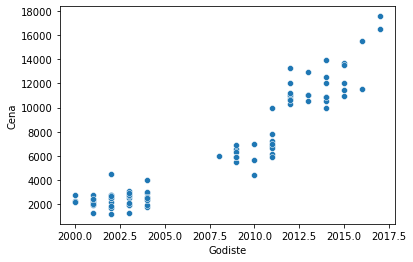

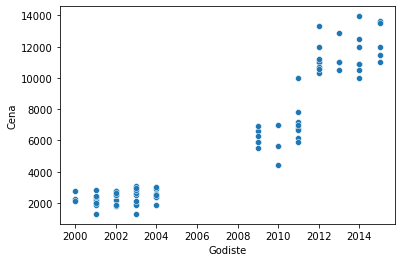

-----------------------------------
Model 318


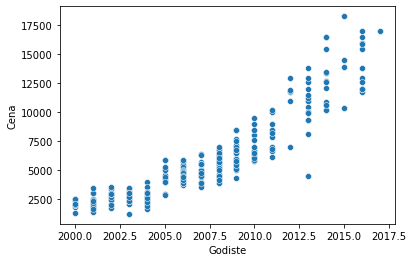

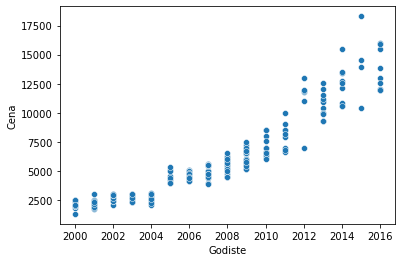

-----------------------------------
Model 320


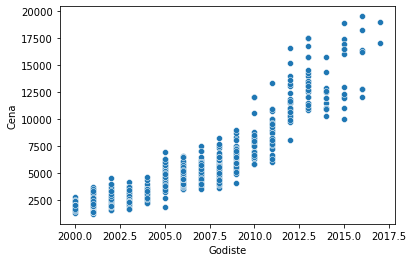

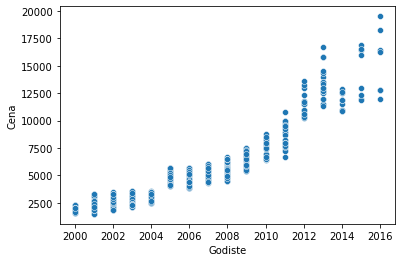

-----------------------------------
Model 407


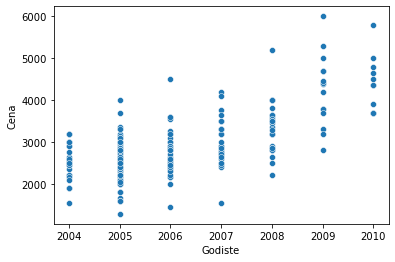

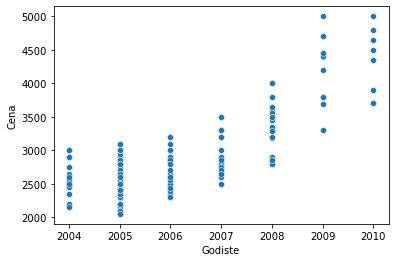

-----------------------------------
Model 5


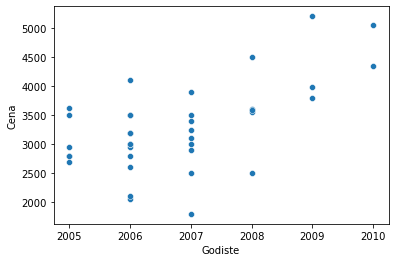

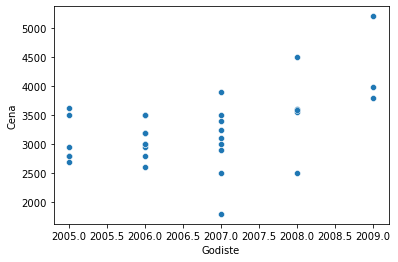

-----------------------------------
Model 500


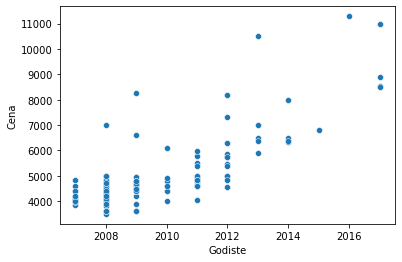

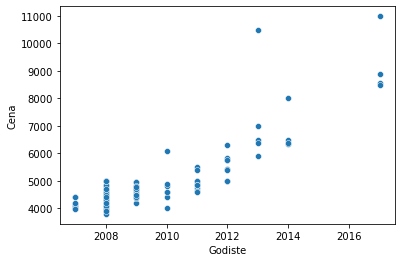

-----------------------------------
Model 5008


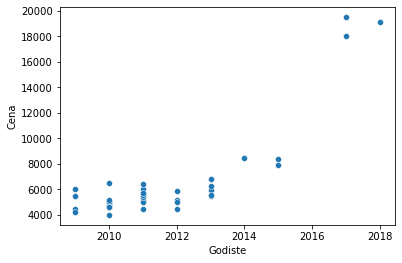

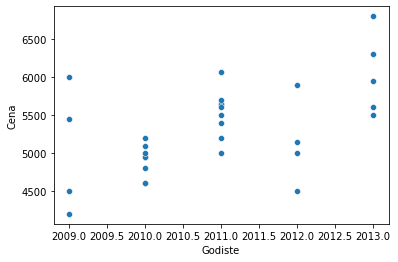

-----------------------------------
Model 500L


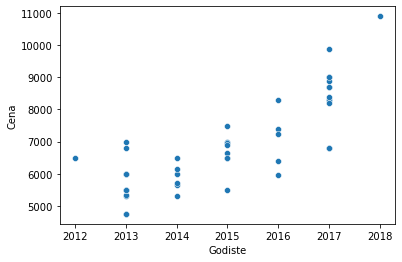

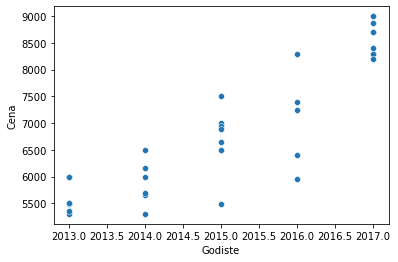

-----------------------------------
Model 508


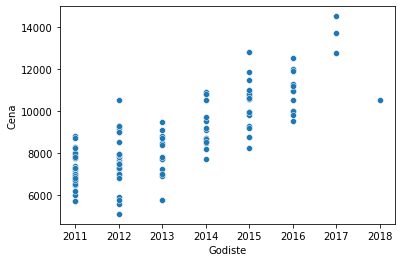

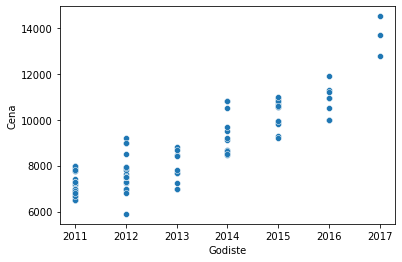

-----------------------------------
Model 520


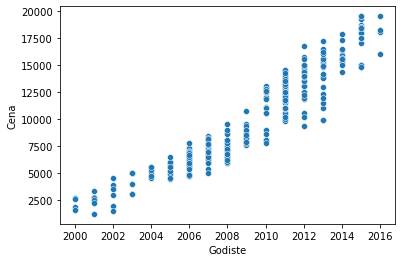

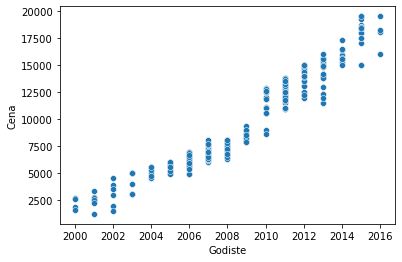

-----------------------------------
Model 525


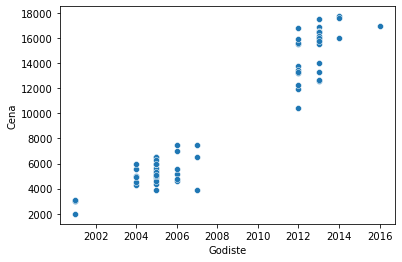

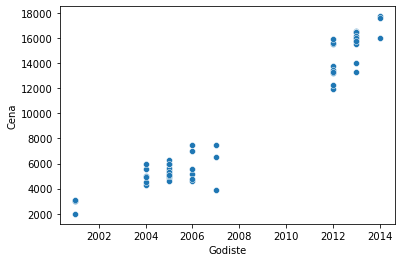

-----------------------------------
Model 6


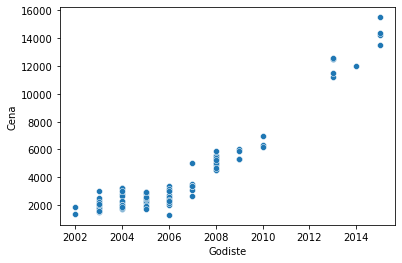

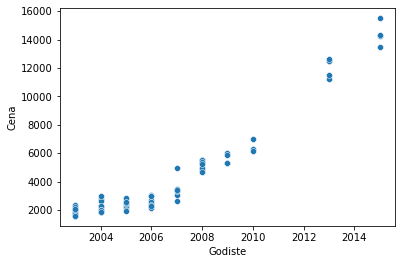

-----------------------------------
Model A 150


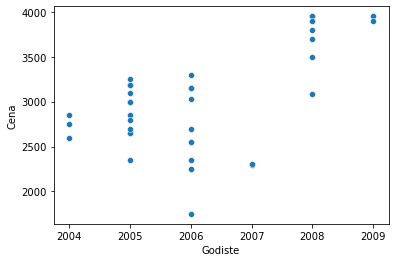

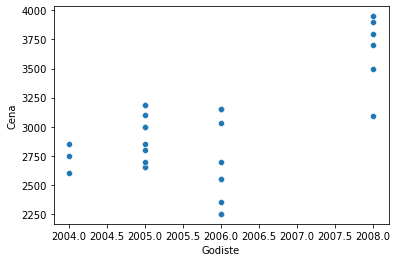

-----------------------------------
Model A 160


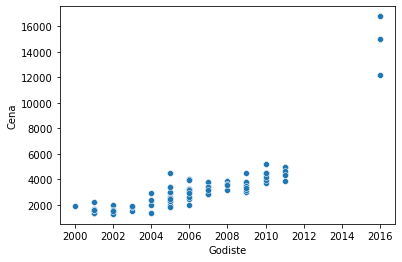

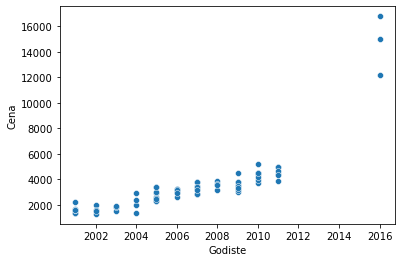

-----------------------------------
Model A 170


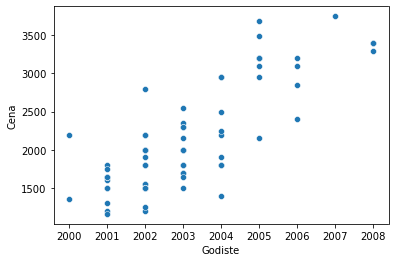

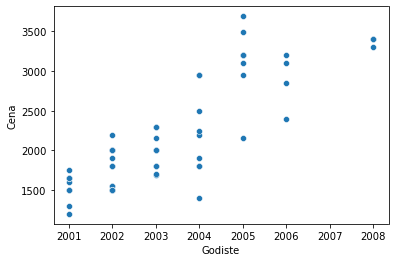

-----------------------------------
Model A 180


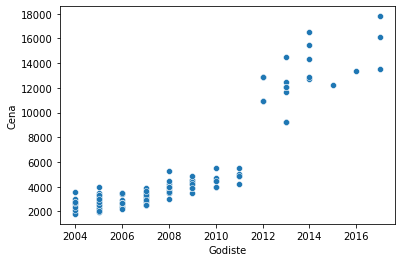

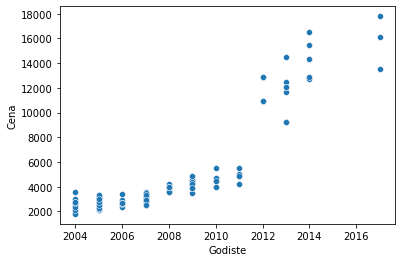

-----------------------------------
Model A2


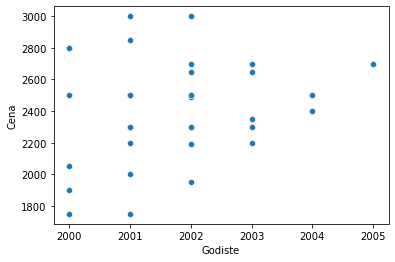

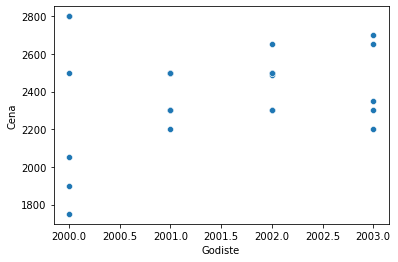

-----------------------------------
Model A3


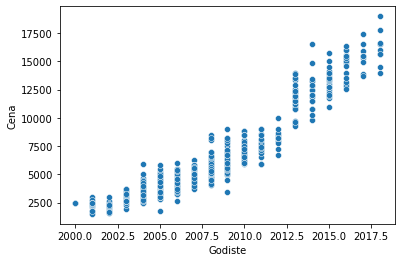

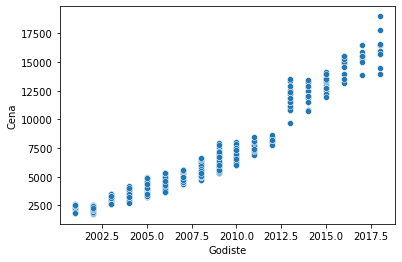

-----------------------------------
Model A4


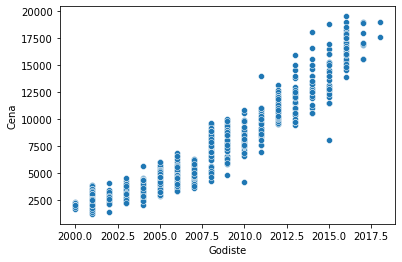

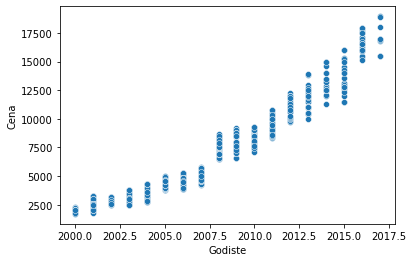

-----------------------------------
Model A5


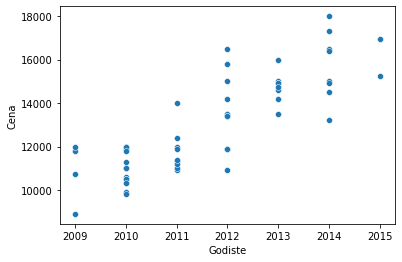

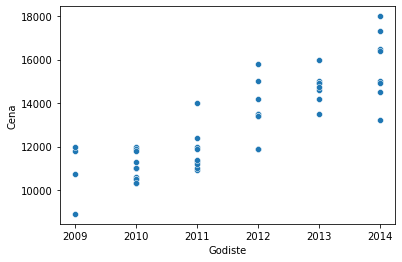

-----------------------------------
Model A6


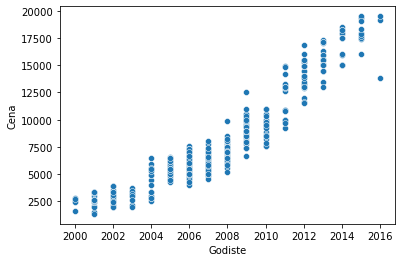

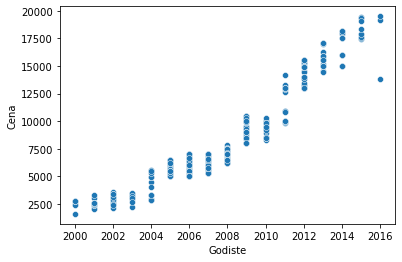

-----------------------------------
Model Agila


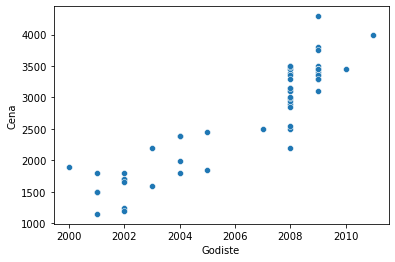

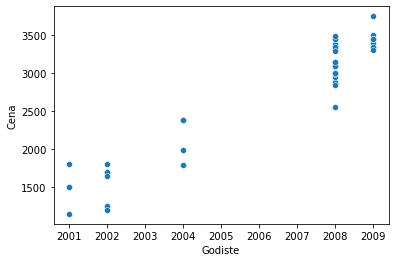

-----------------------------------
Model Alhambra


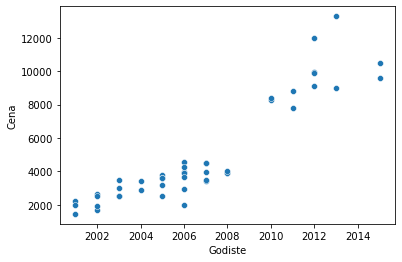

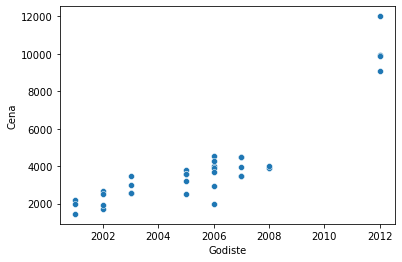

-----------------------------------
Model Altea


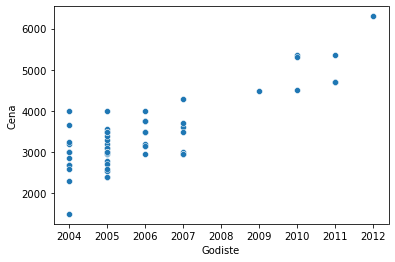

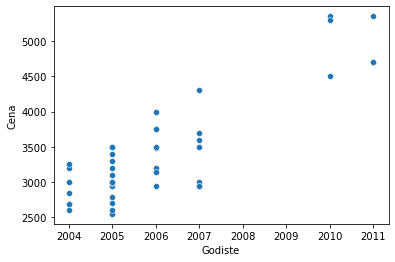

-----------------------------------
Model Antara


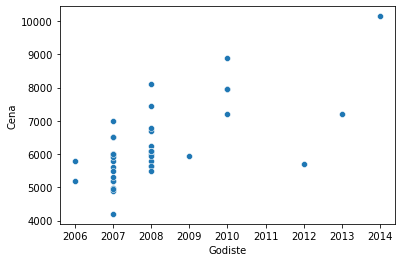

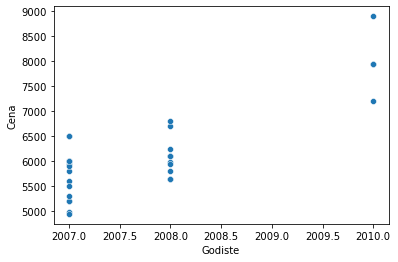

-----------------------------------
Model Astra G


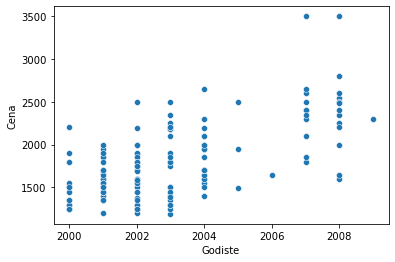

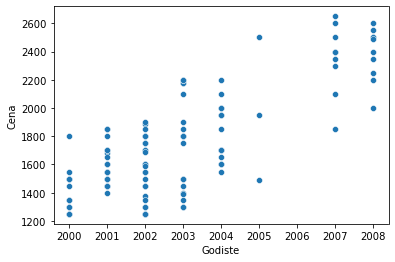

-----------------------------------
Model Astra H


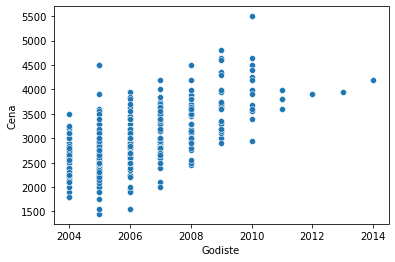

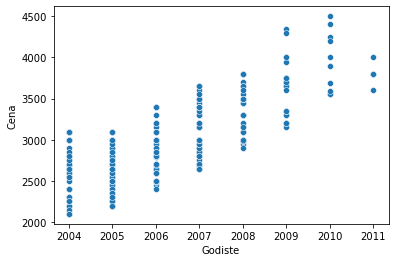

-----------------------------------
Model Astra J


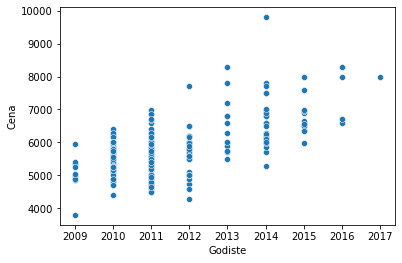

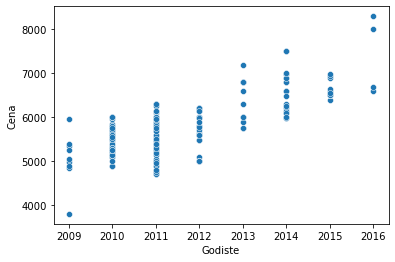

-----------------------------------
Model Astra K


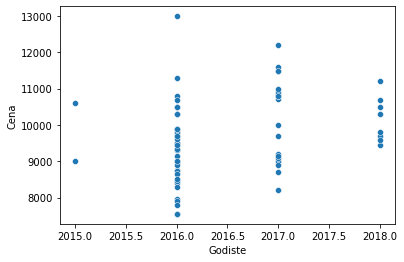

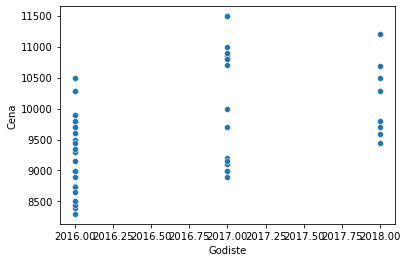

-----------------------------------
Model Auris


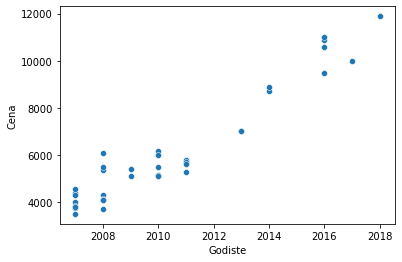

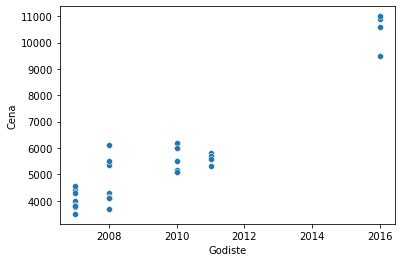

-----------------------------------
Model Avensis


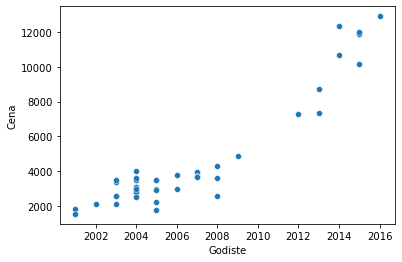

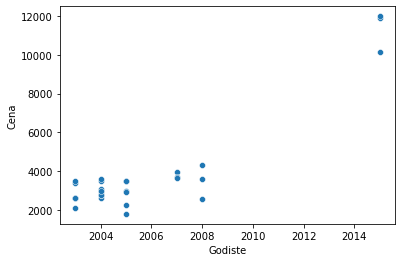

-----------------------------------
Model Aygo


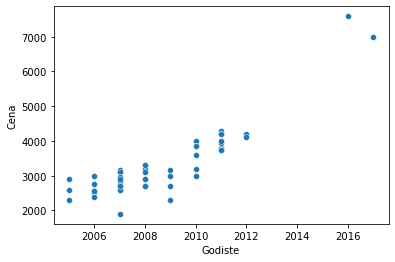

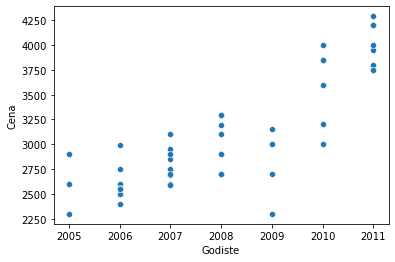

-----------------------------------
Model B 180


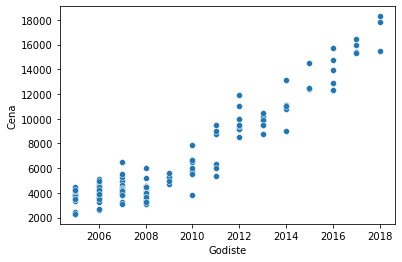

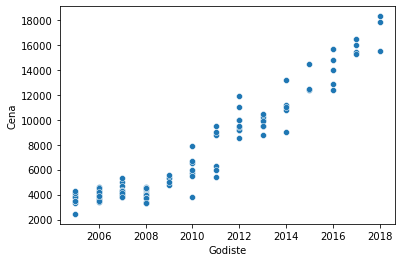

-----------------------------------
Model B 200


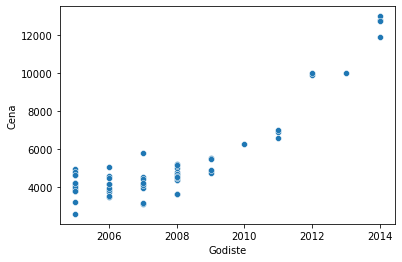

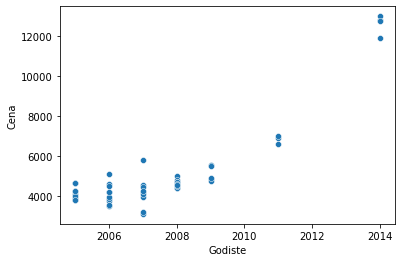

-----------------------------------
Model Berlingo


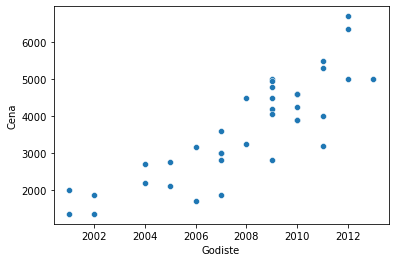

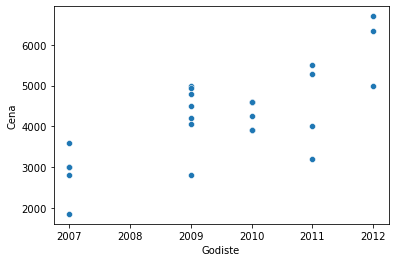

-----------------------------------
Model Bora


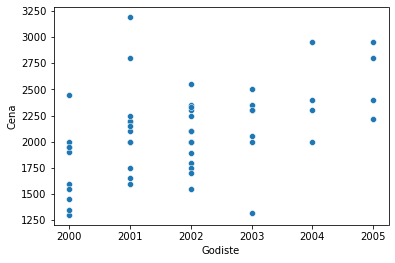

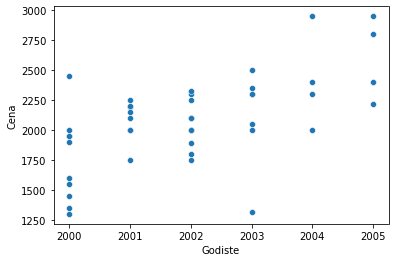

-----------------------------------
Model Bravo


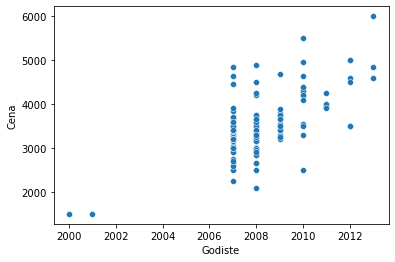

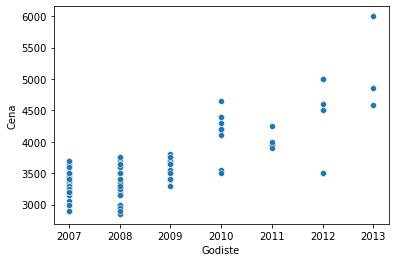

-----------------------------------
Model C 180


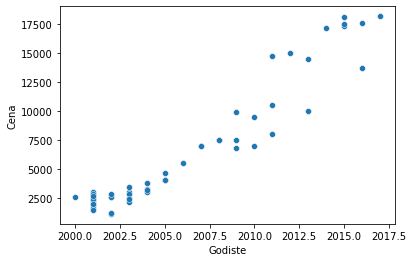

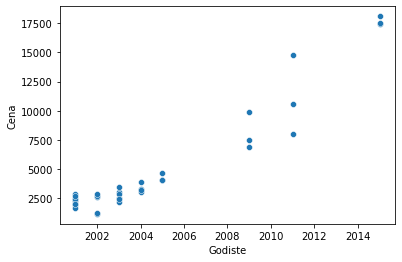

-----------------------------------
Model C 200


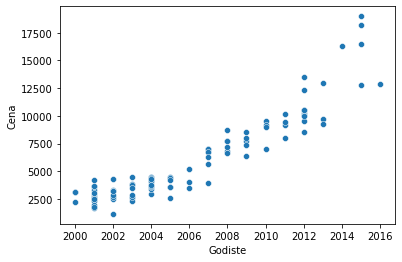

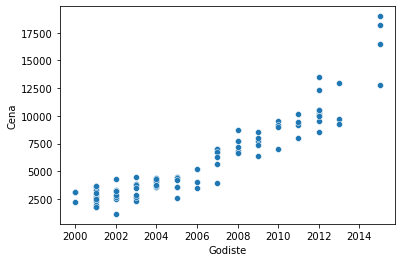

-----------------------------------
Model C 220


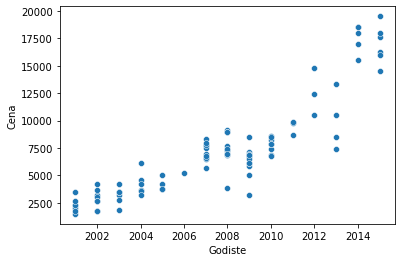

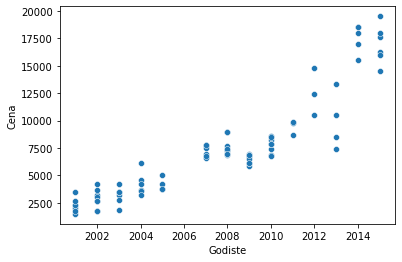

-----------------------------------
Model C-Max


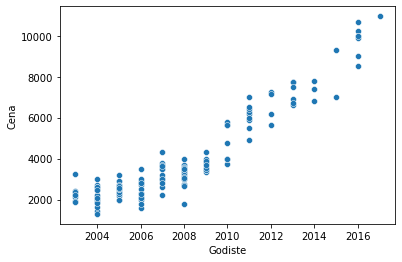

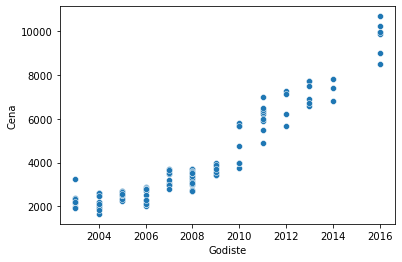

-----------------------------------
Model C1


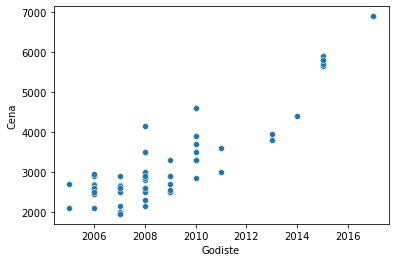

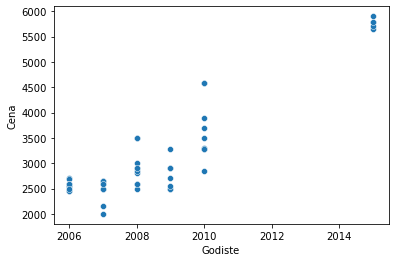

-----------------------------------
Model C2


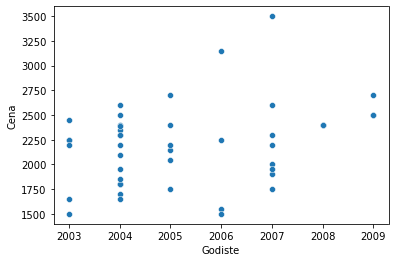

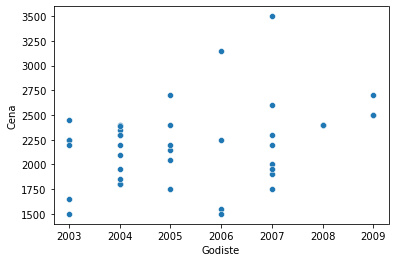

-----------------------------------
Model C3


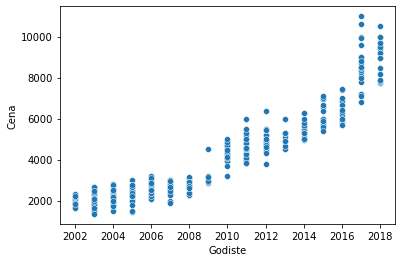

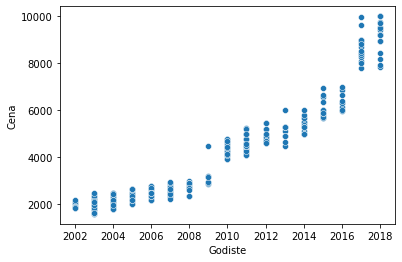

-----------------------------------
Model C3 Picasso


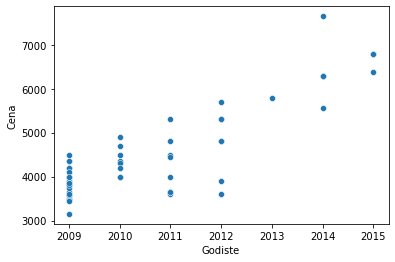

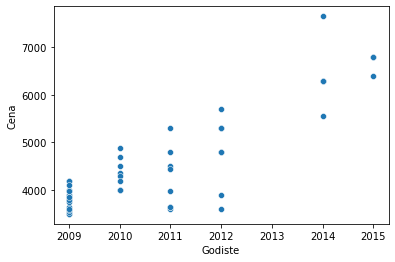

-----------------------------------
Model C4


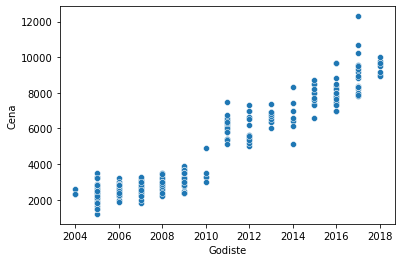

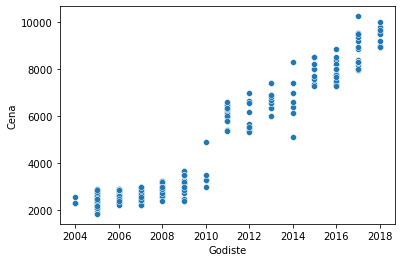

-----------------------------------
Model C4 Grand Picasso


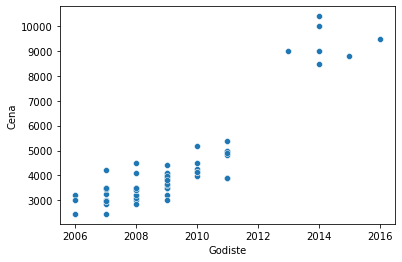

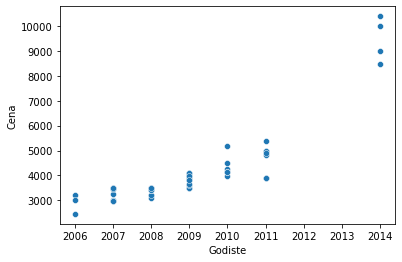

-----------------------------------
Model C4 Picasso


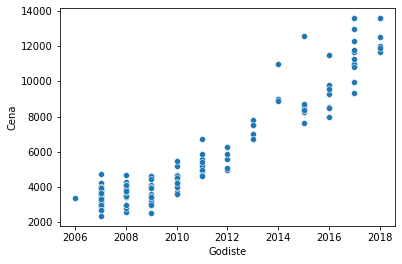

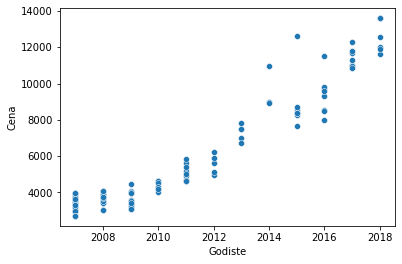

-----------------------------------
Model C5


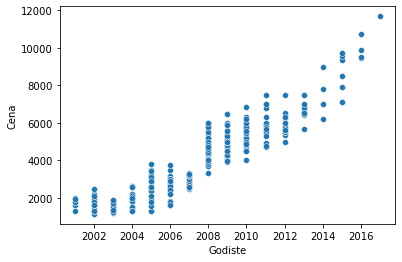

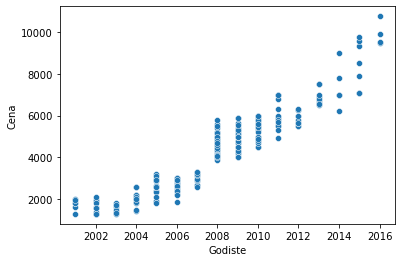

-----------------------------------
Model Caddy


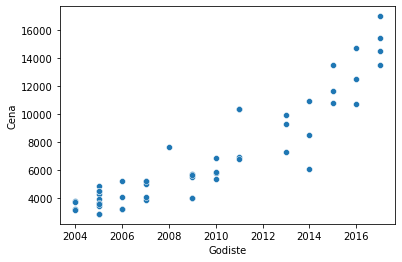

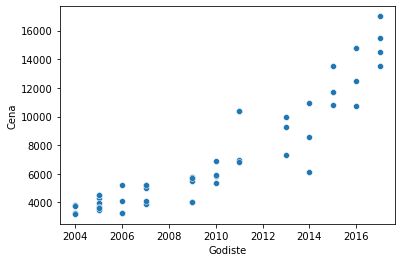

-----------------------------------
Model Captiva


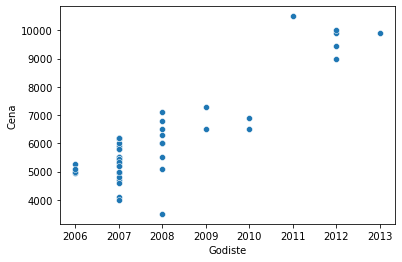

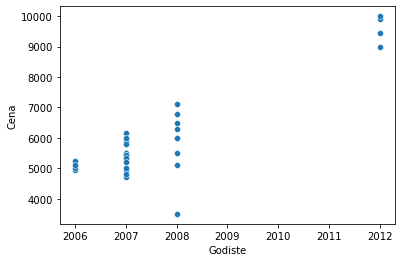

-----------------------------------
Model Captur


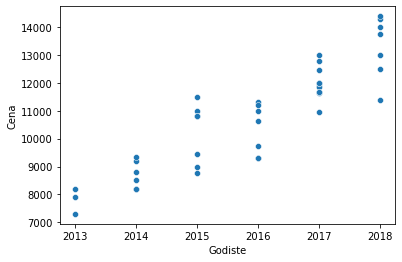

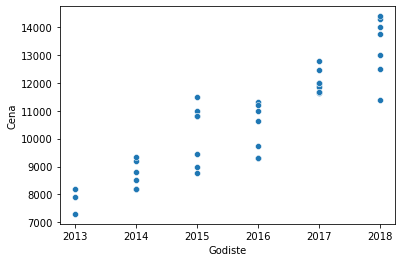

-----------------------------------
Model Civic


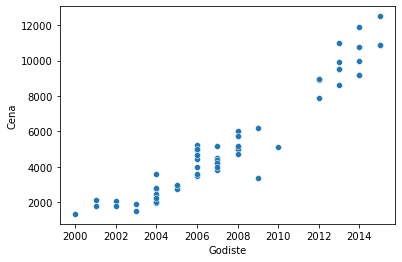

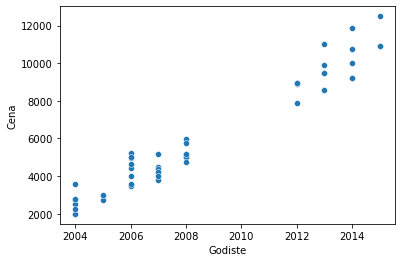

-----------------------------------
Model Clio


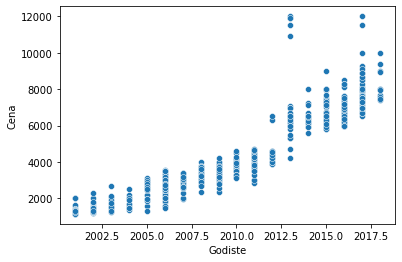

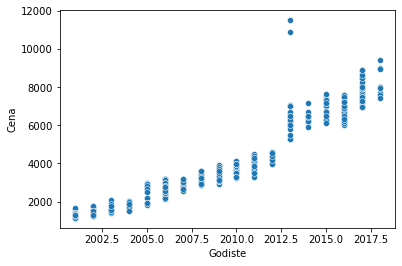

-----------------------------------
Model Colt


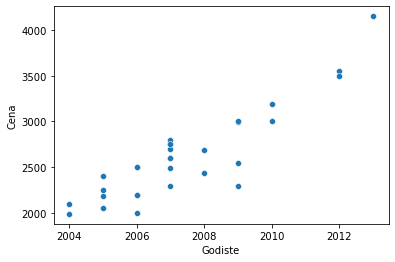

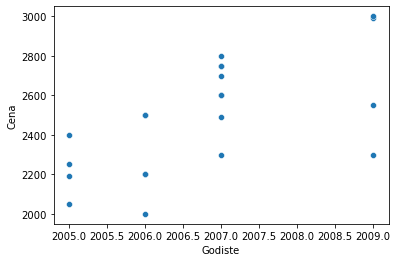

-----------------------------------
Model Cooper


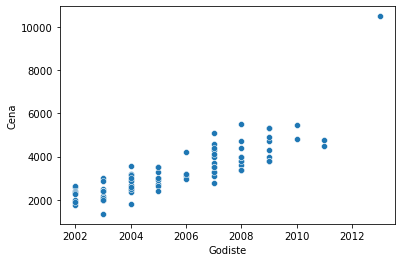

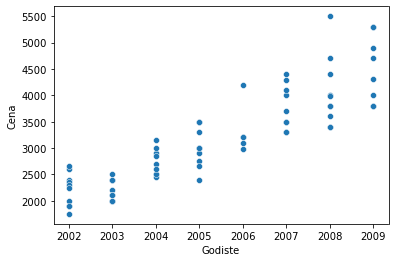

-----------------------------------
Model Corsa C


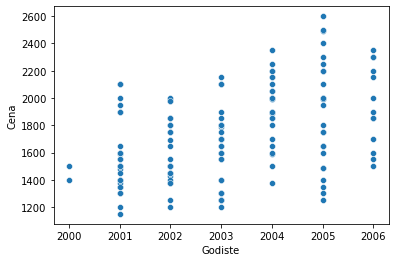

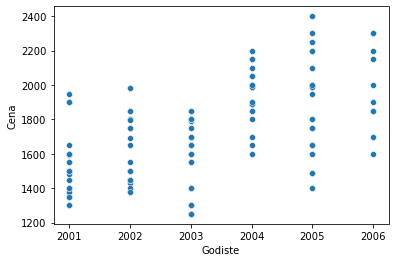

-----------------------------------
Model Corsa D


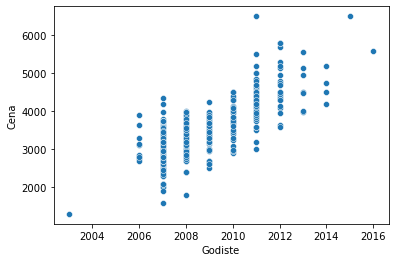

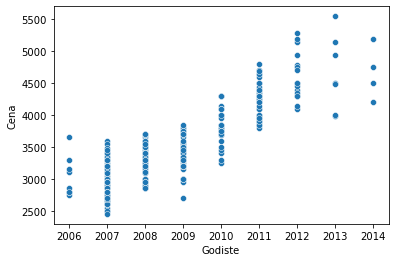

-----------------------------------
Model Corsa E


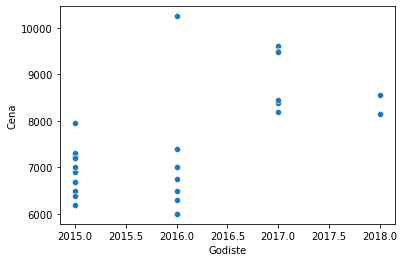

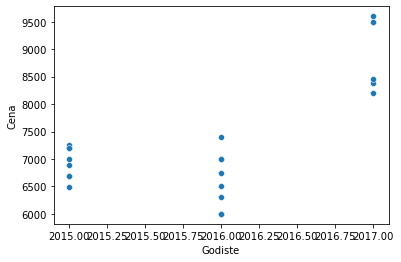

-----------------------------------
Model Croma


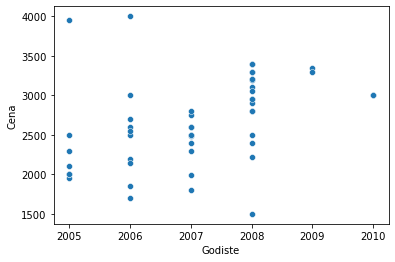

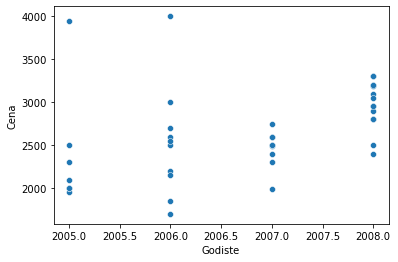

-----------------------------------
Model Cruze


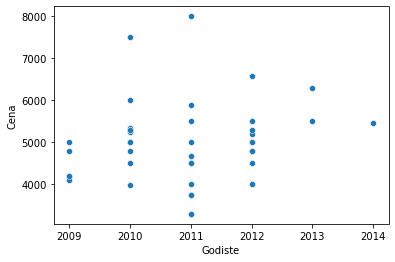

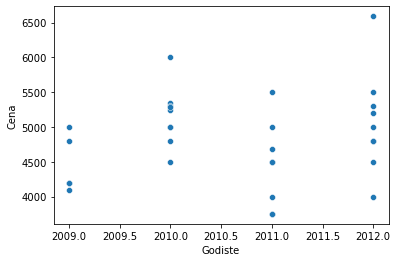

-----------------------------------
Model DS3


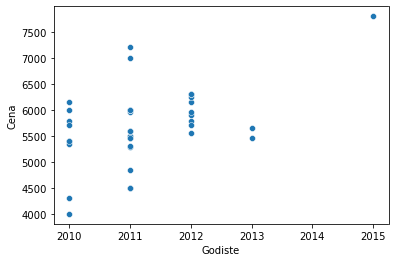

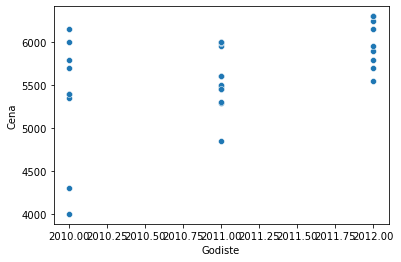

-----------------------------------
Model Delta


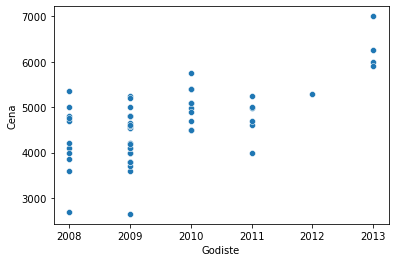

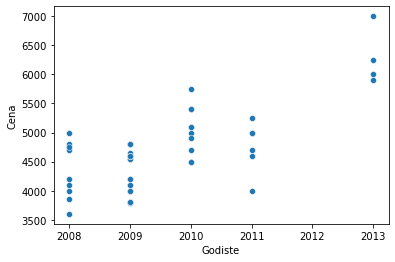

-----------------------------------
Model Doblo


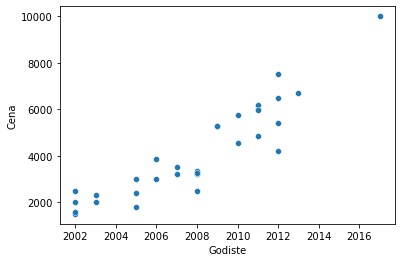

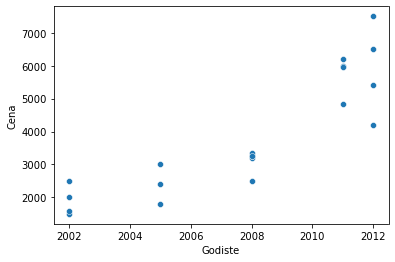

-----------------------------------
Model E 200


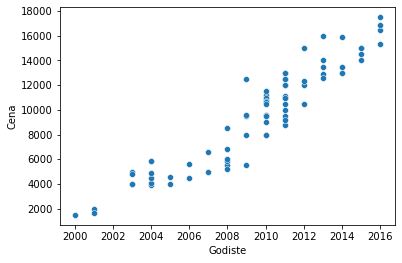

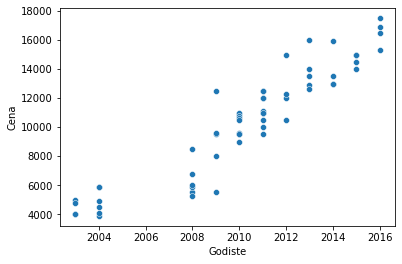

-----------------------------------
Model E 220


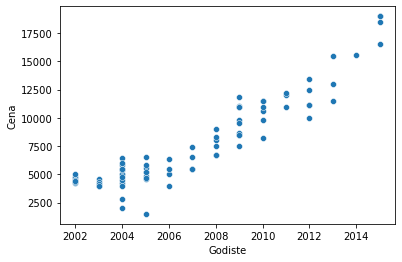

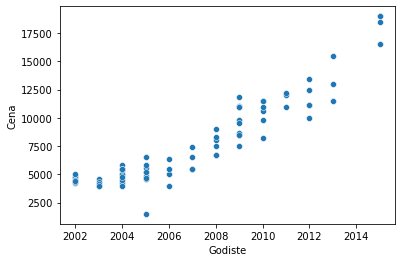

-----------------------------------
Model EVO


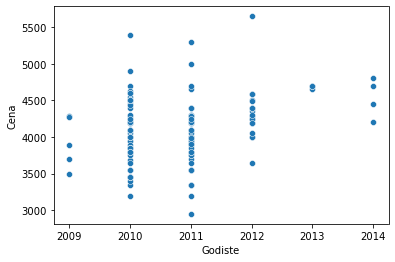

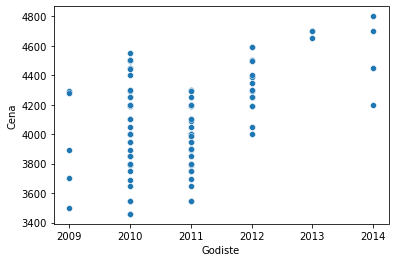

-----------------------------------
Model Espace


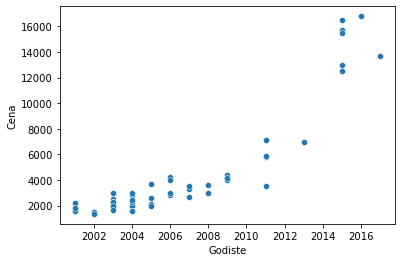

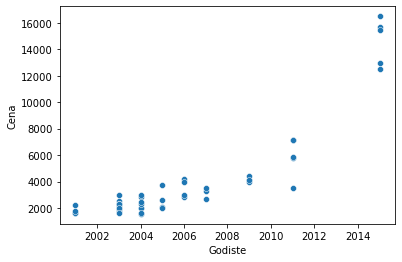

-----------------------------------
Model Fabia


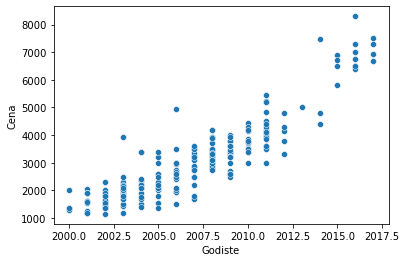

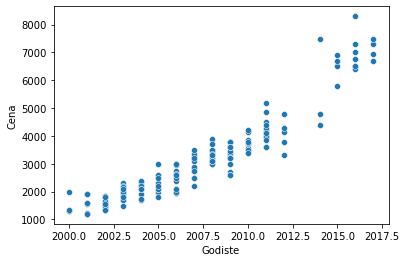

-----------------------------------
Model Fiesta


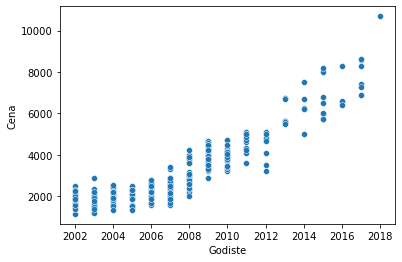

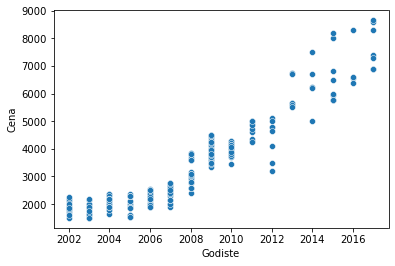

-----------------------------------
Model Focus


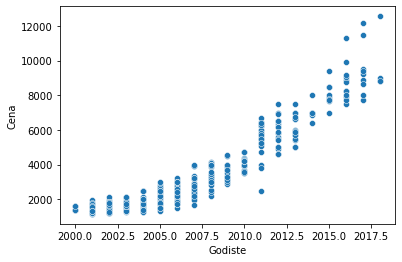

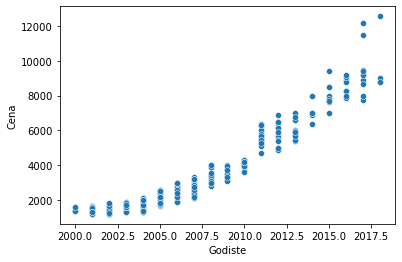

-----------------------------------
Model Fox


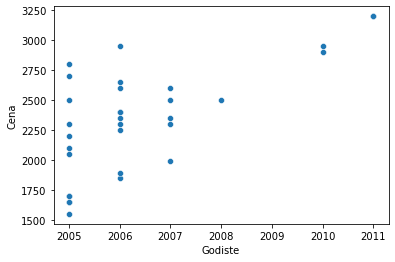

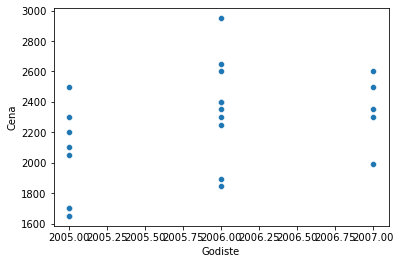

-----------------------------------
Model Fusion


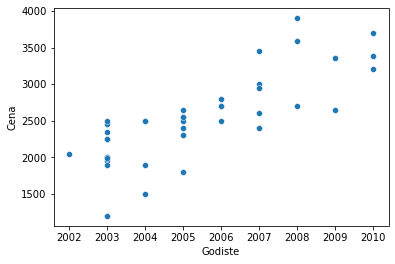

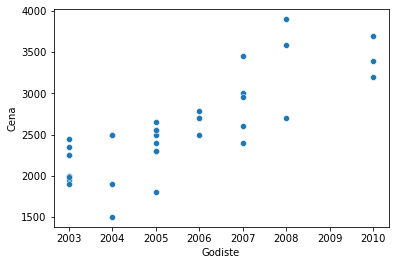

-----------------------------------
Model Galaxy


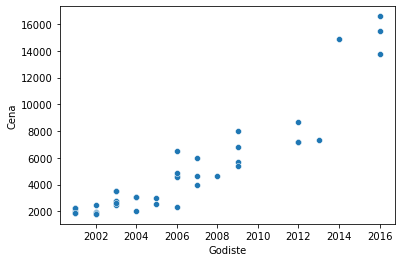

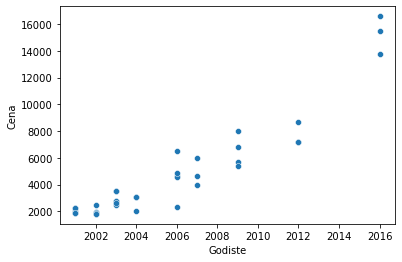

-----------------------------------
Model Giulietta


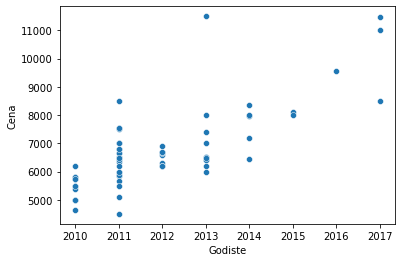

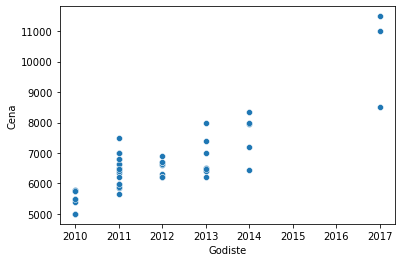

-----------------------------------
Model Golf 4


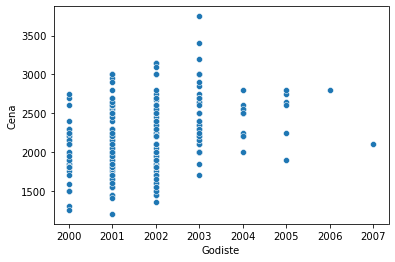

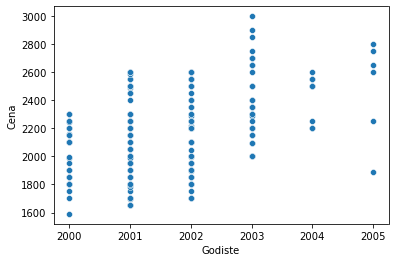

-----------------------------------
Model Golf 5


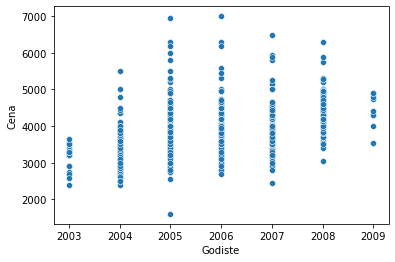

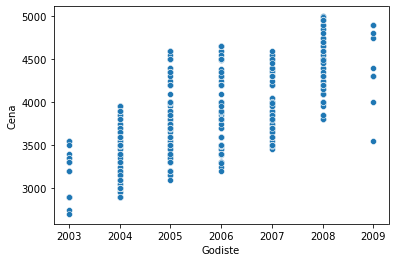

-----------------------------------
Model Golf 6


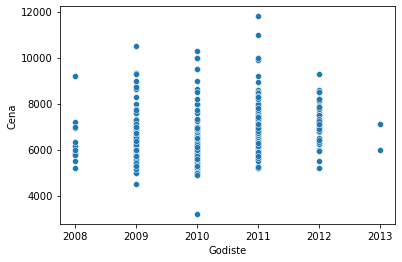

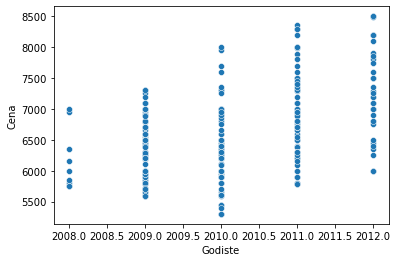

-----------------------------------
Model Golf 7


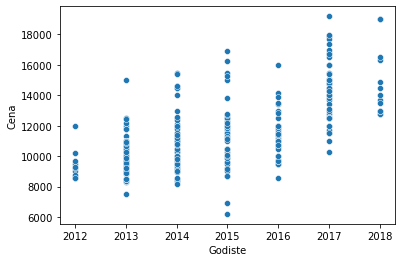

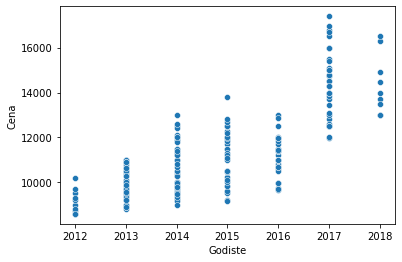

-----------------------------------
Model Golf Plus


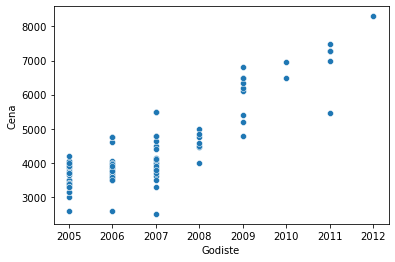

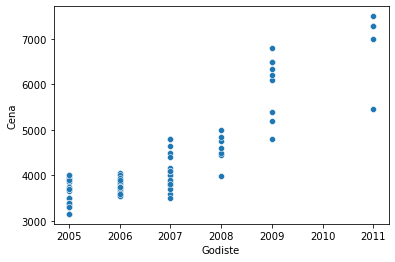

-----------------------------------
Model Grand Scenic


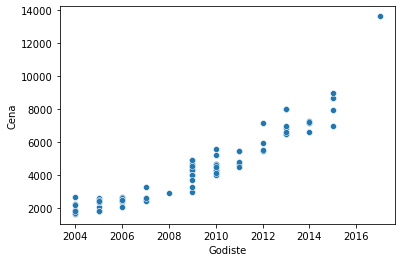

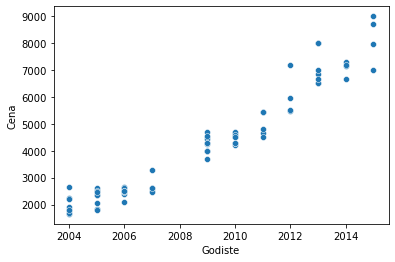

-----------------------------------
Model Grand Vitara


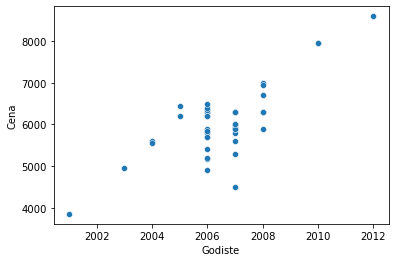

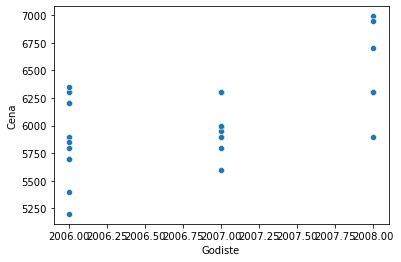

-----------------------------------
Model Grande Punto


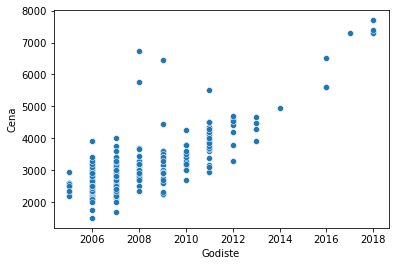

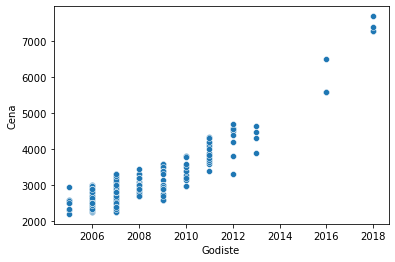

-----------------------------------
Model Ibiza


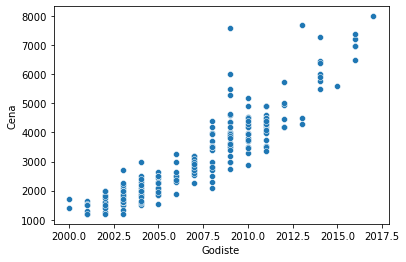

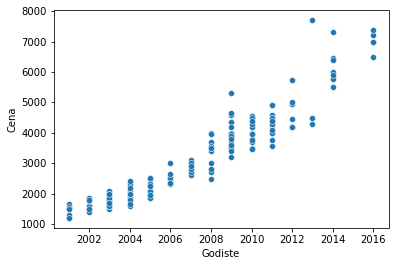

-----------------------------------
Model Idea


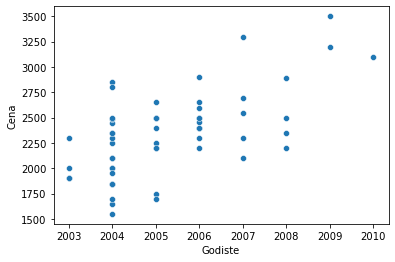

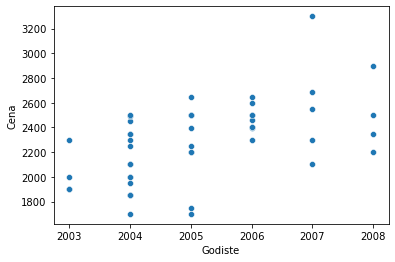

-----------------------------------
Model Insignia


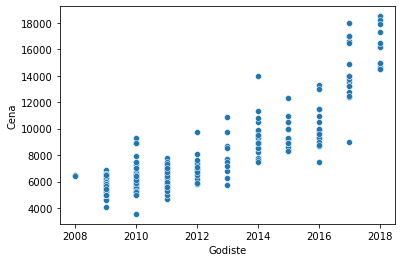

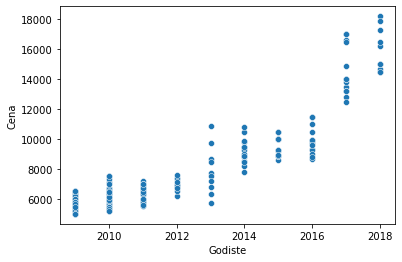

-----------------------------------
Model Jetta


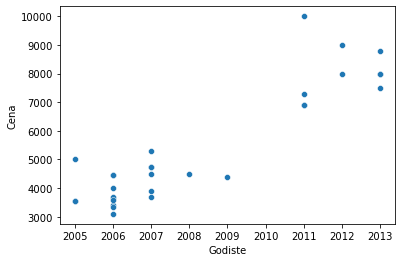

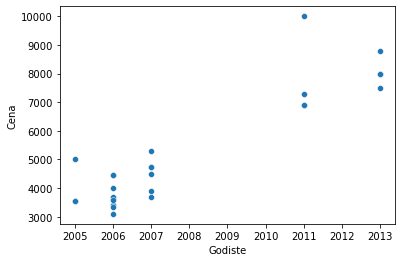

-----------------------------------
Model Juke


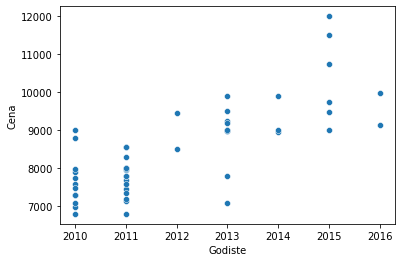

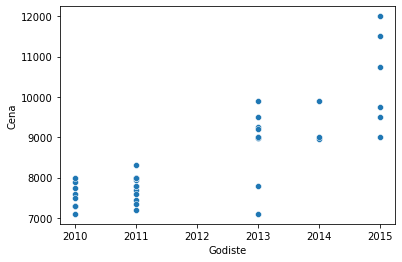

-----------------------------------
Model Ka


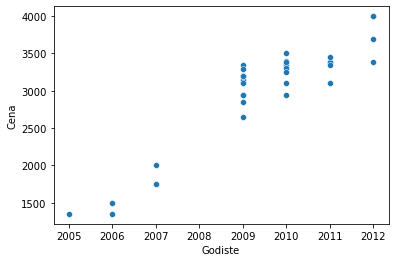

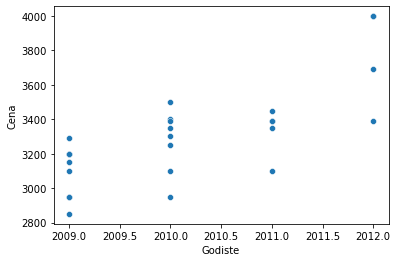

-----------------------------------
Model Kadjar


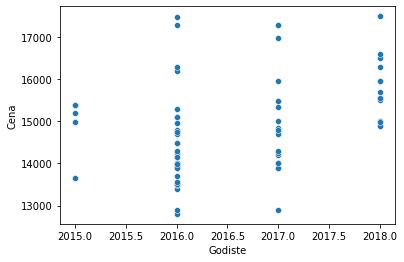

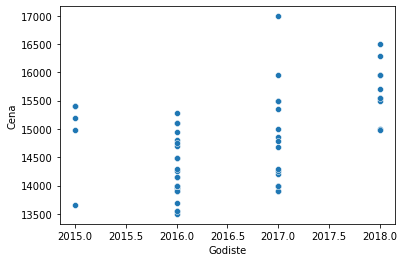

-----------------------------------
Model Kangoo


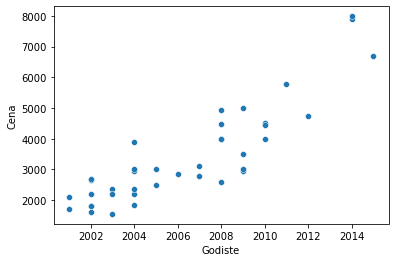

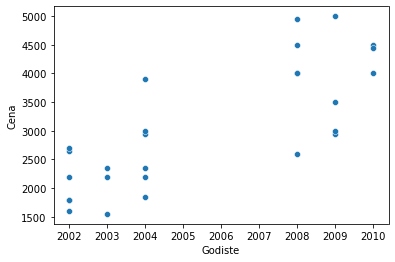

-----------------------------------
Model Kuga


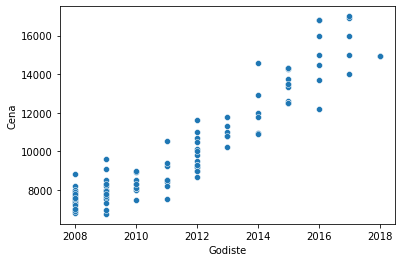

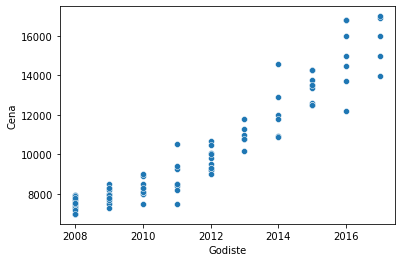

-----------------------------------
Model Laguna


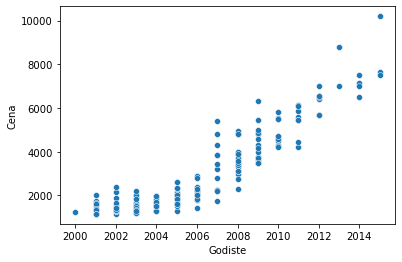

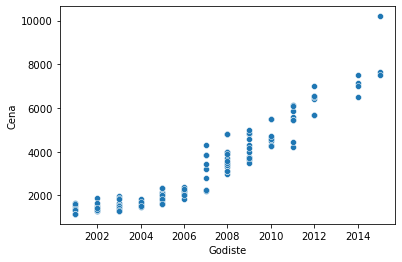

-----------------------------------
Model Leon


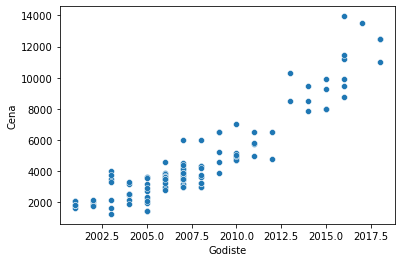

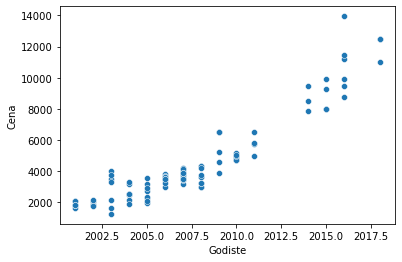

-----------------------------------
Model Logan


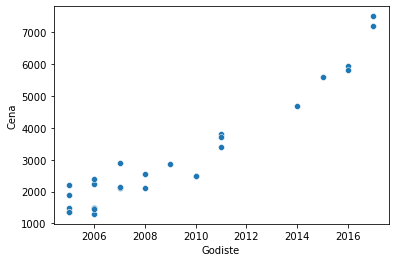

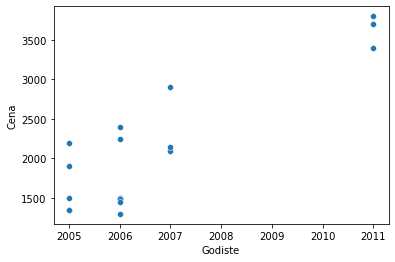

-----------------------------------
Model Megane


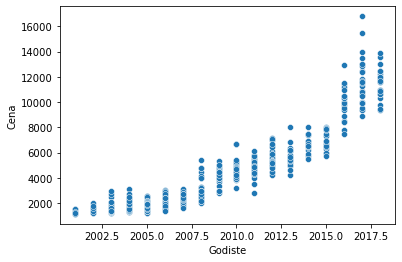

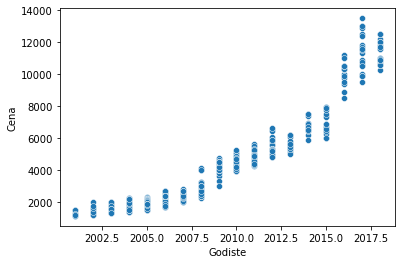

-----------------------------------
Model Meriva


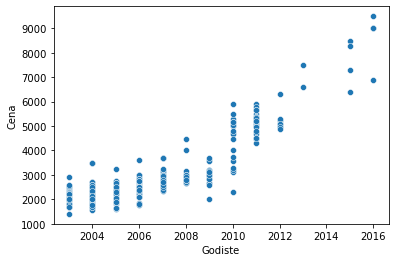

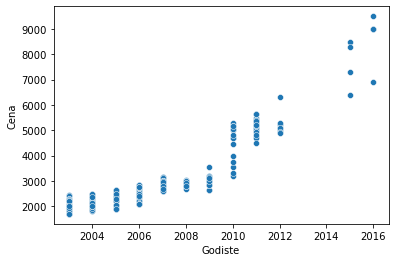

-----------------------------------
Model MiTo


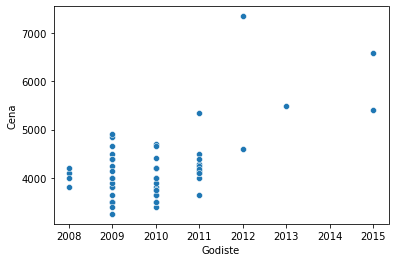

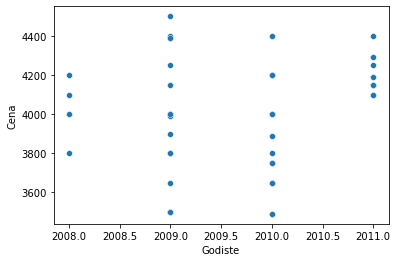

-----------------------------------
Model Micra


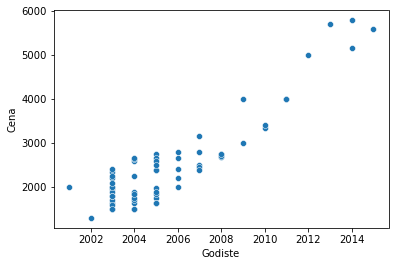

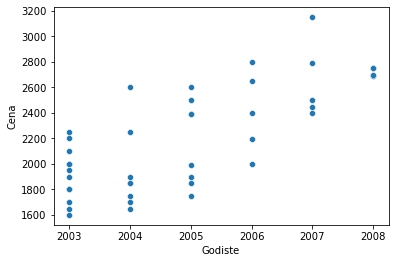

-----------------------------------
Model Modus


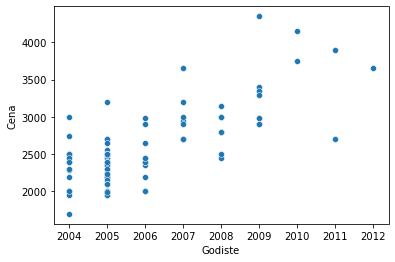

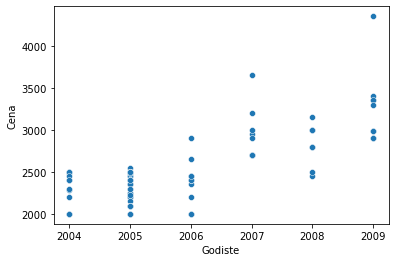

-----------------------------------
Model Mondeo


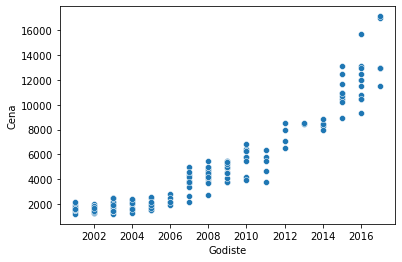

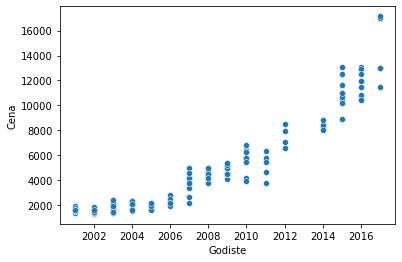

-----------------------------------
Model Musa


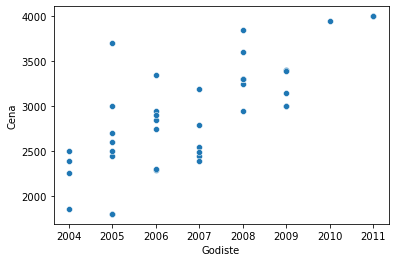

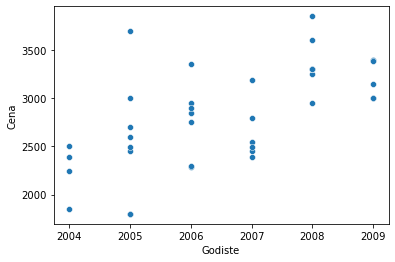

-----------------------------------
Model Note


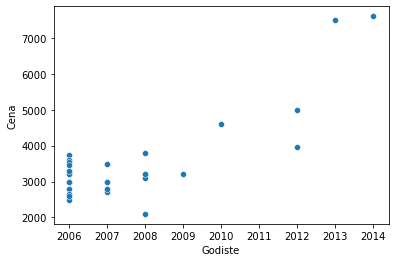

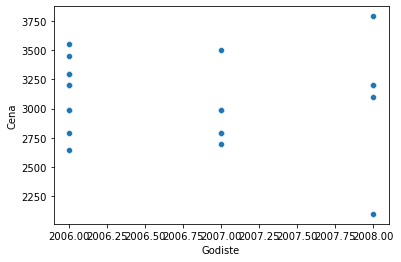

-----------------------------------
Model Octavia


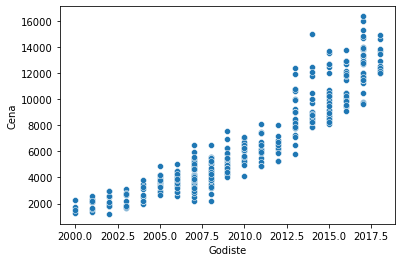

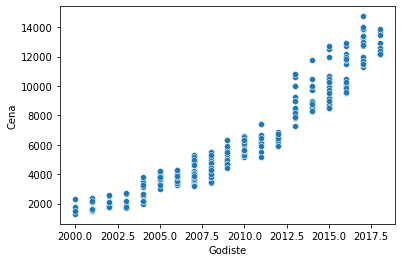

-----------------------------------
Model One


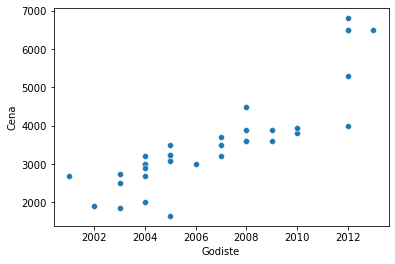

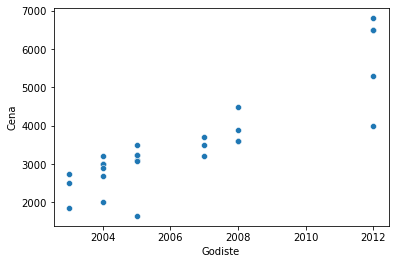

-----------------------------------
Model Outlander


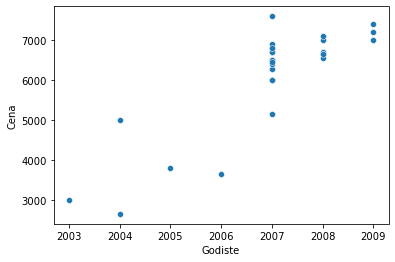

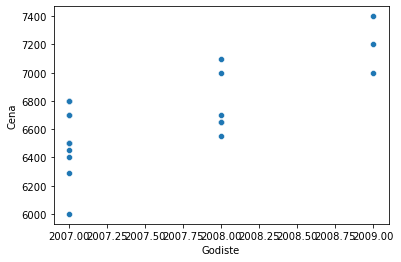

-----------------------------------
Model Panda


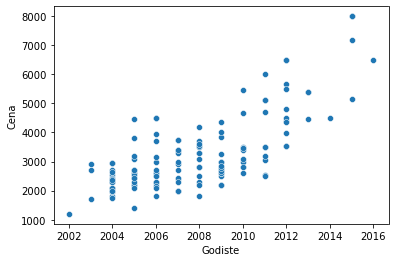

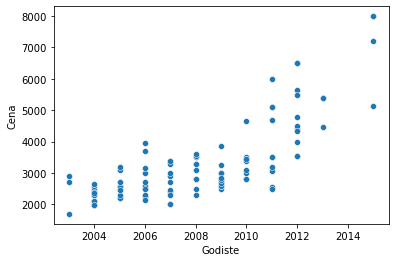

-----------------------------------
Model Passat B5.5


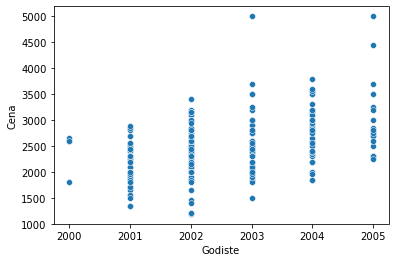

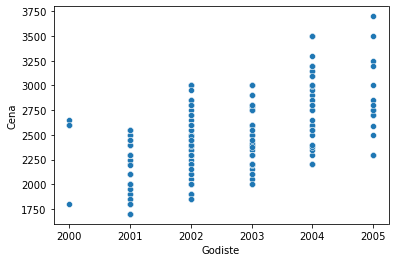

-----------------------------------
Model Passat B6


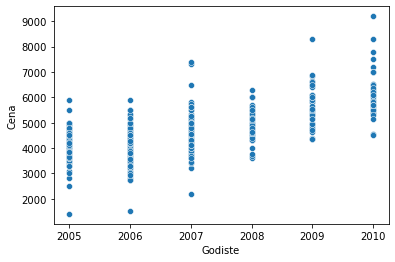

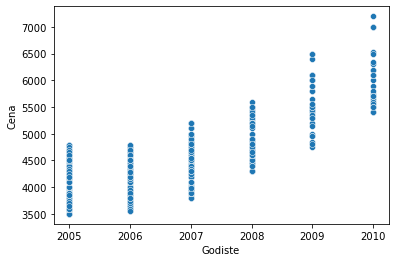

-----------------------------------
Model Passat B7


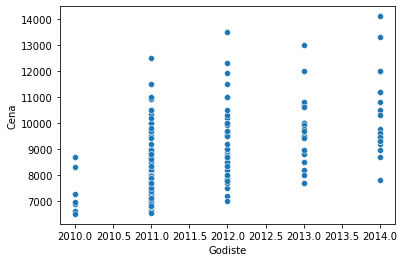

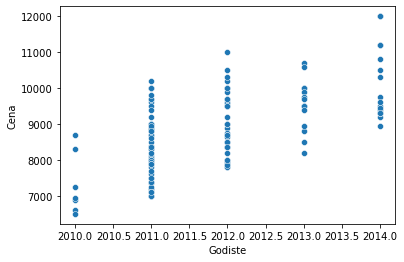

-----------------------------------
Model Passat B8


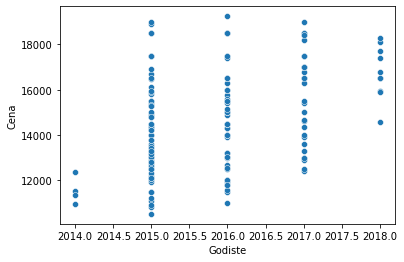

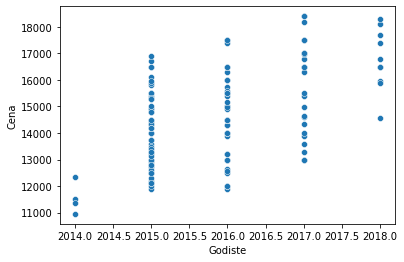

-----------------------------------
Model Passat CC


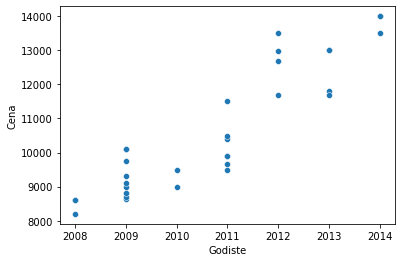

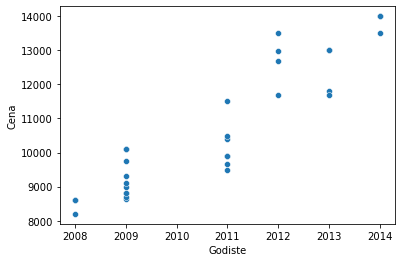

-----------------------------------
Model Polo


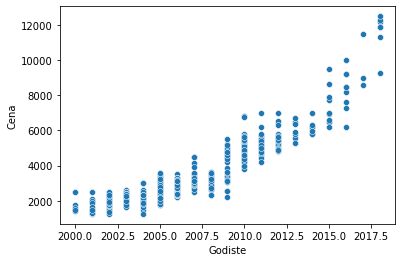

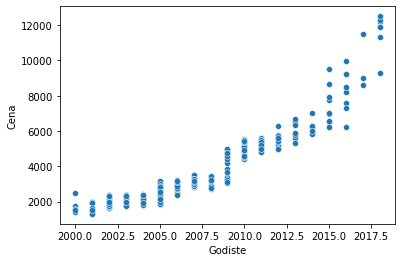

-----------------------------------
Model Punto


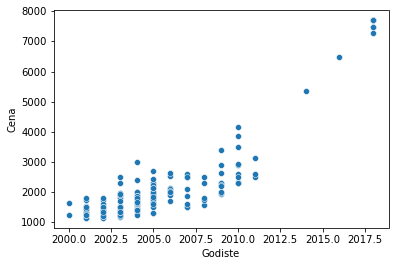

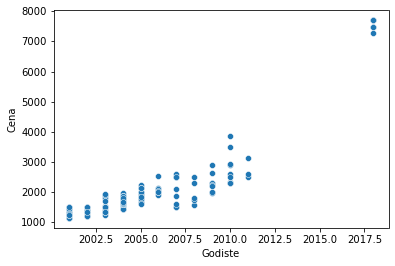

-----------------------------------
Model Q3


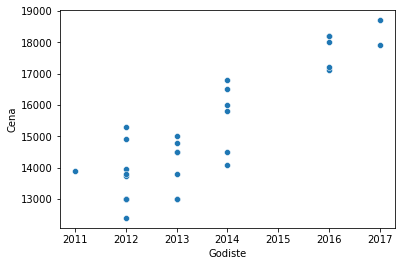

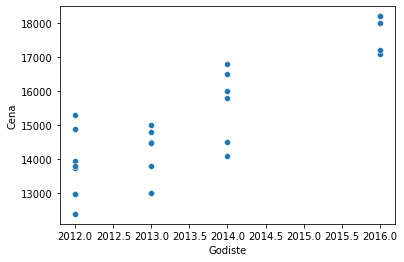

-----------------------------------
Model Q5


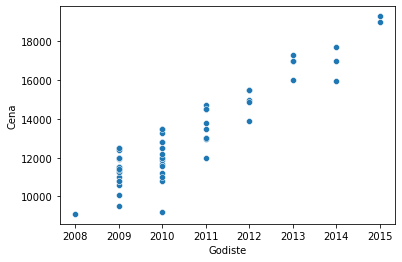

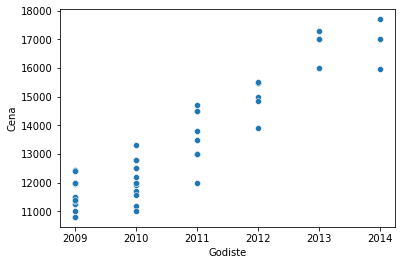

-----------------------------------
Model Qashqai


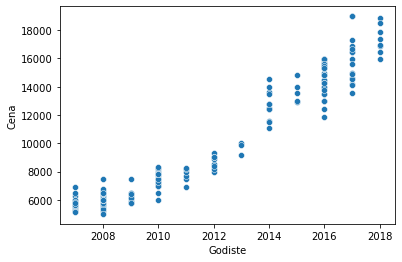

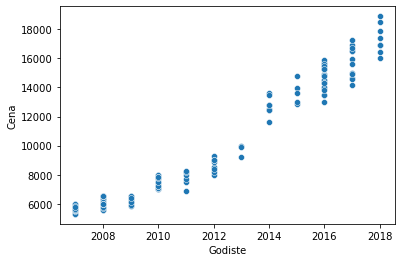

-----------------------------------
Model RAV 4


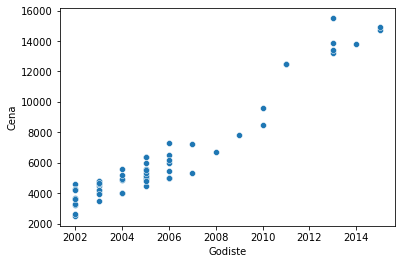

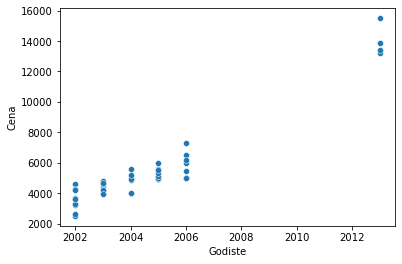

-----------------------------------
Model Roomster


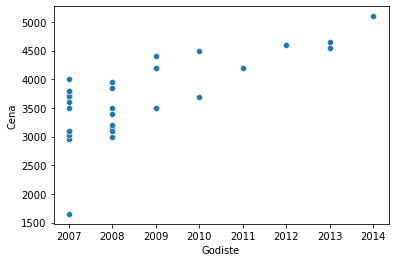

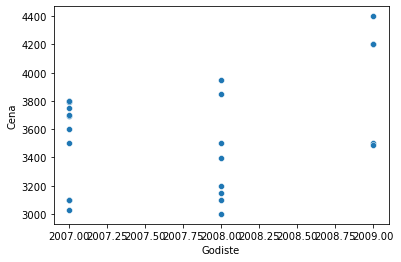

-----------------------------------
Model Santa Fe


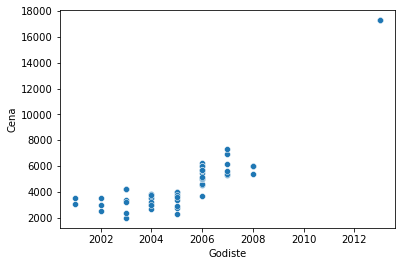

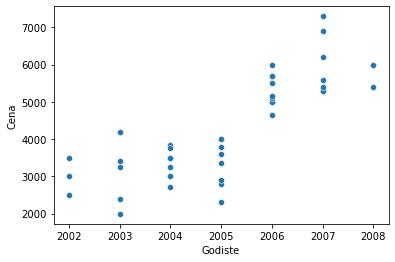

-----------------------------------
Model Scenic


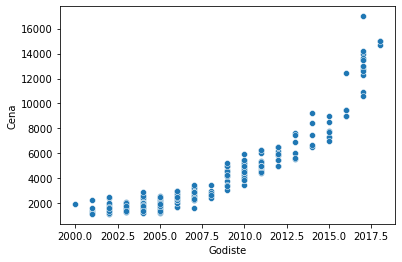

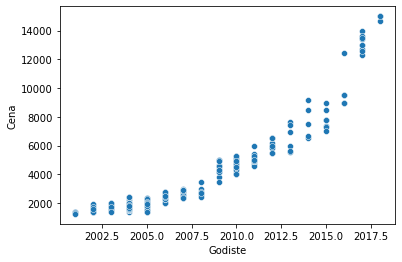

-----------------------------------
Model Sharan


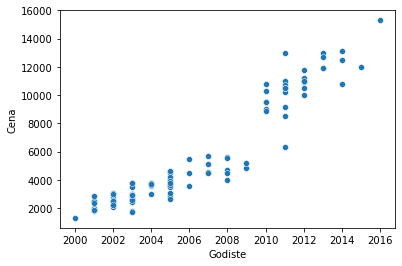

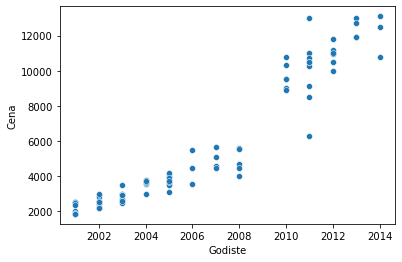

-----------------------------------
Model Sorento


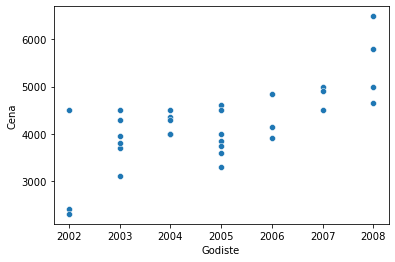

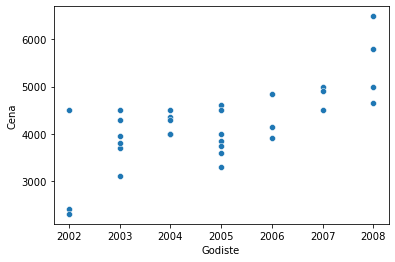

-----------------------------------
Model Sportage


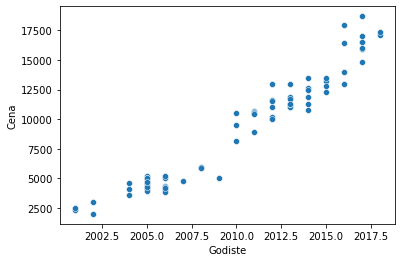

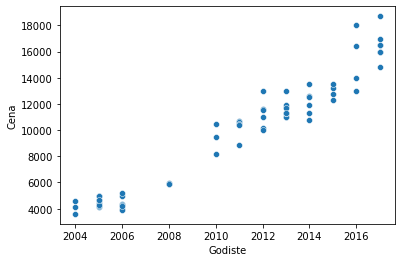

-----------------------------------
Model Stilo


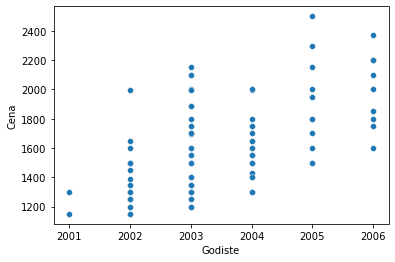

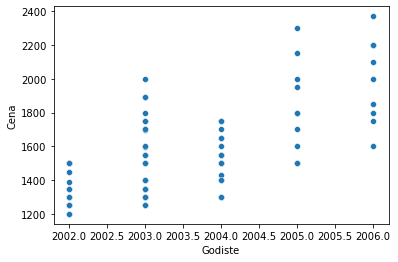

-----------------------------------
Model Superb


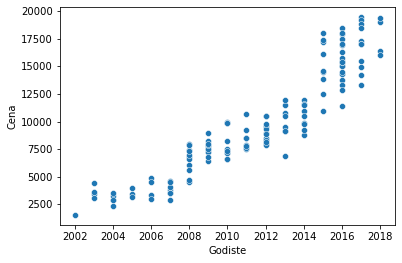

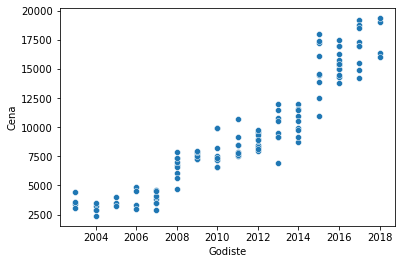

-----------------------------------
Model Swift


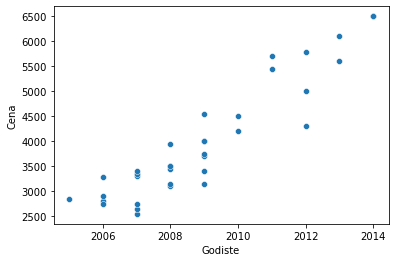

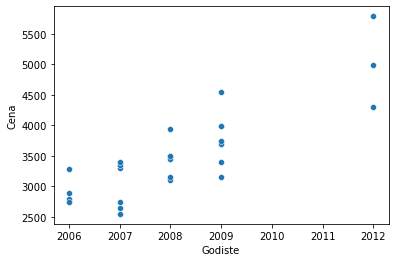

-----------------------------------
Model Talisman


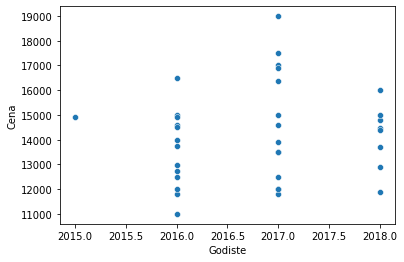

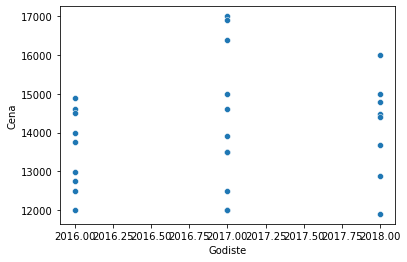

-----------------------------------
Model Tiguan


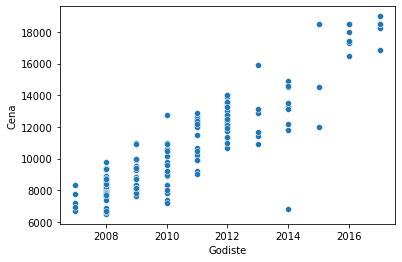

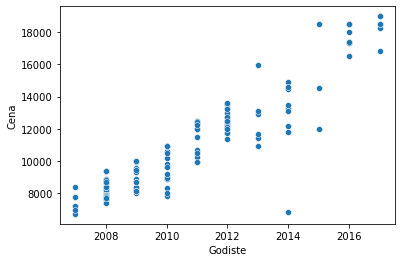

-----------------------------------
Model Touareg


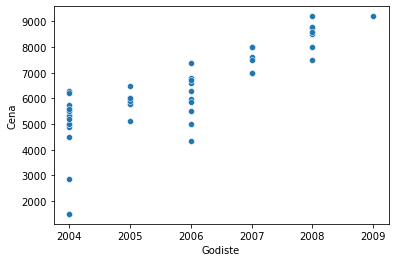

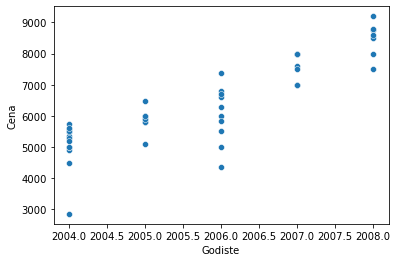

-----------------------------------
Model Touran


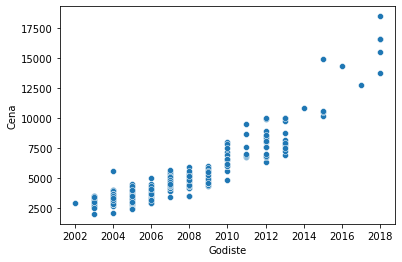

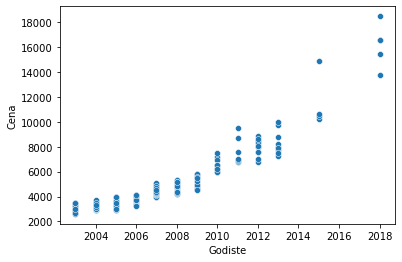

-----------------------------------
Model Tucson


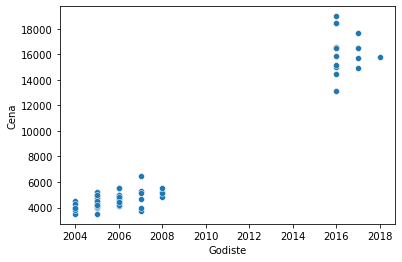

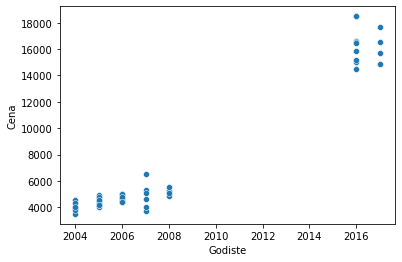

-----------------------------------
Model Twingo


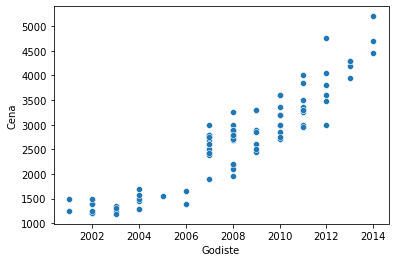

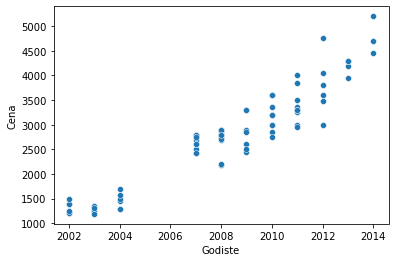

-----------------------------------
Model V40


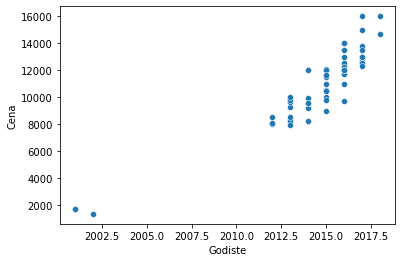

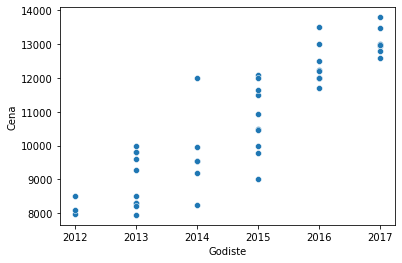

-----------------------------------
Model V50


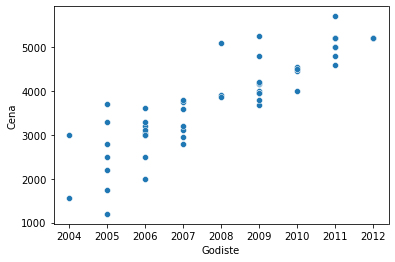

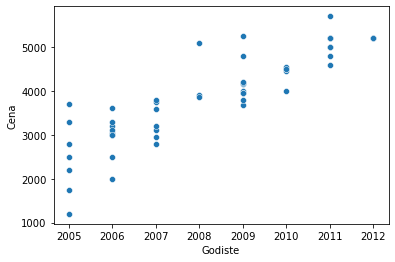

-----------------------------------
Model Vectra C


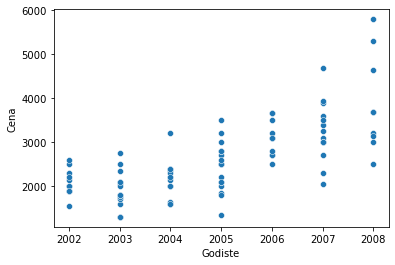

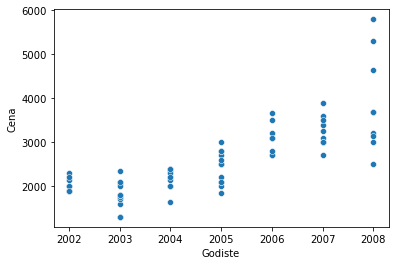

-----------------------------------
Model X-Trail


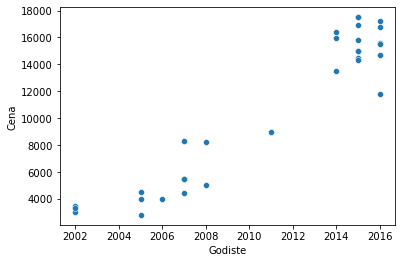

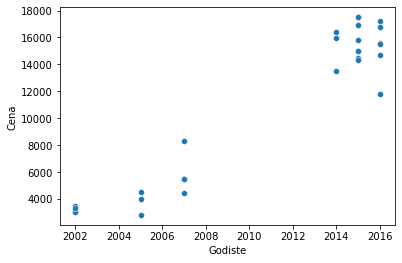

-----------------------------------
Model X1


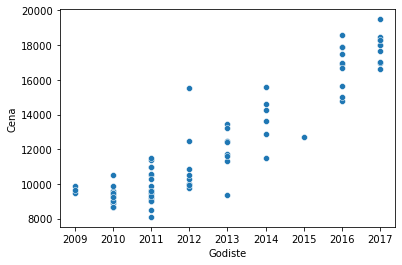

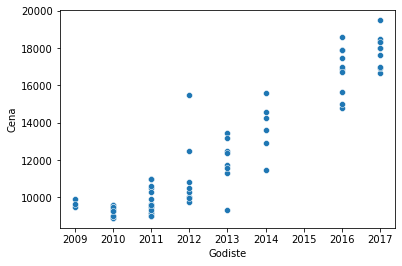

-----------------------------------
Model X3


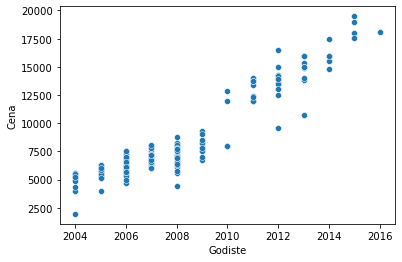

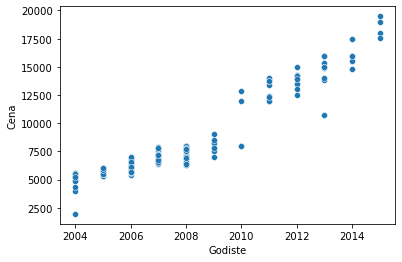

-----------------------------------
Model Xsara Picasso


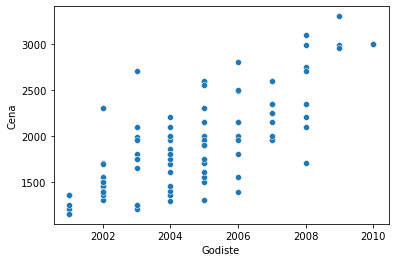

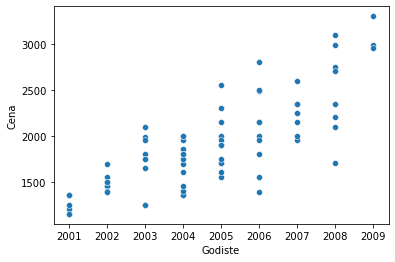

-----------------------------------
Model Yaris


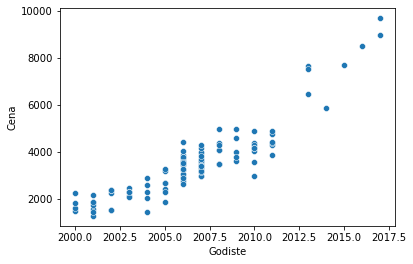

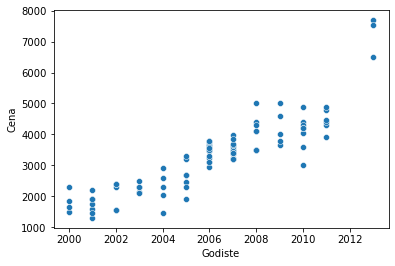

-----------------------------------
Model Ypsilon


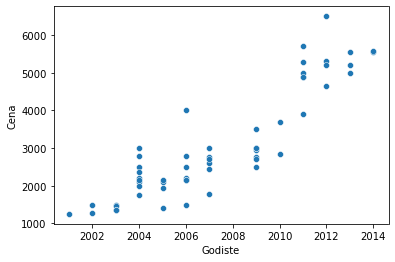

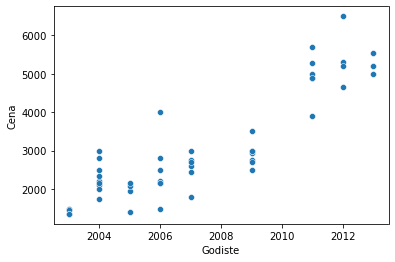

-----------------------------------
Model Zafira


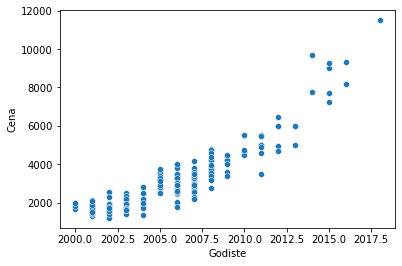

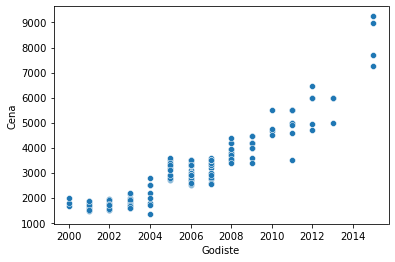

In [312]:
for model in df['Model'].unique():
    
    if int(df[df['Model']==model].count()[0])>=30:
        print('-'*35)
        print('Model {}'.format(model))
        sns.scatterplot('Godiste', 'Cena', data=df[df['Model']==model])
        plt.show()

        for year in range(df[df['Model']==model]['Godiste'].min(), df[df['Model']==model]['Godiste'].max()+1):
            if df[(df['Model']==model) & (df['Godiste']==year)].count()[0]>10:
                upper = df[(df['Model']==model) & (df['Godiste']==year)]['Cena'].quantile(0.90)
                lower = df[(df['Model']==model) & (df['Godiste']==year)]['Cena'].quantile(0.10)
                df.drop(df[(df['Model']==model) & (df['Godiste']==year) & (df['Cena']>upper)].index, inplace=True)
                df.drop(df[(df['Model']==model) & (df['Godiste']==year) & (df['Cena']< lower)].index, inplace=True)
            if df[(df['Model']==model) & (df['Godiste']==year)].count()[0]<3:
                df.drop(df[(df['Model']==model) & (df['Godiste']==year)].index, inplace=True)
 
        sns.scatterplot('Godiste', 'Cena', data=df[df['Model']==model])
        plt.show()
    

-----------------------------------
Model 107


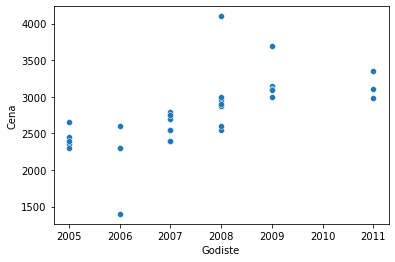

-----------------------------------
Model 116


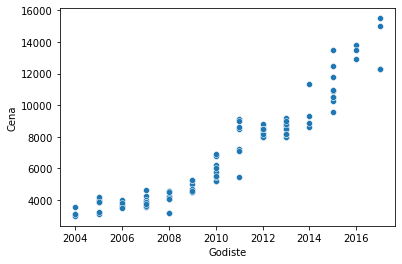

-----------------------------------
Model 118


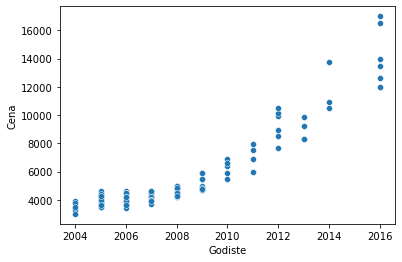

-----------------------------------
Model 120


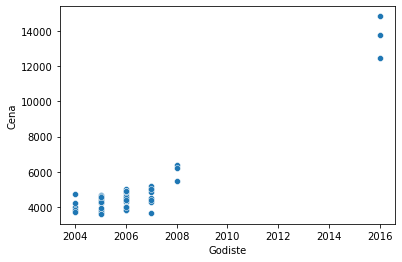

-----------------------------------
Model 147


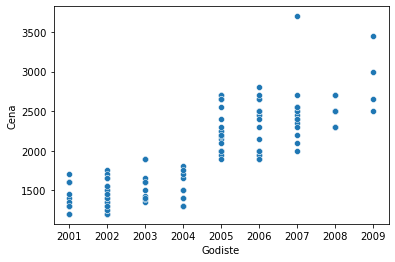

-----------------------------------
Model 156


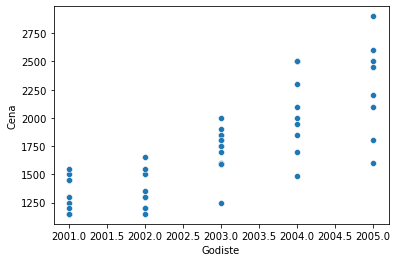

-----------------------------------
Model 159


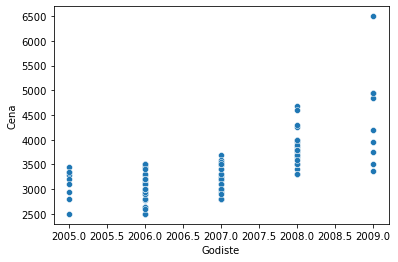

-----------------------------------
Model 2


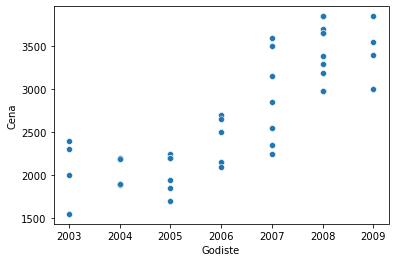

-----------------------------------
Model 2008


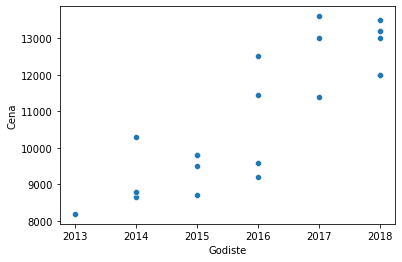

-----------------------------------
Model 206


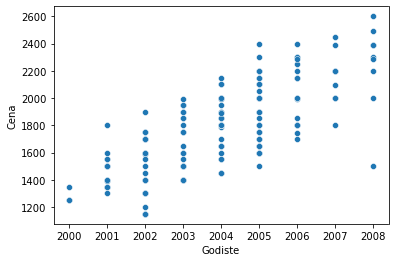

-----------------------------------
Model 207


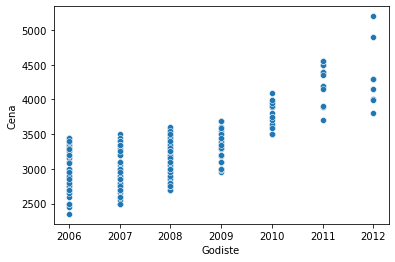

-----------------------------------
Model 208


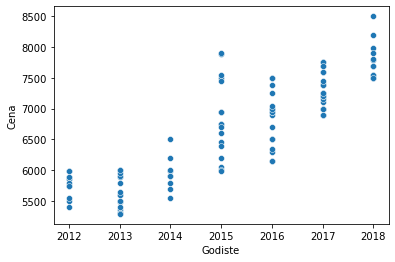

-----------------------------------
Model 3


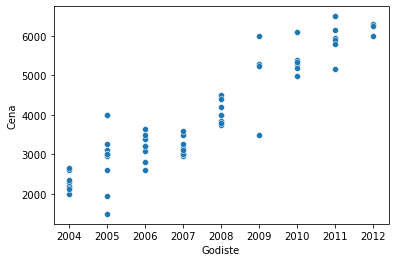

-----------------------------------
Model 3008


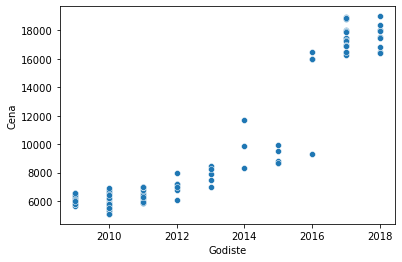

-----------------------------------
Model 307


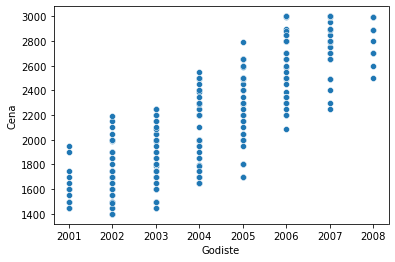

-----------------------------------
Model 308


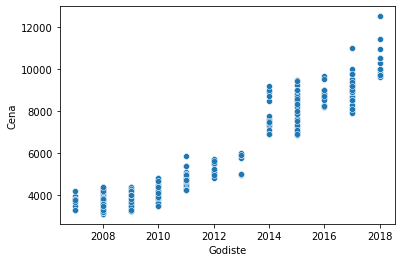

-----------------------------------
Model 316


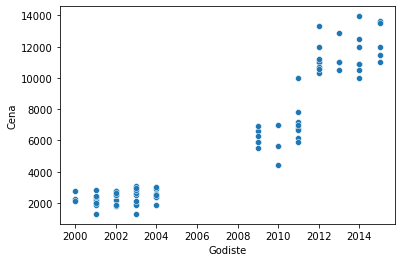

-----------------------------------
Model 318


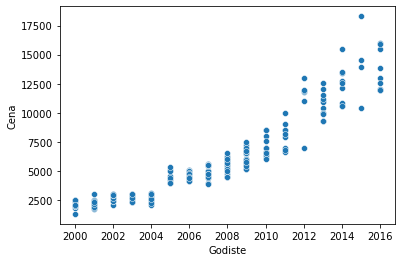

-----------------------------------
Model 320


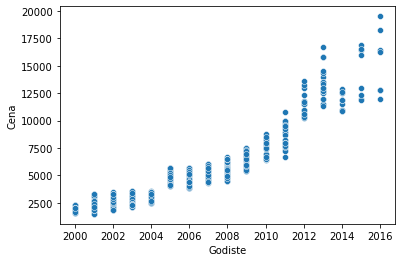

-----------------------------------
Model 406


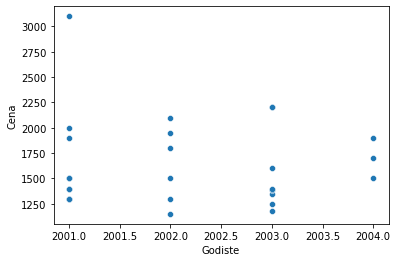

-----------------------------------
Model 407


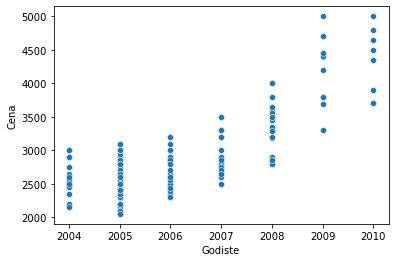

-----------------------------------
Model 5


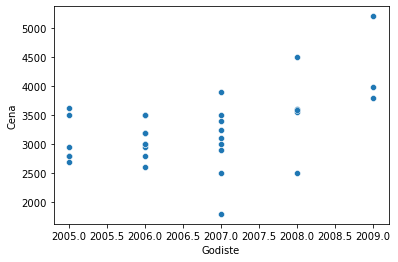

-----------------------------------
Model 500


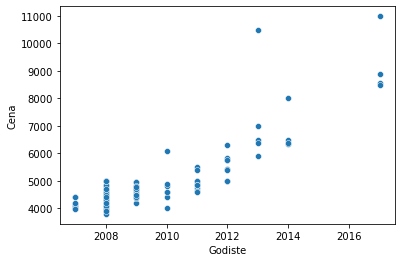

-----------------------------------
Model 5008


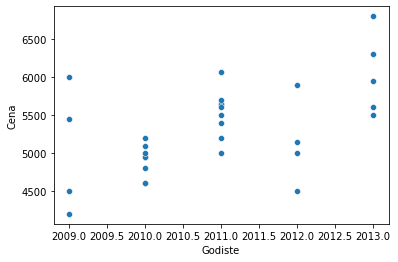

-----------------------------------
Model 500L


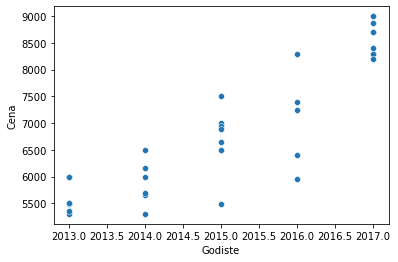

-----------------------------------
Model 508


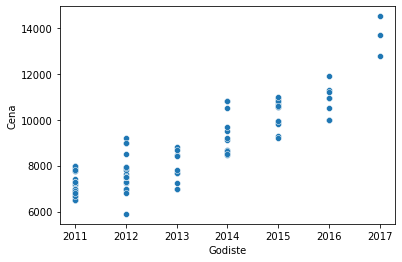

-----------------------------------
Model 520


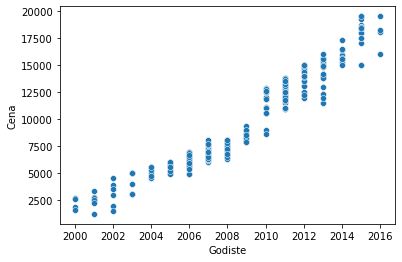

-----------------------------------
Model 525


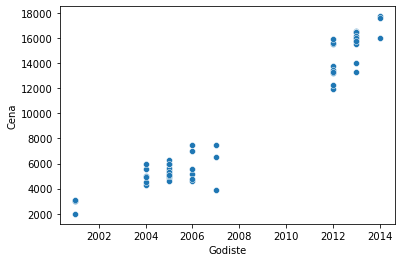

-----------------------------------
Model 6


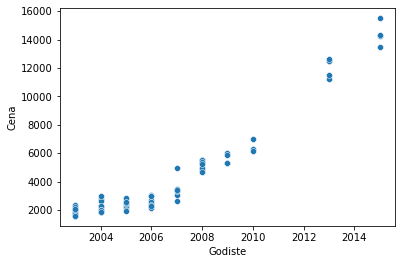

-----------------------------------
Model A 150


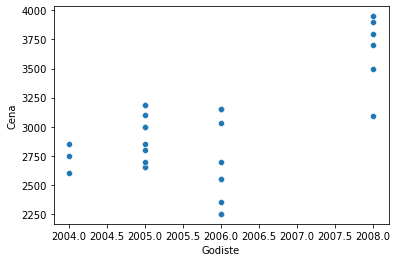

-----------------------------------
Model A 160


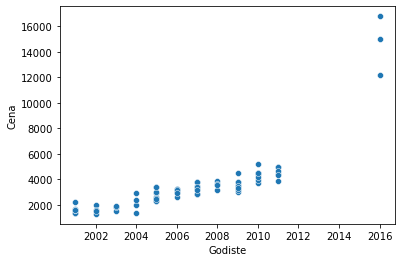

-----------------------------------
Model A 170


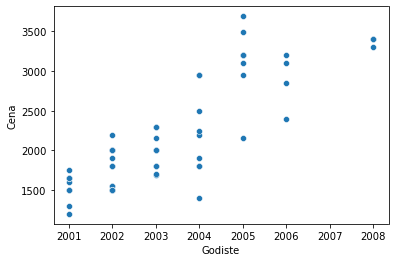

-----------------------------------
Model A 180


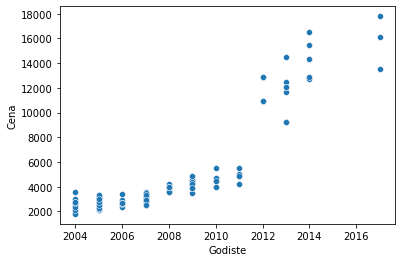

-----------------------------------
Model A2


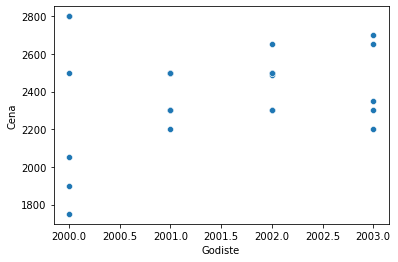

-----------------------------------
Model A3


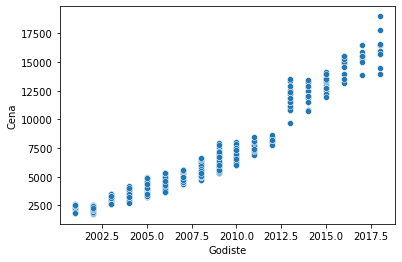

-----------------------------------
Model A4


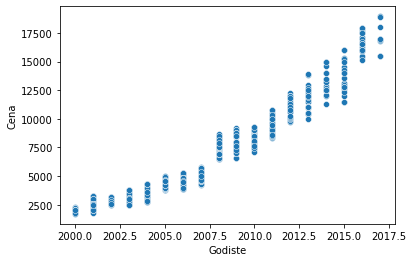

-----------------------------------
Model A5


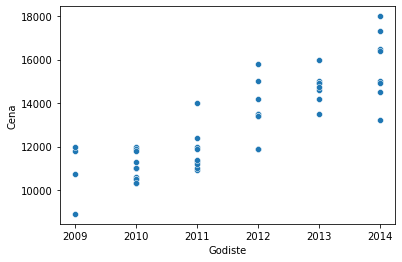

-----------------------------------
Model A6


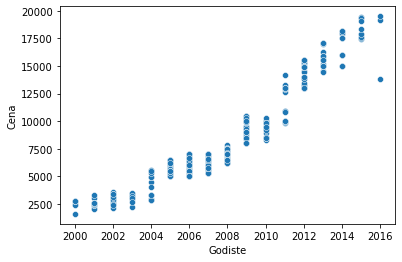

-----------------------------------
Model Accord


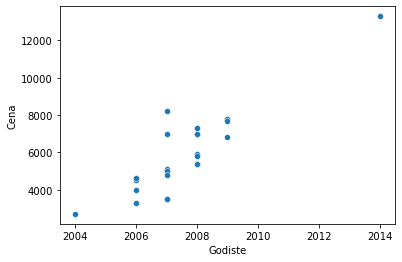

-----------------------------------
Model Agila


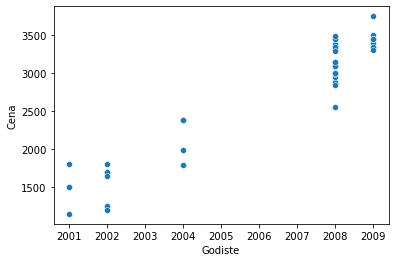

-----------------------------------
Model Alhambra


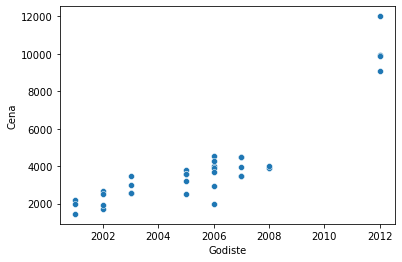

-----------------------------------
Model Altea


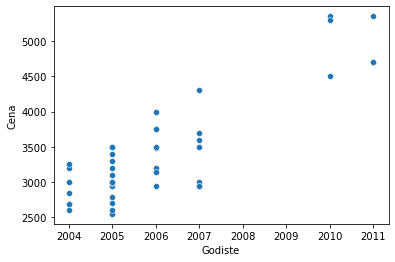

-----------------------------------
Model Antara


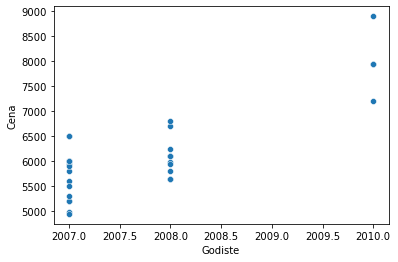

-----------------------------------
Model Astra G


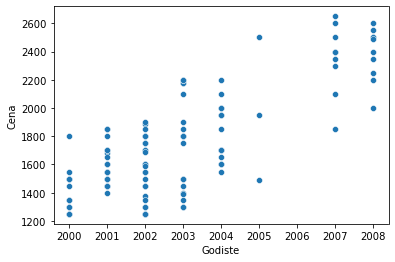

-----------------------------------
Model Astra H


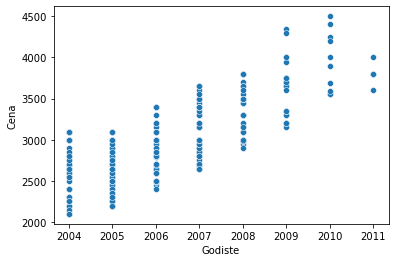

-----------------------------------
Model Astra J


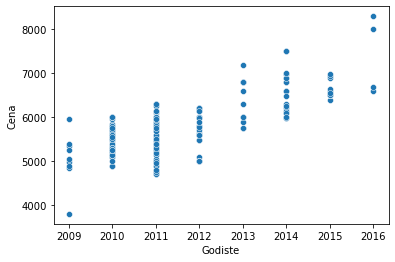

-----------------------------------
Model Astra K


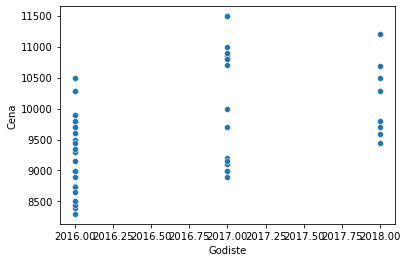

-----------------------------------
Model Auris


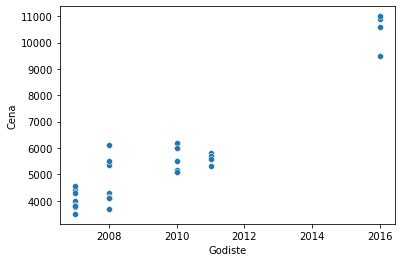

-----------------------------------
Model Avensis


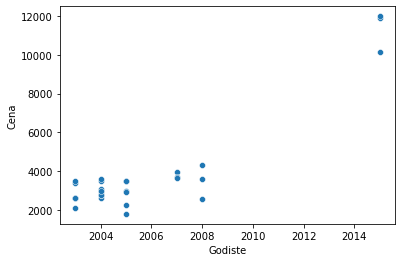

-----------------------------------
Model Aygo


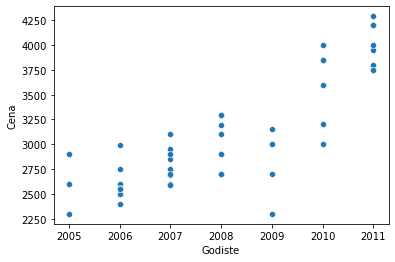

-----------------------------------
Model B 180


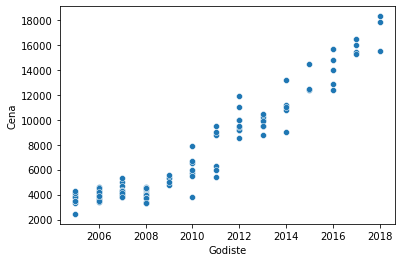

-----------------------------------
Model B 200


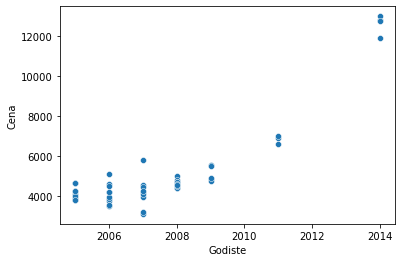

-----------------------------------
Model Berlingo


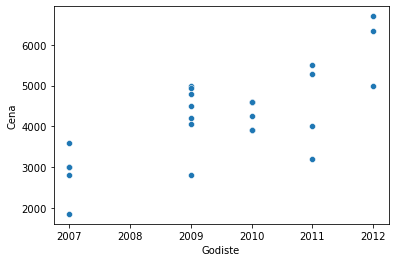

-----------------------------------
Model Bora


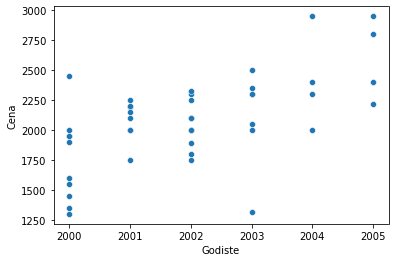

-----------------------------------
Model Bravo


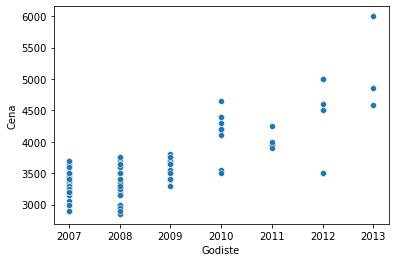

-----------------------------------
Model C 180


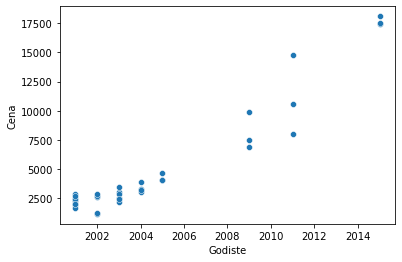

-----------------------------------
Model C 200


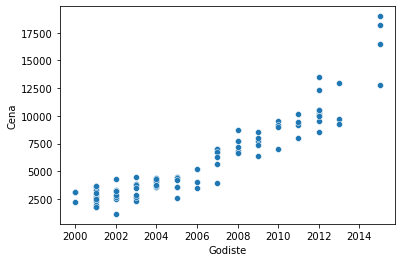

-----------------------------------
Model C 220


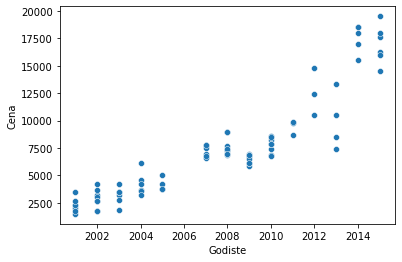

-----------------------------------
Model C-Max


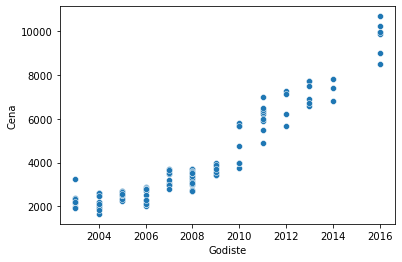

-----------------------------------
Model C1


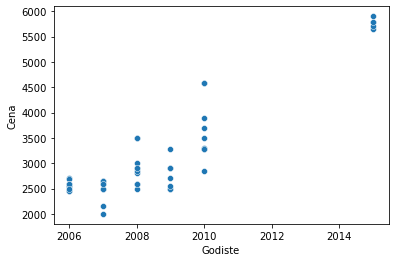

-----------------------------------
Model C2


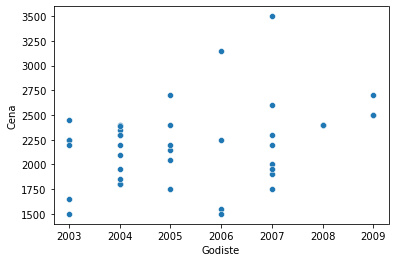

-----------------------------------
Model C3


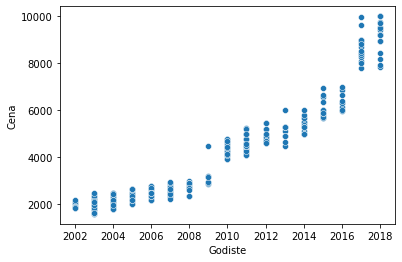

-----------------------------------
Model C3 Picasso


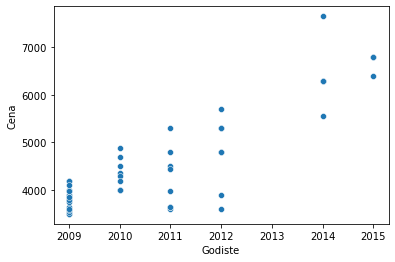

-----------------------------------
Model C4


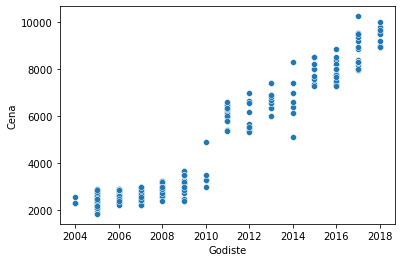

-----------------------------------
Model C4 Grand Picasso


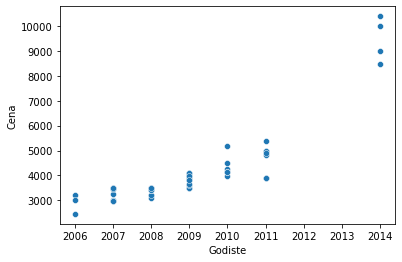

-----------------------------------
Model C4 Picasso


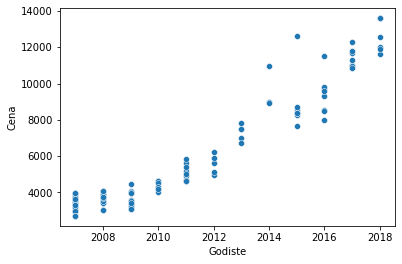

-----------------------------------
Model C5


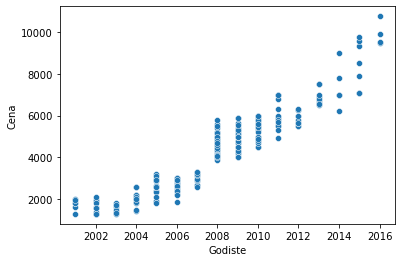

-----------------------------------
Model Caddy


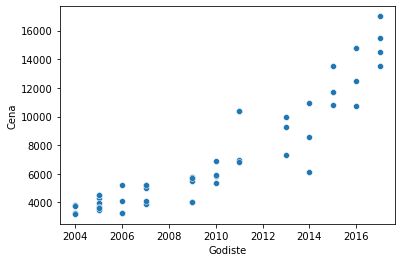

-----------------------------------
Model Captiva


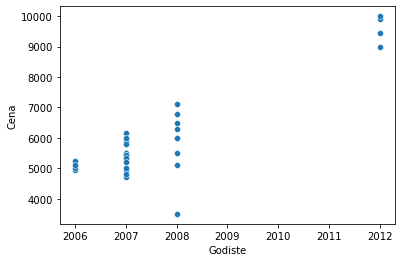

-----------------------------------
Model Captur


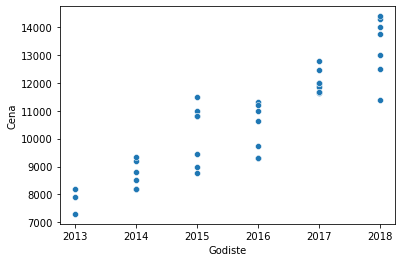

-----------------------------------
Model Civic


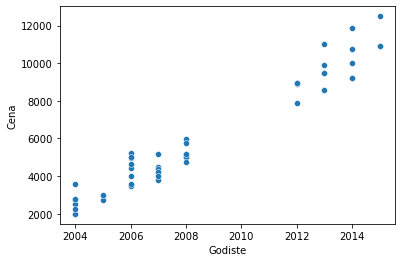

-----------------------------------
Model Clio


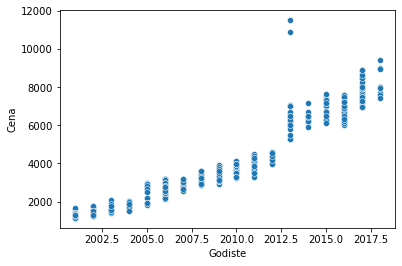

-----------------------------------
Model Colt


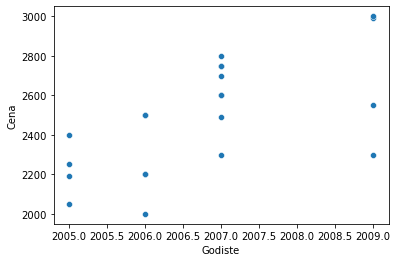

-----------------------------------
Model Cooper


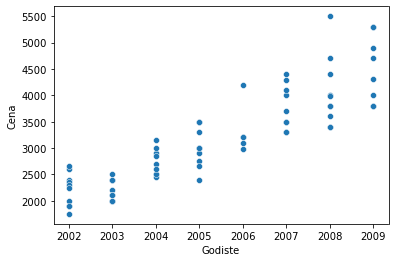

-----------------------------------
Model Corsa C


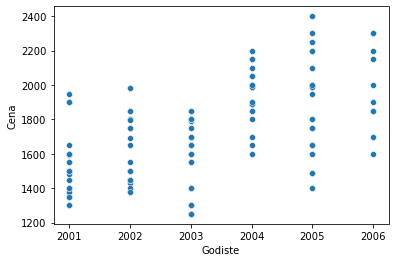

-----------------------------------
Model Corsa D


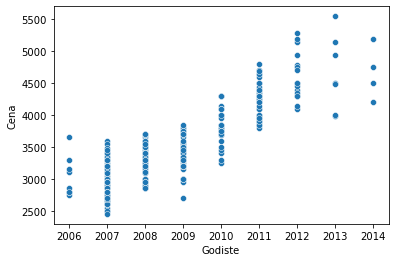

-----------------------------------
Model Corsa E


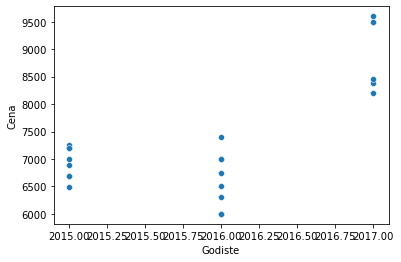

-----------------------------------
Model Croma


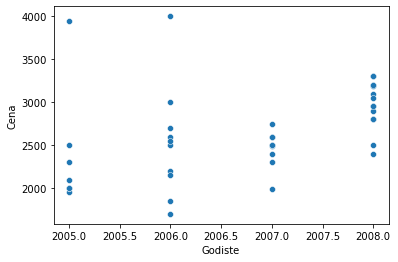

-----------------------------------
Model Cruze


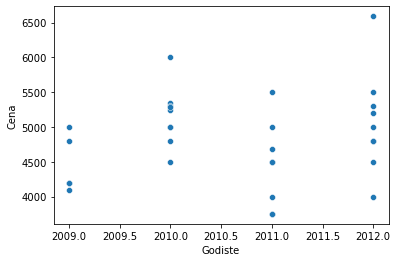

-----------------------------------
Model DS3


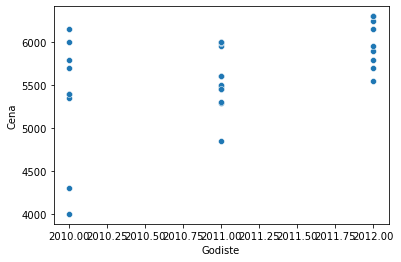

-----------------------------------
Model Delta


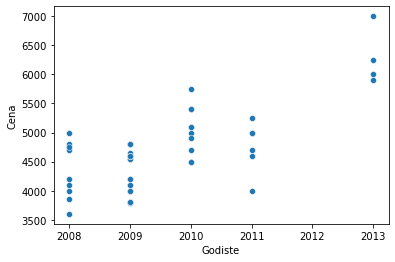

-----------------------------------
Model Doblo


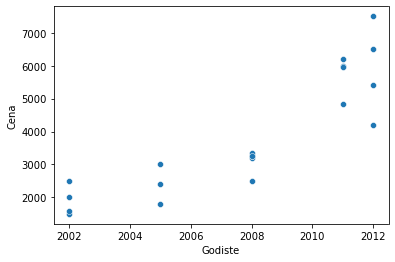

-----------------------------------
Model E 200


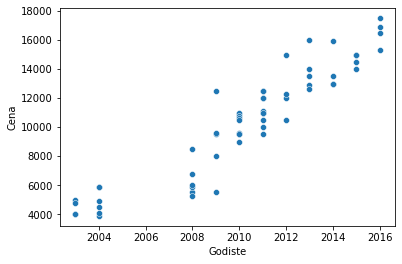

-----------------------------------
Model E 220


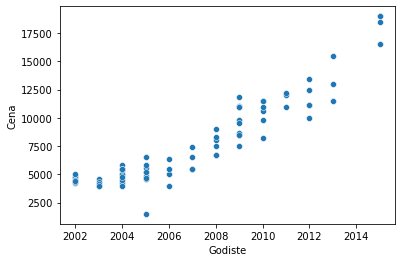

-----------------------------------
Model EVO


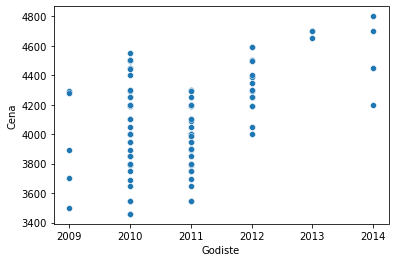

-----------------------------------
Model Espace


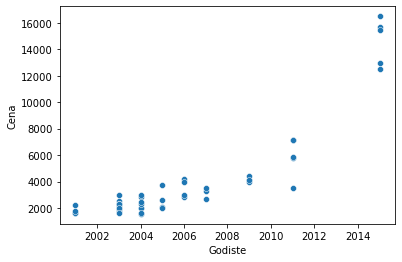

-----------------------------------
Model Fabia


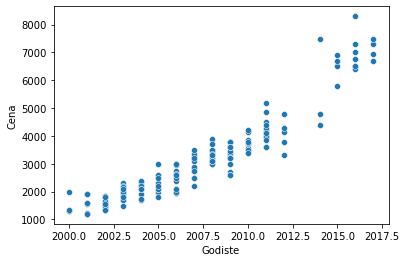

-----------------------------------
Model Fiesta


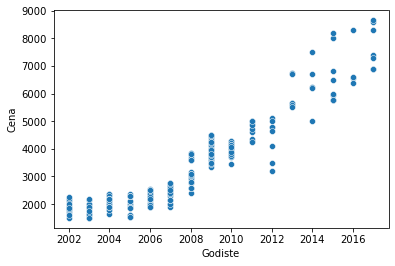

-----------------------------------
Model Focus


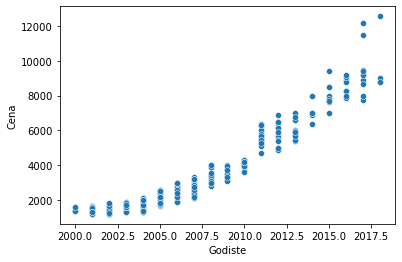

-----------------------------------
Model Fox


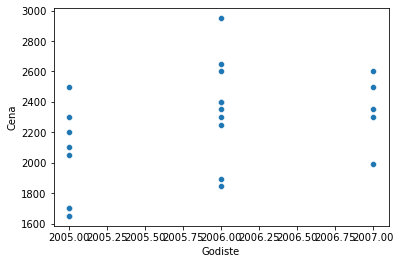

-----------------------------------
Model Fusion


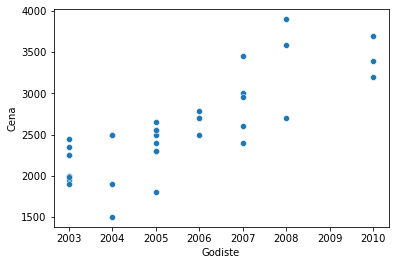

-----------------------------------
Model Galaxy


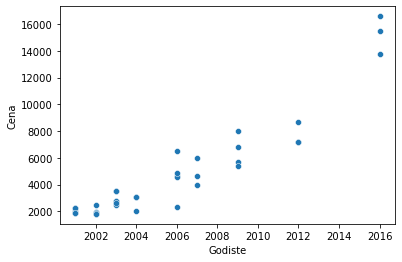

-----------------------------------
Model Giulietta


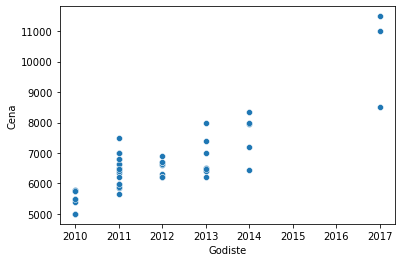

-----------------------------------
Model Golf 4


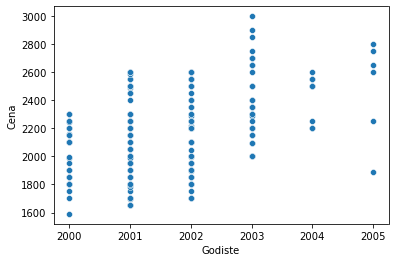

-----------------------------------
Model Golf 5


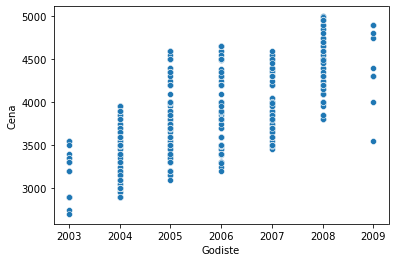

-----------------------------------
Model Golf 6


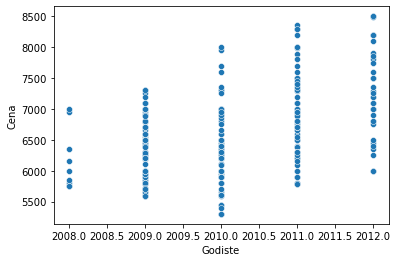

-----------------------------------
Model Golf 7


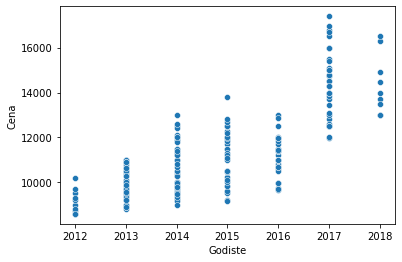

-----------------------------------
Model Golf Plus


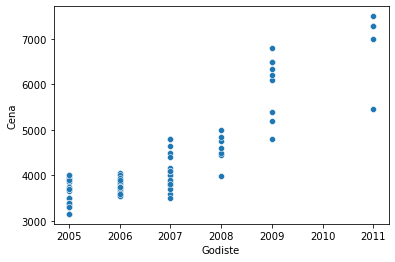

-----------------------------------
Model Grand Scenic


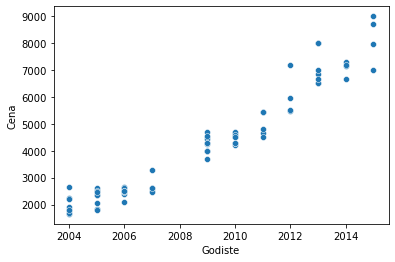

-----------------------------------
Model Grand Vitara


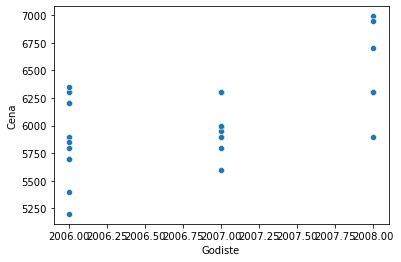

-----------------------------------
Model Grande Punto


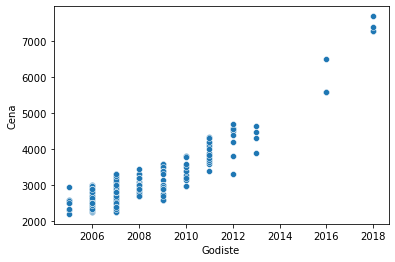

-----------------------------------
Model Ibiza


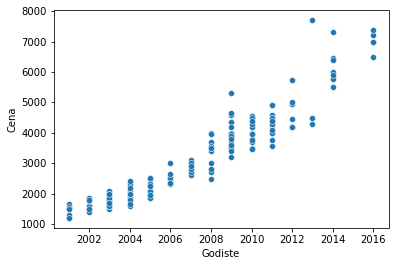

-----------------------------------
Model Idea


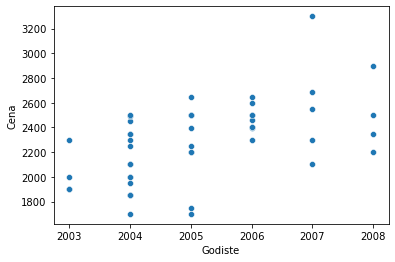

-----------------------------------
Model Insignia


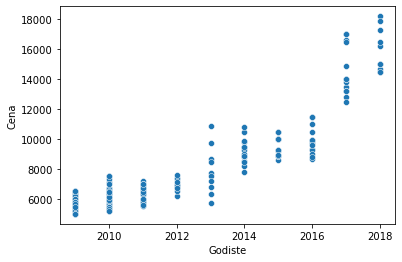

-----------------------------------
Model Jetta


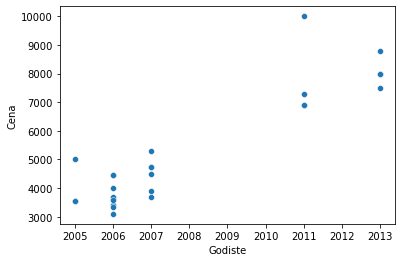

-----------------------------------
Model Juke


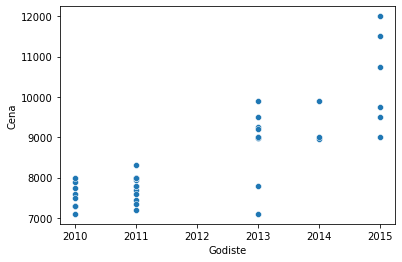

-----------------------------------
Model Ka


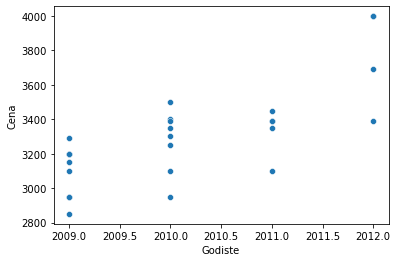

-----------------------------------
Model Kadjar


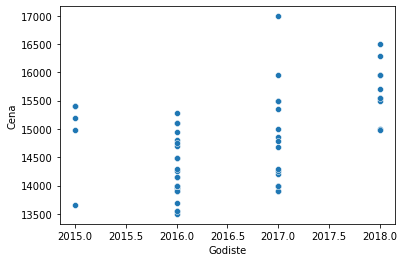

-----------------------------------
Model Kangoo


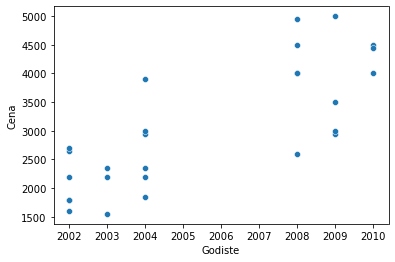

-----------------------------------
Model Kuga


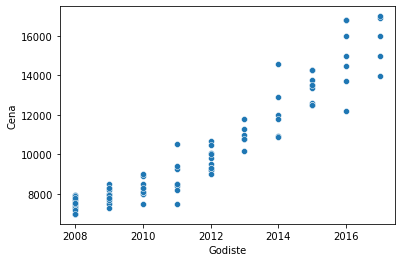

-----------------------------------
Model Laguna


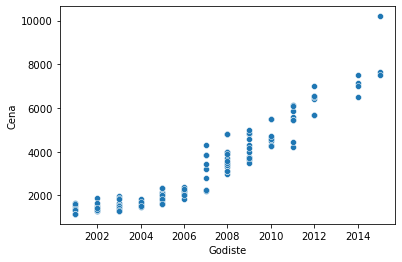

-----------------------------------
Model Leon


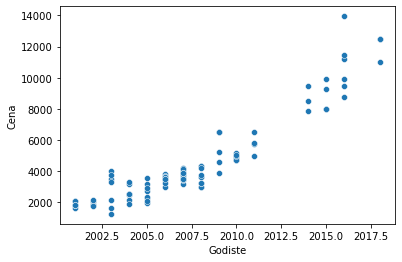

-----------------------------------
Model Logan


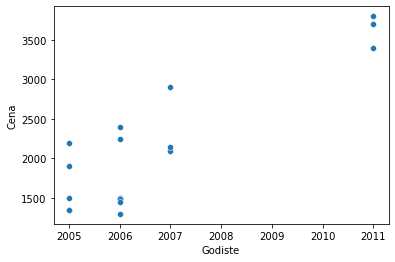

-----------------------------------
Model Megane


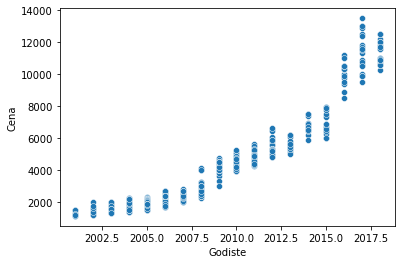

-----------------------------------
Model Meriva


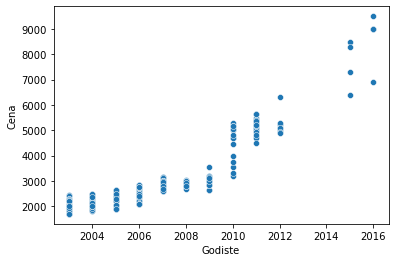

-----------------------------------
Model MiTo


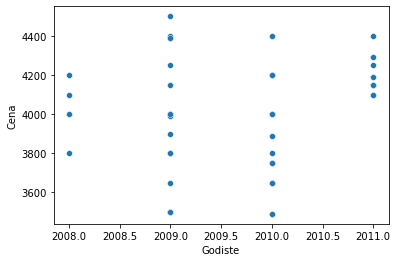

-----------------------------------
Model Micra


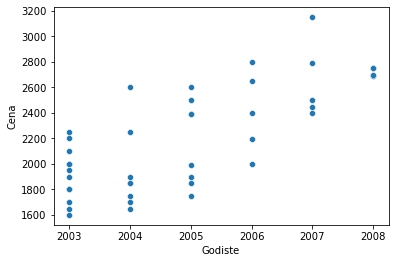

-----------------------------------
Model Modus


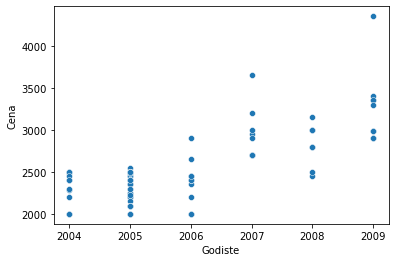

-----------------------------------
Model Mondeo


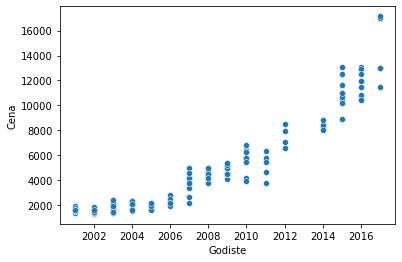

-----------------------------------
Model Musa


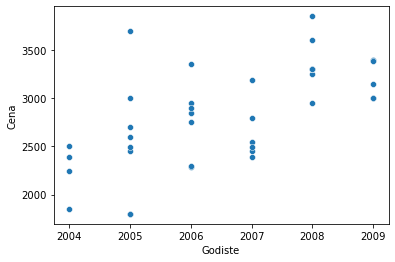

-----------------------------------
Model Note


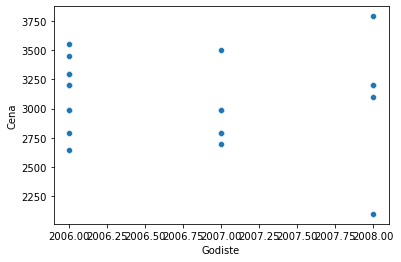

-----------------------------------
Model Octavia


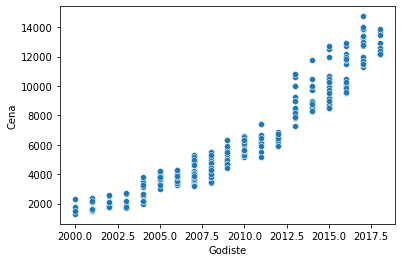

-----------------------------------
Model One


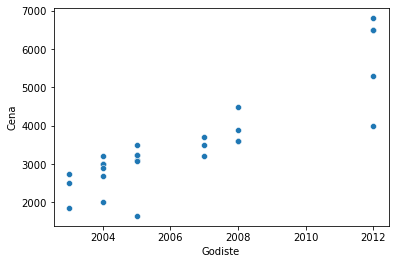

-----------------------------------
Model Outlander


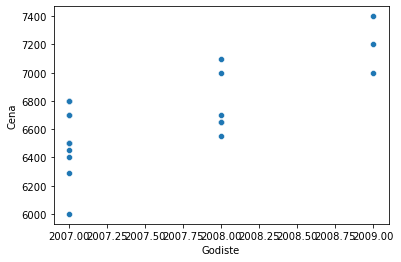

-----------------------------------
Model Panda


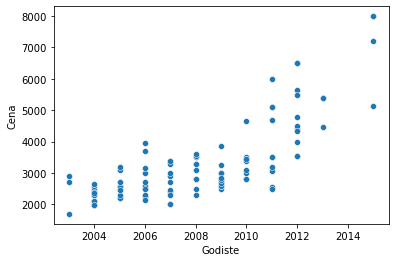

-----------------------------------
Model Passat B5.5


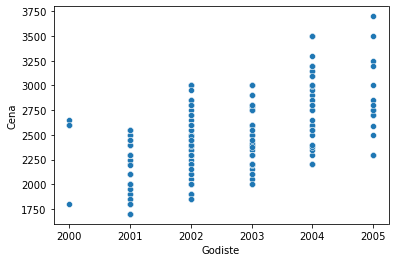

-----------------------------------
Model Passat B6


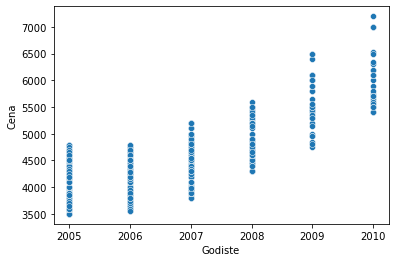

-----------------------------------
Model Passat B7


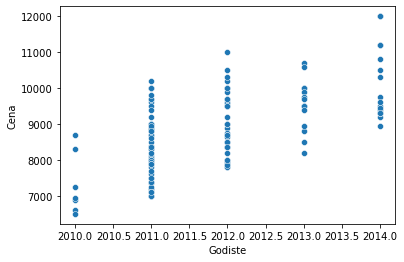

-----------------------------------
Model Passat B8


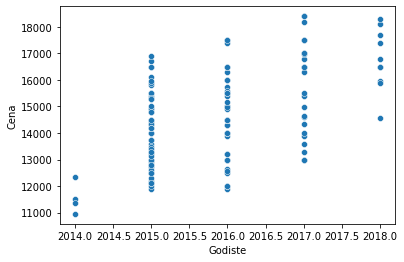

-----------------------------------
Model Passat CC


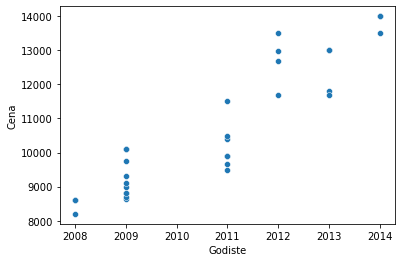

-----------------------------------
Model Polo


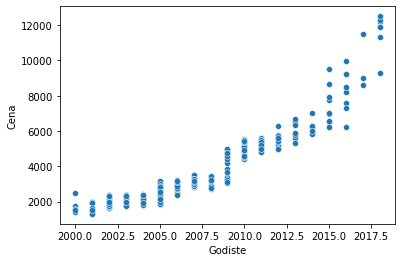

-----------------------------------
Model Punto


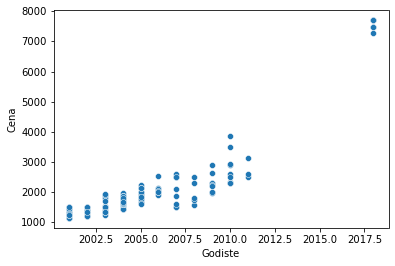

-----------------------------------
Model Q3


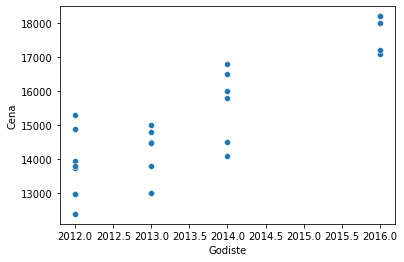

-----------------------------------
Model Q5


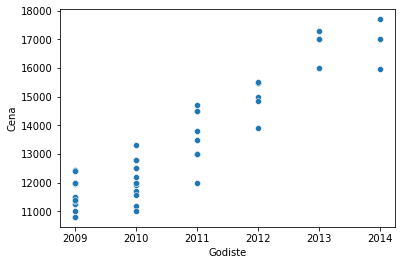

-----------------------------------
Model Qashqai


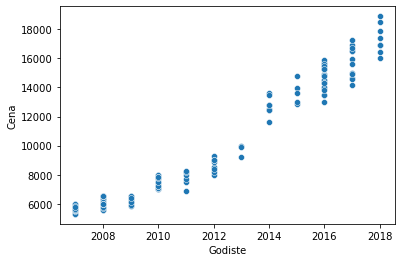

-----------------------------------
Model Qashqai + 2


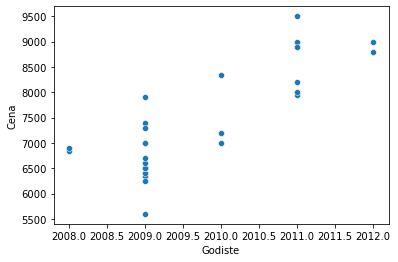

-----------------------------------
Model RAV 4


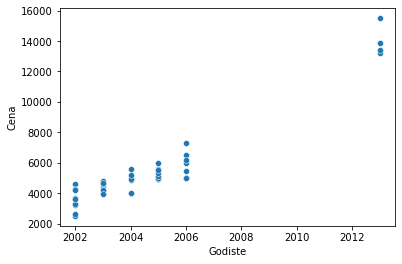

-----------------------------------
Model Roomster


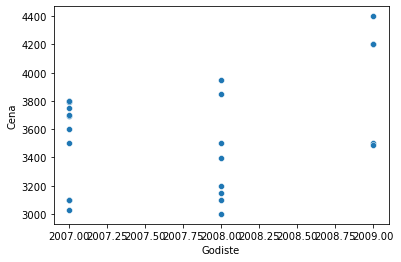

-----------------------------------
Model S-Max


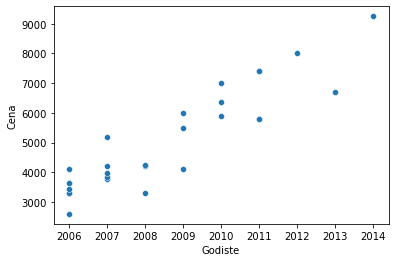

-----------------------------------
Model Santa Fe


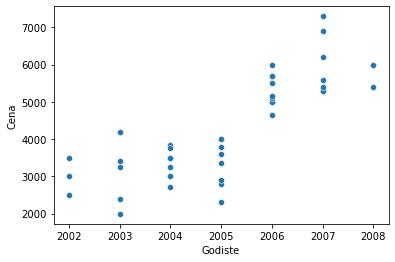

-----------------------------------
Model Scenic


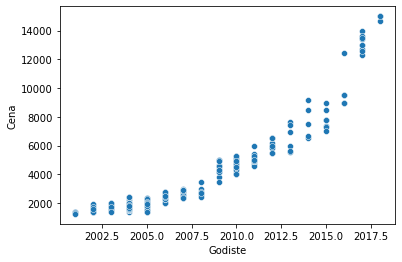

-----------------------------------
Model Sharan


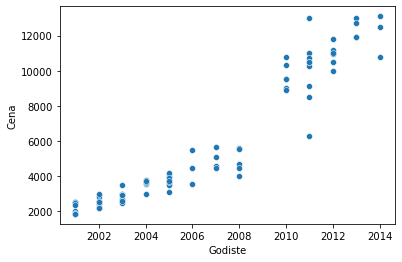

-----------------------------------
Model Sorento


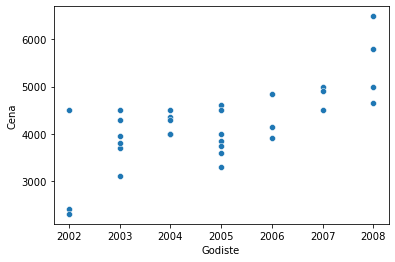

-----------------------------------
Model Sportage


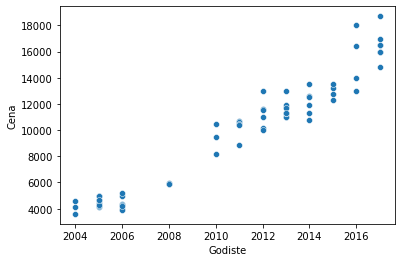

-----------------------------------
Model Stilo


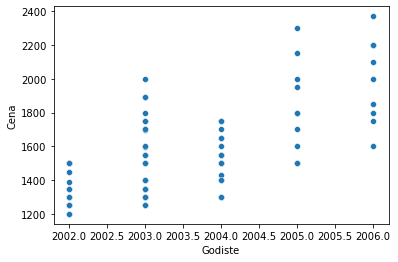

-----------------------------------
Model Superb


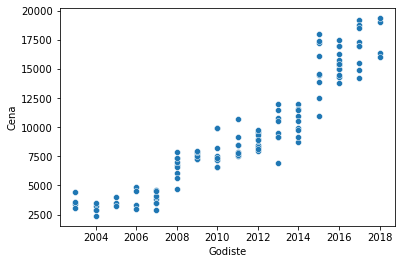

-----------------------------------
Model Swift


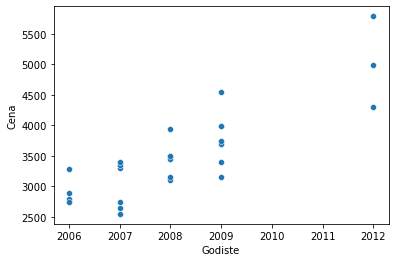

-----------------------------------
Model Talisman


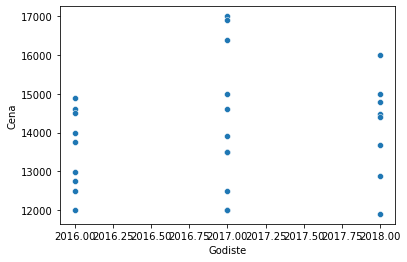

-----------------------------------
Model Tiguan


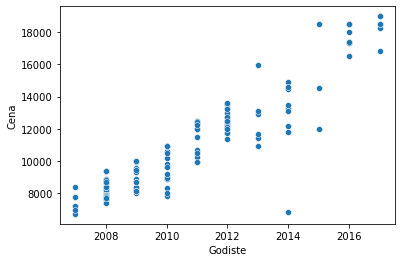

-----------------------------------
Model Touareg


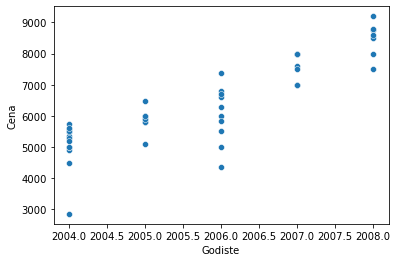

-----------------------------------
Model Touran


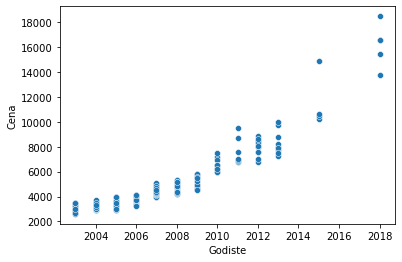

-----------------------------------
Model Tucson


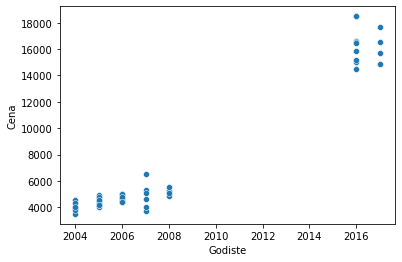

-----------------------------------
Model Twingo


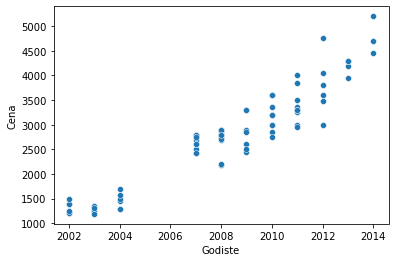

-----------------------------------
Model V40


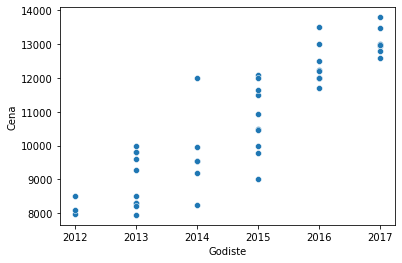

-----------------------------------
Model V50


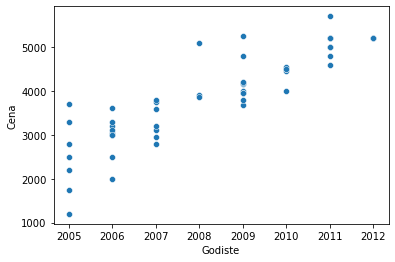

-----------------------------------
Model Vectra C


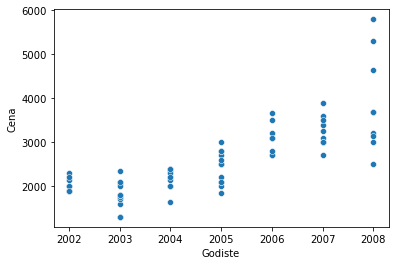

-----------------------------------
Model X-Trail


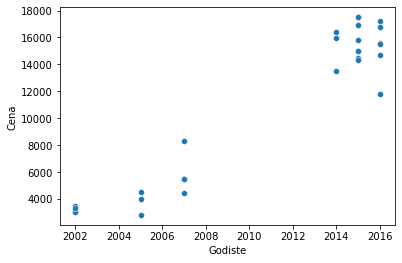

-----------------------------------
Model X1


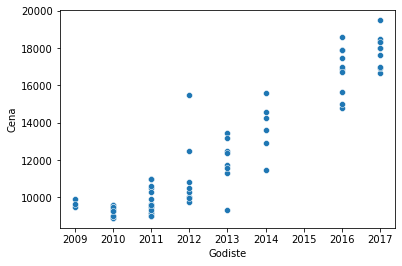

-----------------------------------
Model X3


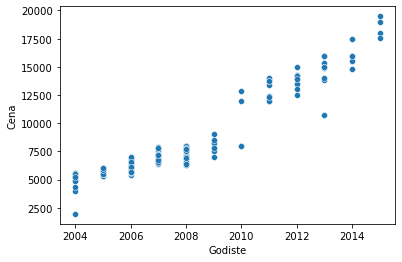

-----------------------------------
Model Xsara Picasso


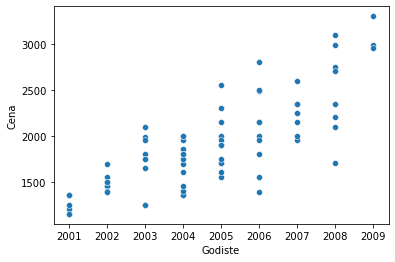

-----------------------------------
Model Yaris


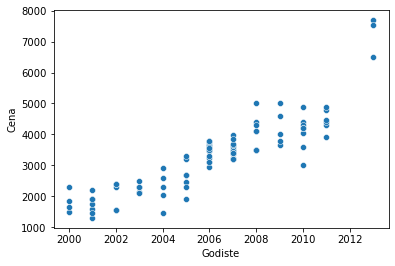

-----------------------------------
Model Ypsilon


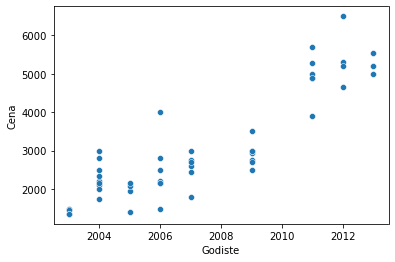

-----------------------------------
Model Zafira


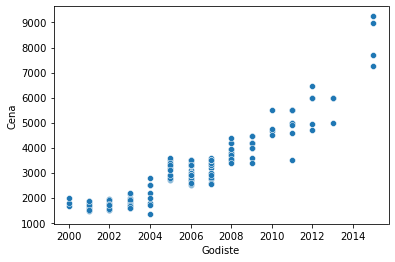

-----------------------------------
Model i30


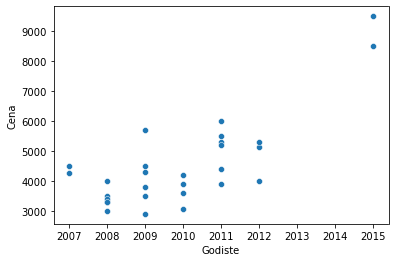

In [313]:
for model in df['Model'].unique():
    
    #if int(df[df['Model']==model].count()[0])>=30:
    print('-'*35)
    print('Model {}'.format(model))
    sns.scatterplot('Godiste', 'Cena', data=df[df['Model']==model])
    plt.show()

In [314]:
df = df.groupby('Model').filter(lambda x: len(x)>=30)

In [315]:
df.drop((df[df['Model'].isin(['120','Ypsilon','Tucson','Musa','MiTo','Galaxy','Fusion','Espace','Captiva','Agila', '525', 'Bora','Caddy','Astra K', 'A 150', 'Avensis', 'C2', 'Croma','Cruze', 'DS3', 'Delta', 'EVO','Grand Vitara', '5', 'Antara', 'Altea', 'Idea'])].index), inplace=True)
df.drop(df[(df['Model']=='A 160') & (df['Godiste']==2016)].index, inplace=True)
df.drop(df[(df['Model']=='A 170') & (df['Godiste']==2008)].index, inplace=True)
df.drop(df[(df['Model']=='Alhambra')].index, inplace=True)
df.drop(df[(df['Model']=='Astra G') & (df['Godiste']==2005)].index, inplace=True)
df.drop(df[(df['Model']=='Auris') & (df['Godiste']==2016)].index, inplace=True)
df.drop(df[(df['Model']=='B 200') & (df['Godiste']>2009)].index, inplace=True)
df.drop(df[(df['Model']=='C1') & (df['Godiste']>2010)].index, inplace=True)
df.drop(df[(df['Model']=='C4 Grand Picasso') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='Espace') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='Giulietta') & (df['Godiste']>2014)].index, inplace=True)
df.drop(df[(df['Model']=='Meriva') & (df['Godiste']>2012)].index, inplace=True)
df.drop(df[(df['Model']=='Punto') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='Grande Punto') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='RAV 4') & (df['Godiste']>2006)].index, inplace=True)
df.drop(df[(df['Model']=='Sorento') & (df['Godiste']<2003)].index, inplace=True)
df.drop(df[(df['Model']=='120') & (df['Godiste']<2009)].index, inplace=True)
df.drop(df[(df['Model']=='5008') & (df['Godiste']<2014)].index, inplace=True)
df.drop(df[(df['Model']=='Touran') & (df['Godiste']<2016)].index, inplace=True)
df.drop(df[(df['Model']=='500') & (df['Godiste']>2014)].index, inplace=True)
df.drop(df[(df['Model']=='Clio') & (df['Godiste']==2013) & (df['Cena']>8000)].index, inplace=True)
df.drop(df[(df['Model']=='C 180')].index, inplace=True)
df.drop(df[(df['Model']=='C3 Picasso')].index, inplace=True)
df.drop(df[(df['Model']=='3008') & (df['Godiste']==2016)& (df['Cena']<14000)].index, inplace=True)

df.drop(df[(df['Model']=='500') & (df['Godiste']==2013)& (df['Cena']>7000)].index, inplace=True)
df.drop(df[(df['Model']=='C 220')].index, inplace=True)
df.drop(df[(df['Model']=='B 180') & (df['Godiste']==2010)& (df['Cena']<4000)].index, inplace=True)
df.drop(df[(df['Model']=='C 200') & (df['Godiste']>2013)].index, inplace=True)
df.drop(df[(df['Model']=='C-Max') & (df['Godiste']>2014)].index, inplace=True)
df.drop(df[(df['Model']=='C4 Picasso') & (df['Godiste']>2012)& (df['Godiste']<2015)& (df['Cena']>7000)].index, inplace=True)
df.drop(df[(df['Model']=='A6') & (df['Godiste']>2015)& (df['Cena']<15000)].index, inplace=True)
df.drop(df[(df['Model']=='147') & (df['Cena']>3500)].index, inplace=True)
df.drop(df[(df['Model']=='159') & (df['Godiste']>2008)& (df['Cena']>5500)].index, inplace=True)
df.drop(df[(df['Model']=='206') & (df['Godiste']>2007)& (df['Cena']<1800)].index, inplace=True)
df.drop(df[(df['Model']=='208') & (df['Godiste']==2015)& (df['Cena']>7100)].index, inplace=True)
df.drop(df[(df['Model']=='3') & (df['Godiste']==2005)& (df['Cena']<2000)].index, inplace=True)
df.drop(df[(df['Model']=='3') & (df['Godiste']==2009)& (df['Cena']<4000)].index, inplace=True)
df.drop(df[(df['Model']=='3008') & (df['Godiste']>2015)].index, inplace=True)
df.drop(df[(df['Model']=='3008') & (df['Godiste']==2014)& (df['Cena']>11000)].index, inplace=True)
df.drop(df[(df['Model']=='318') & (df['Godiste']>2014)].index, inplace=True)
df.drop(df[(df['Model']=='320') & (df['Godiste']>2013)].index, inplace=True)
df.drop(df[(df['Model']=='A 160') & (df['Godiste']<2004)].index, inplace=True)
df.drop(df[(df['Model']=='A 170') & (df['Godiste']==2004)& (df['Cena']<1500)].index, inplace=True)
df.drop(df[(df['Model']=='A 170') & (df['Godiste']==2004)& (df['Cena']>2500)].index, inplace=True)
df.drop(df[(df['Model']=='A 170') & (df['Godiste']>2004)& (df['Cena']<2500)].index, inplace=True)
df.drop(df[(df['Model']=='A 180') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='Astra H') & (df['Godiste']>2010)].index, inplace=True)
df.drop(df[(df['Model']=='Astra J') & (df['Godiste']==2009)& (df['Cena']<4000)].index, inplace=True)
df.drop(df[(df['Model']=='B 200') & (df['Godiste']==2007)& (df['Cena']<3500)].index, inplace=True)
df.drop(df[(df['Model']=='B 200') & (df['Godiste']==2007)& (df['Cena']>5000)].index, inplace=True)
df.drop(df[(df['Model']=='Bravo') & (df['Godiste']==2012)& (df['Cena']<3500)].index, inplace=True)
df.drop(df[(df['Model']=='Bravo') & (df['Godiste']==2013)& (df['Cena']>5500)].index, inplace=True)
df.drop(df[(df['Model']=='C1') & (df['Godiste']==2010)& (df['Cena']>4000)].index, inplace=True)
df.drop(df[(df['Model']=='C1') & (df['Godiste']==2010)& (df['Cena']<3000)].index, inplace=True)
df.drop(df[(df['Model']=='C4') & (df['Godiste']==2014)& (df['Cena']<5500)].index, inplace=True)
df.drop(df[(df['Model']=='E 200')].index, inplace=True)
df.drop(df[(df['Model']=='E 220') & (df['Godiste']==2005)& (df['Cena']<2500)].index, inplace=True)
df.drop(df[(df['Model']=='Fabia') & (df['Godiste']==2014)].index, inplace=True)
df.drop(df[(df['Model']=='Fiesta') & (df['Godiste']==2012)& (df['Cena']<3500)].index, inplace=True)
df.drop(df[(df['Model']=='Focus') & (df['Godiste']>2016)& (df['Cena']>10000)].index, inplace=True)
df.drop(df[(df['Model']=='Golf 4') & (df['Godiste']>2003)& (df['Cena']<2000)].index, inplace=True)
df.drop(df[(df['Model']=='Golf 5') & (df['Godiste']==2009) & (df['Cena']<3500)].index, inplace=True)
df.drop(df[(df['Model']=='Golf Plus') & (df['Godiste']>2009)].index, inplace=True)
df.drop(df[(df['Model']=='Ibiza') & (df['Godiste']>2012)].index, inplace=True)
df.drop(df[(df['Model']=='Juke') & (df['Godiste']>2013) & (df['Cena']<8500)].index, inplace=True)
df.drop(df[(df['Model']=='Laguna') & (df['Godiste']>2014)].index, inplace=True)
df.drop(df[(df['Model']=='Leon') & (df['Cena']>12000)].index, inplace=True)
df.drop(df[(df['Model']=='Micra') & (df['Godiste']>2007)].index, inplace=True)
df.drop(df[(df['Model']=='Modus') & (df['Godiste']>2007)].index, inplace=True)
df.drop(df[(df['Model']=='Mondeo') & (df['Godiste']>2015)  & (df['Cena']>14000)].index, inplace=True)
df.drop(df[(df['Model']=='Panda') & (df['Godiste']>2012)].index, inplace=True)
df.drop(df[(df['Model']=='Passat B5.5') & (df['Godiste']<2001)].index, inplace=True)
df.drop(df[(df['Model']=='Passat B8') & (df['Godiste']<2015)].index, inplace=True)
df.drop(df[(df['Model']=='Punto') & (df['Cena']>3000)].index, inplace=True)
df.drop(df[(df['Model']=='Punto') & (df['Godiste']>2010)].index, inplace=True)
df.drop(df[(df['Model']=='RAV 4') & (df['Cena']<3000)].index, inplace=True)
df.drop(df[(df['Model']=='RAV 4') & (df['Cena']>7000)].index, inplace=True)
df.drop(df[(df['Model']=='Santa Fe') & (df['Godiste']>2007)].index, inplace=True)
df.drop(df[(df['Model']=='Santa Fe') & (df['Godiste']<2004)].index, inplace=True)
df.drop(df[(df['Model']=='Sharan') & (df['Godiste']==2011) & (df['Cena']<8000)].index, inplace=True)
df.drop(df[(df['Model']=='Sharan') & (df['Godiste']==2011) & (df['Cena']>12000)].index, inplace=True)
df.drop(df[(df['Model']=='Tiguan') & (df['Godiste']==2014) & (df['Cena']<10000)].index, inplace=True)
df.drop(df[(df['Model']=='Tiguan') & (df['Godiste']==2013) & (df['Cena']>14000)].index, inplace=True)
df.drop(df[(df['Model']=='Touareg') & (df['Godiste']==2006) & (df['Cena']<5000)].index, inplace=True)
df.drop(df[(df['Model']=='Touareg') & (df['Godiste']==2004) & (df['Cena']<4000)].index, inplace=True)
df.drop(df[(df['Model']=='Vectra C') & (df['Godiste']>2007)].index, inplace=True)
df.drop(df[(df['Model']=='X1') & (df['Godiste']==2012) & (df['Cena']>14000)].index, inplace=True)
df.drop(df[(df['Model']=='X1') & (df['Godiste']==2014) & (df['Cena']<12000)].index, inplace=True)
df.drop(df[(df['Model']=='X1') & (df['Godiste']==2013) & (df['Cena']<10000)].index, inplace=True)
df.drop(df[(df['Model']=='X1') & (df['Godiste']==2016) & (df['Cena']<16000)].index, inplace=True)
df.drop(df[(df['Model']=='X3') & (df['Godiste']==2004) & (df['Cena']<2500)].index, inplace=True)
df.drop(df[(df['Model']=='X3') & (df['Godiste']==2013) & (df['Cena']<10000)].index, inplace=True)
df.drop(df[(df['Model']=='X3') & (df['Godiste']==2010) & (df['Cena']<10000)].index, inplace=True)
df.drop(df[(df['Model']=='Yaris') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='Insignia') & (df['Godiste']==2013) & (df['Cena']<6000)].index, inplace=True)
df.drop(df[(df['Model']=='Insignia') & (df['Godiste']==2013) & (df['Cena']>9000)].index, inplace=True)
df.drop(df[(df['Model']=='107') & (df['Godiste']>2007) & (df['Cena']>3500)].index, inplace=True)
df.drop(df[(df['Model']=='107') & (df['Cena']<1500)].index, inplace=True)

In [316]:
"""for model in df['Model'].unique():
    
    print('-'*35)
    print('Model {}'.format(model))

    sns.scatterplot('Godiste', 'Cena', data=df[df['Model']==model])
    plt.show()"""


"for model in df['Model'].unique():\n    \n    print('-'*35)\n    print('Model {}'.format(model))\n\n    sns.scatterplot('Godiste', 'Cena', data=df[df['Model']==model])\n    plt.show()"

In [317]:
df

Marka   Model  Godiste  Kilometraza Karoserija  Gorivo  Kubikaza  \
77     Peugeot     107     2008       150000     Hecbek  Benzin       1.0   
868    Peugeot     107     2008       152210     Hecbek  Benzin       1.0   
1166   Peugeot     107     2008       130000     Hecbek  Benzin       1.0   
2280   Peugeot     107     2007       161653     Hecbek  Benzin       1.0   
3464   Peugeot     107     2007       141390     Hecbek  Benzin       1.0   
...        ...     ...      ...          ...        ...     ...       ...   
24571     Opel  Zafira     2003       225000    MiniVan   Dizel       2.0   
25238     Opel  Zafira     2003       315234    MiniVan   Dizel       2.0   
25246     Opel  Zafira     2004       225000    MiniVan   Dizel       2.0   
25914     Opel  Zafira     2002       220000    MiniVan   Dizel       2.0   
28302     Opel  Zafira     2003       257600    MiniVan   Dizel       2.0   

       Snaga motora  Cena      EKM     Pogon              Menjac  \
77               70  2880  Euro 4   Prednji   Manuelni 5 brzina    
868              70  2950  Euro 4   Prednji   Manuelni 5 brzina    
1166             70  2995  Euro 4   Prednji   Manuelni 5 brzina    
2280             70  2400  Euro 4   Prednji   Manuelni 5 brzina    
3464             70  2750  Euro 4   Prednji   Manuelni 5 brzina    
...             ...   ...      ...       ...                 ...   
24571           100  1700  Euro 3   Prednji   Manuelni 5 brzina    
25238           100  1650  Euro 3   Prednji   Manuelni 5 brzina    
25246           100  1999  Euro 3   Prednji   Manuelni 5 brzina    
25914           100  1700  Euro 3   Prednji   Manuelni 5 brzina    
28302           100  1600  Euro 3   Prednji   Manuelni 5 brzina    

                   Klima    Boja Materijal enterijera  
77       Manuelna klima     Crna                 Stof  
868      Manuelna klima     Siva                 Stof  
1166     Manuelna klima   Crvena                 Stof  
2280     Manuelna klima     Crna                 Stof  
3464     Manuelna klima     Crna                 Stof  
...                  ...     ...                  ...  
24571    Manuelna klima    Druga                 Stof  
25238    Manuelna klima     Siva                 Stof  
25246  Automatska klima    Plava                 Stof  
25914    Manuelna klima    Druga                 Stof  
28302    Manuelna klima    Plava                 Stof  

[17489 rows x 15 columns]

In [318]:
df['Boja'].value_counts()

Siva      6731
Crna      4475
Druga     2244
Plava     1737
Bela      1661
Crvena     641
Name: Boja, dtype: int64

In [319]:
df['Menjac'].value_counts()

Manuelni 5 brzina               8735
Manuelni 6 brzina               6635
Automatski / poluautomatski     2119
Name: Menjac, dtype: int64

In [320]:
df['Klima'].value_counts()

Automatska klima     10695
Manuelna klima        6564
Nema klimu             230
Name: Klima, dtype: int64

In [321]:
df['prosek_god_km']=df['Kilometraza']/(2021 - df['Godiste'])
df['Starost'] = 2021 - df['Godiste']

<AxesSubplot:xlabel='prosek_god_km', ylabel='Density'>

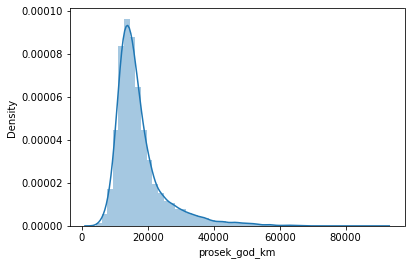

In [322]:
sns.distplot(df['prosek_god_km'])

In [323]:
df['sin_odo']=df['Kilometraza'].apply(lambda x: np.sin(x))
df['sin_age']=df['Starost'].apply(lambda x: np.sin(x))

In [324]:
df.drop(df[df['Godiste']>2016].index, inplace=True)

<AxesSubplot:xlabel='prosek_god_km', ylabel='Godiste'>

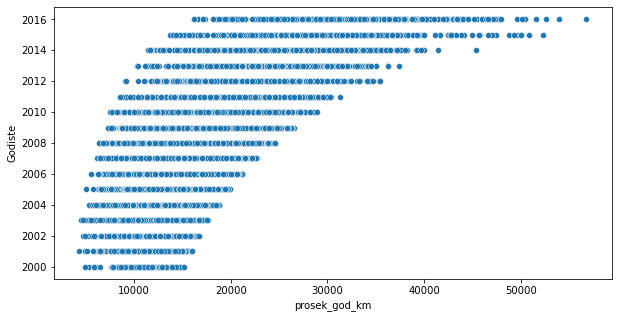

In [325]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['prosek_god_km'], df['Godiste'], data=df)

<AxesSubplot:xlabel='Godiste', ylabel='Cena'>

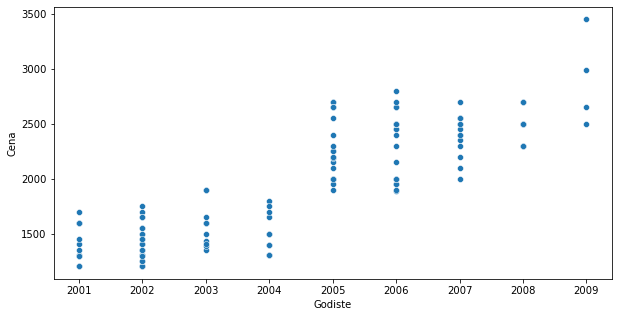

In [326]:
plt.figure(figsize=(10,5))
sns.scatterplot( x = 'Godiste', y = 'Cena', data=df[df['Model']=='147'])

In [327]:
df.drop(df[df['prosek_god_km']>37000].index, inplace=True)

<AxesSubplot:xlabel='prosek_god_km'>

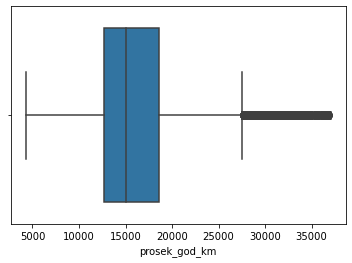

In [328]:
sns.boxplot(df['prosek_god_km'])

<AxesSubplot:xlabel='Godiste', ylabel='Kilometraza'>

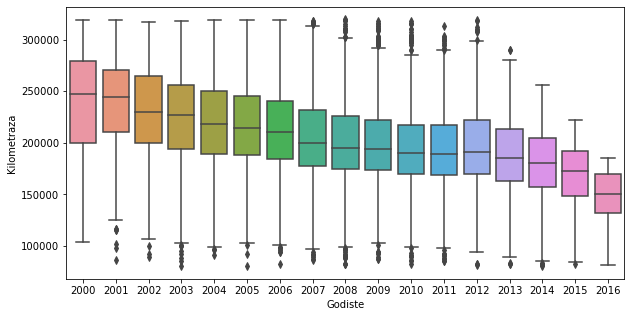

In [329]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Godiste'], df['Kilometraza'], data=df)

In [330]:
df.drop(df[(df['Godiste']<2012) & (df['Kilometraza']<110000)].index, inplace=True)
df.drop(df[(df['Godiste']>2012) & (df['Kilometraza']<90000)].index, inplace=True)

<AxesSubplot:xlabel='Godiste', ylabel='Kilometraza'>

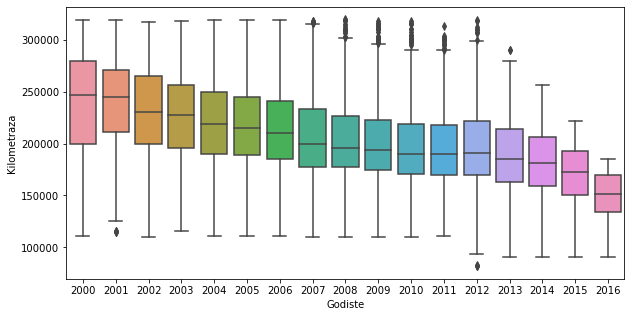

In [331]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Godiste'], df['Kilometraza'], data=df)

In [332]:
df['Model'].value_counts()

A4           838
Golf 5       584
320          534
Polo         482
Passat B6    479
            ... 
Sorento       28
107           27
Auris         26
500L          25
Captur        20
Name: Model, Length: 106, dtype: int64

In [333]:
df = df.groupby('Model').filter(lambda x: len(x)>=45)

In [334]:
df['Model'].value_counts()

A4                  838
Golf 5              584
320                 534
Polo                482
Passat B6           479
                   ... 
A 170                51
156                  50
Civic                50
Giulietta            49
C4 Grand Picasso     47
Name: Model, Length: 89, dtype: int64

In [337]:
df[df['Model']=='156']

Marka Model  Godiste  Kilometraza Karoserija              Gorivo  \
8449   Alfa Romeo   156     2002       283000   Limuzina              Benzin   
25951  Alfa Romeo   156     2002       293000   Limuzina  Benzin + Gas (TNG)   
26064  Alfa Romeo   156     2003       222000   Limuzina              Benzin   
26970  Alfa Romeo   156     2002       250000   Limuzina  Benzin + Gas (TNG)   
4043   Alfa Romeo   156     2001       240000   Limuzina               Dizel   
4722   Alfa Romeo   156     2003       280000    Karavan               Dizel   
5885   Alfa Romeo   156     2003       265000   Limuzina               Dizel   
6111   Alfa Romeo   156     2005       280000    Karavan               Dizel   
6196   Alfa Romeo   156     2003       217800   Limuzina               Dizel   
8037   Alfa Romeo   156     2001       192000    Karavan               Dizel   
8708   Alfa Romeo   156     2003       249000   Limuzina               Dizel   
8737   Alfa Romeo   156     2003       275676    Karavan               Dizel   
8803   Alfa Romeo   156     2005       272617   Limuzina               Dizel   
8980   Alfa Romeo   156     2001       235229    Karavan               Dizel   
9920   Alfa Romeo   156     2002       288626    Karavan               Dizel   
10012  Alfa Romeo   156     2003       230000   Limuzina               Dizel   
11096  Alfa Romeo   156     2004       181000   Limuzina               Dizel   
11373  Alfa Romeo   156     2005       214663    Karavan               Dizel   
11840  Alfa Romeo   156     2002       273000    Karavan               Dizel   
12982  Alfa Romeo   156     2003       255345    Karavan               Dizel   
14594  Alfa Romeo   156     2004       241000    Karavan               Dizel   
15536  Alfa Romeo   156     2004       255000    Karavan               Dizel   
15812  Alfa Romeo   156     2003       315000    Karavan               Dizel   
15937  Alfa Romeo   156     2002       270000   Limuzina               Dizel   
16322  Alfa Romeo   156     2004       205451    Karavan               Dizel   
16777  Alfa Romeo   156     2001       316000   Limuzina               Dizel   
17226  Alfa Romeo   156     2004       246000    Karavan               Dizel   
17880  Alfa Romeo   156     2004       247800    Karavan               Dizel   
18132  Alfa Romeo   156     2002       240000    Karavan               Dizel   
18308  Alfa Romeo   156     2003       220000   Limuzina               Dizel   
18374  Alfa Romeo   156     2005       267000   Limuzina               Dizel   
19006  Alfa Romeo   156     2001       304000    Karavan               Dizel   
19036  Alfa Romeo   156     2005       276000    Karavan               Dizel   
20553  Alfa Romeo   156     2001       313688   Limuzina               Dizel   
20762  Alfa Romeo   156     2002       215853    Karavan               Dizel   
22265  Alfa Romeo   156     2003       303000   Limuzina               Dizel   
22427  Alfa Romeo   156     2005       301000    Karavan               Dizel   
22478  Alfa Romeo   156     2005       211111   Limuzina               Dizel   
22577  Alfa Romeo   156     2004       250000    Karavan               Dizel   
22715  Alfa Romeo   156     2004       236000    Karavan               Dizel   
22910  Alfa Romeo   156     2002       214000    Karavan               Dizel   
22916  Alfa Romeo   156     2003       233000   Limuzina               Dizel   
23333  Alfa Romeo   156     2004       252000   Limuzina               Dizel   
25161  Alfa Romeo   156     2001       310000    Karavan               Dizel   
25184  Alfa Romeo   156     2005       232000    Karavan               Dizel   
25911  Alfa Romeo   156     2004       213000    Karavan               Dizel   
27723  Alfa Romeo   156     2001       240000   Limuzina               Dizel   
28402  Alfa Romeo   156     2003       280000    Karavan               Dizel   
24385  Alfa Romeo   156     2001       174128    Karavan              Benzin   
25560  Alfa 

In [338]:
#df.to_csv('./Data/cleanedUsedCars.csv', index=False)
df.to_csv('./Data/usedCleaned2021.csv', index=False)